In [1]:
import matplotlib.pyplot as plt

from o2.models.solution import Solution
from o2.store import Store


def plot_pareto_front(stores_list, all_solutions_front):
    plt.figure(figsize=(14, 9), dpi=200)  # Increase figure size and resolution
    
    base_solutions = []
    
    for store_name, store in stores_list:
        store_pareto_points = [s.point for s in store.current_pareto_front.solutions]
        base_solutions.append(store.base_solution.point)

        # Plot store's current Pareto front with unique colors
        plt.scatter(
            [p[0] for p in store_pareto_points],
            [p[1] for p in store_pareto_points],
            label=f"{store_name} - Current Pareto",
            alpha=0.7
        )

    # Plot all base solutions in one color/legend entry
    base_solutions_x, base_solutions_y = zip(*base_solutions)
    plt.scatter(
        base_solutions_x, base_solutions_y,
        marker="s", color="black", label="All Stores - Base Solutions"
    )

    # Plot the all-stores Pareto front with non-filled circles
    pareto_x, pareto_y = zip(*[s.point for s in all_solutions_front])
    plt.scatter(
        pareto_x, pareto_y,
        marker="o", edgecolors="red", facecolors="none", s=80, linewidths=1.5,
        label="All Stores - Pareto Front (non-filled)"
    )

    plt.xlabel("Objective 1")
    plt.ylabel("Objective 2")
    plt.title("Pareto Front Comparison Across Stores")

    # Move the legend below the plot
    plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.12), ncol=2, fontsize=10, frameon=False)
    
    plt.grid(True)
    plt.show()


Processing ... Proximal Policy Optimization insurance_hard


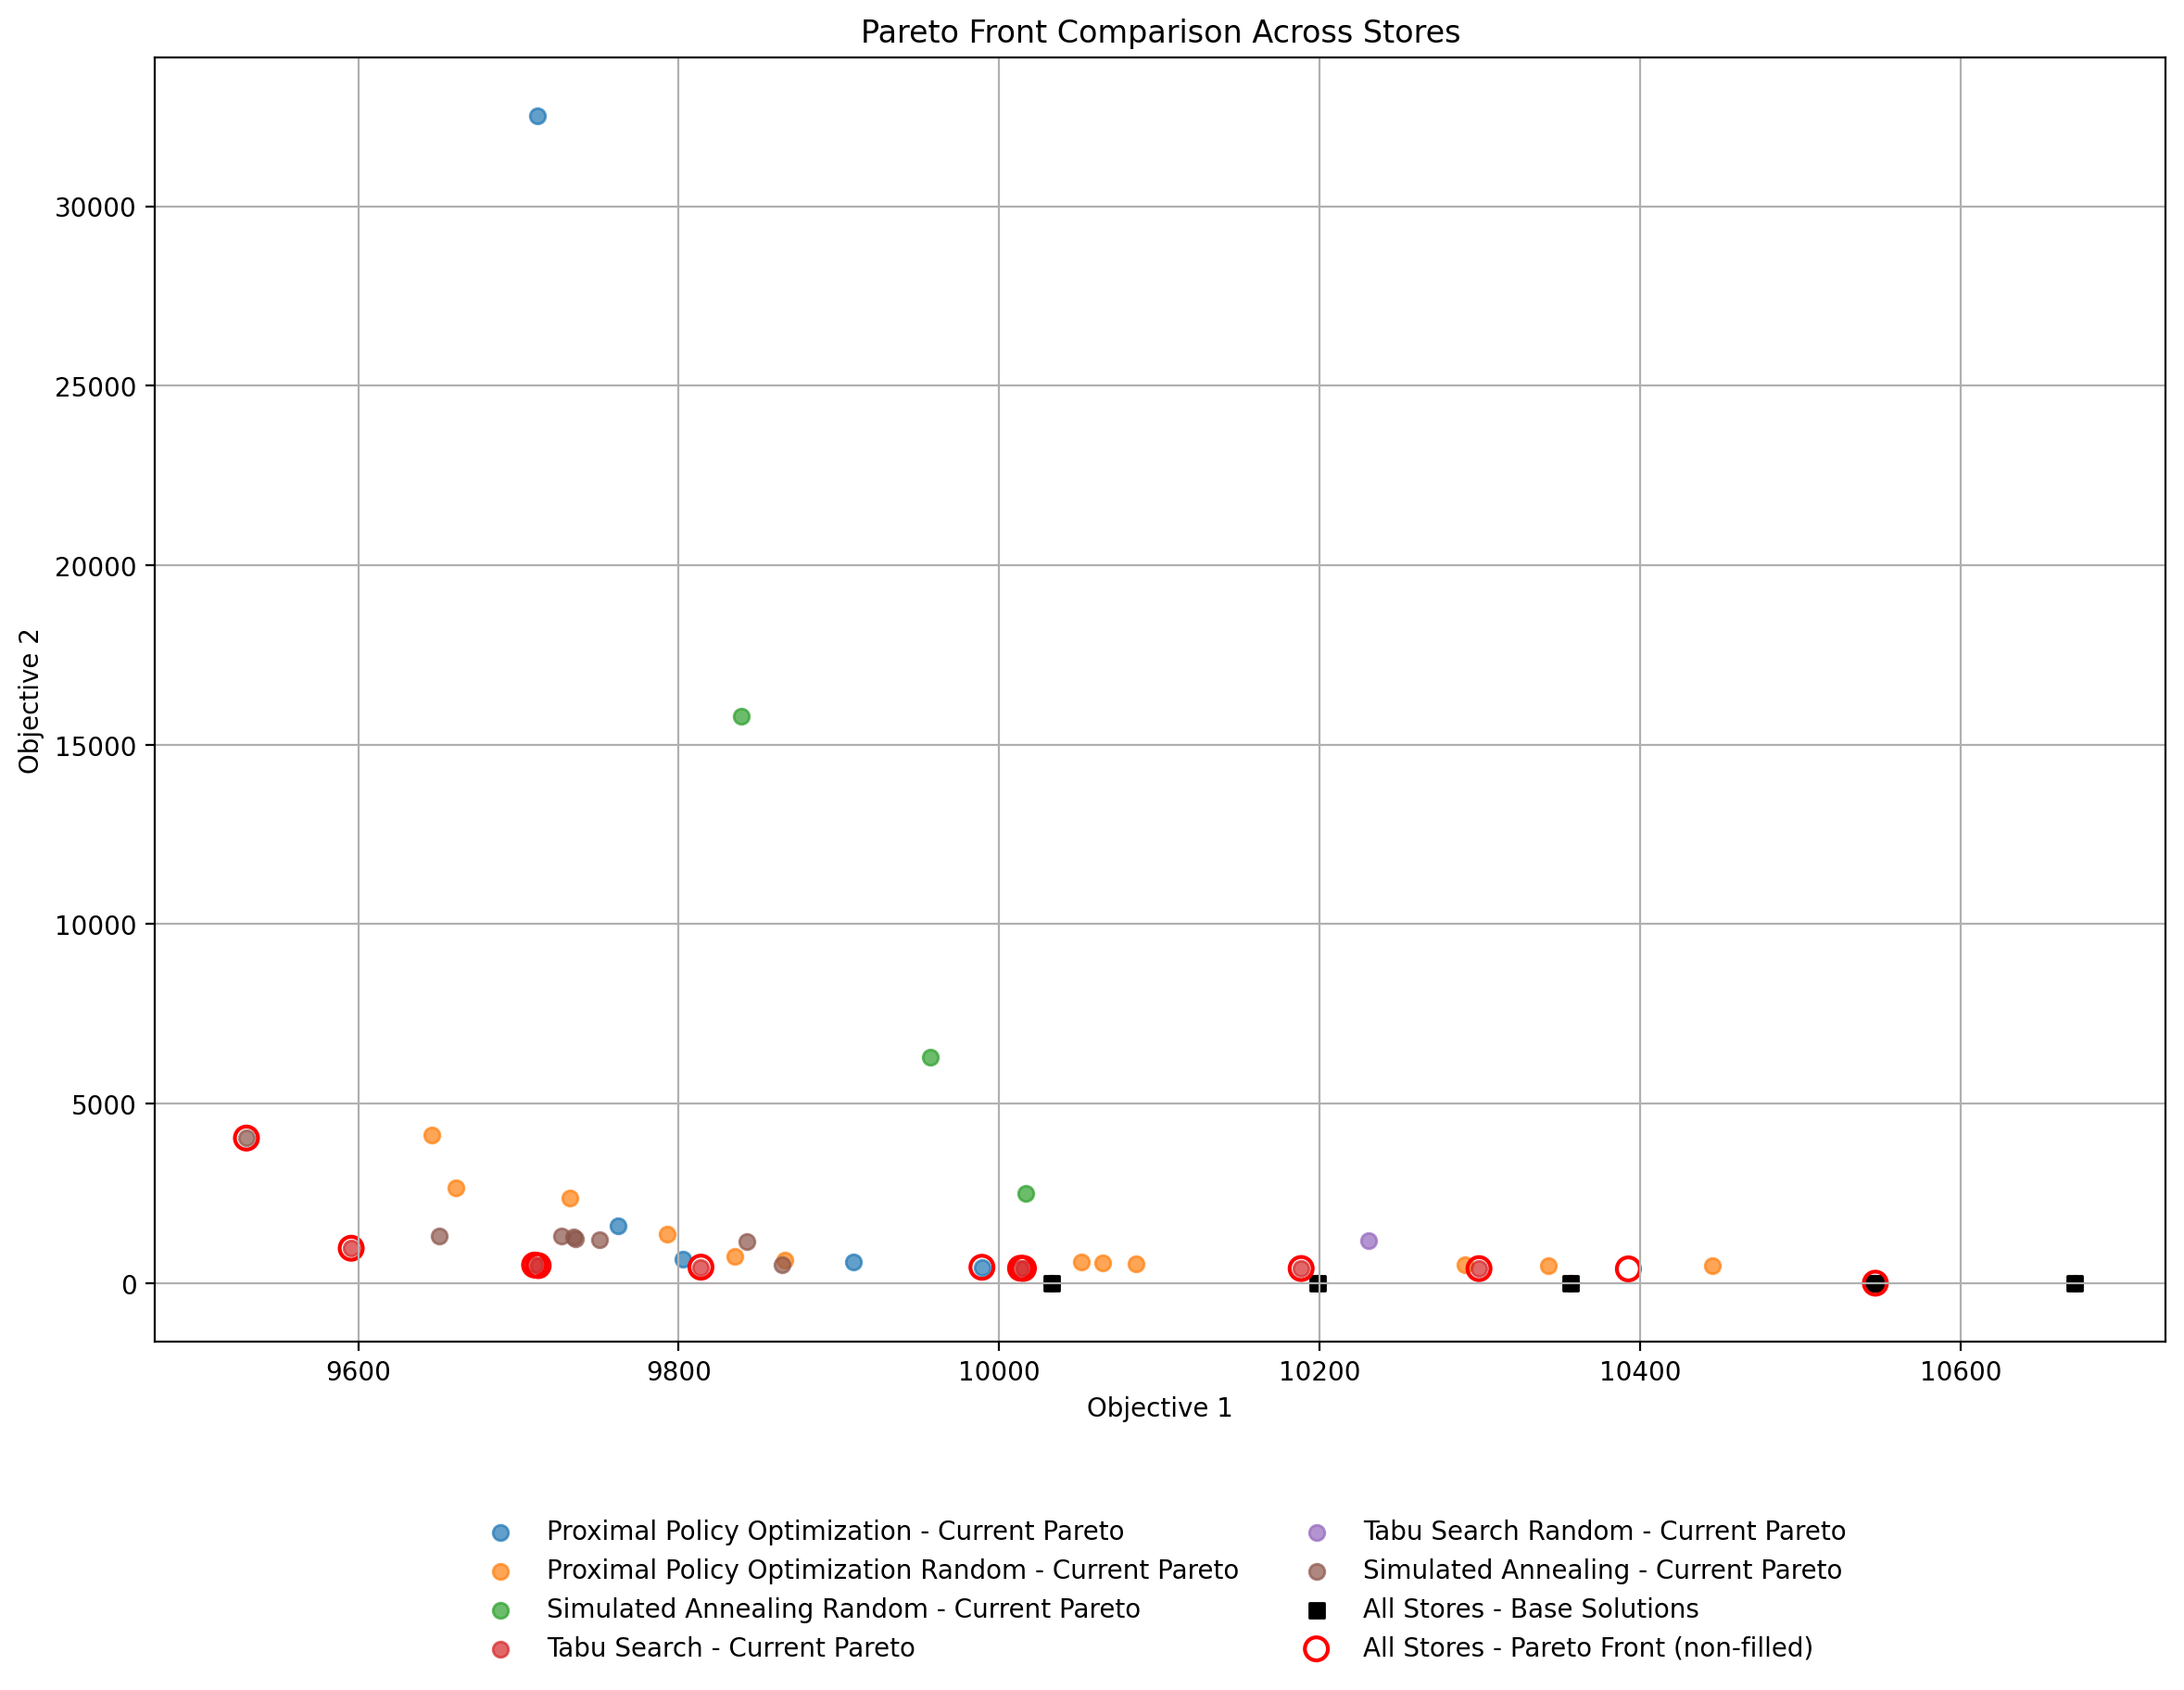

Processing ... Simulated Annealing callcentre_mid


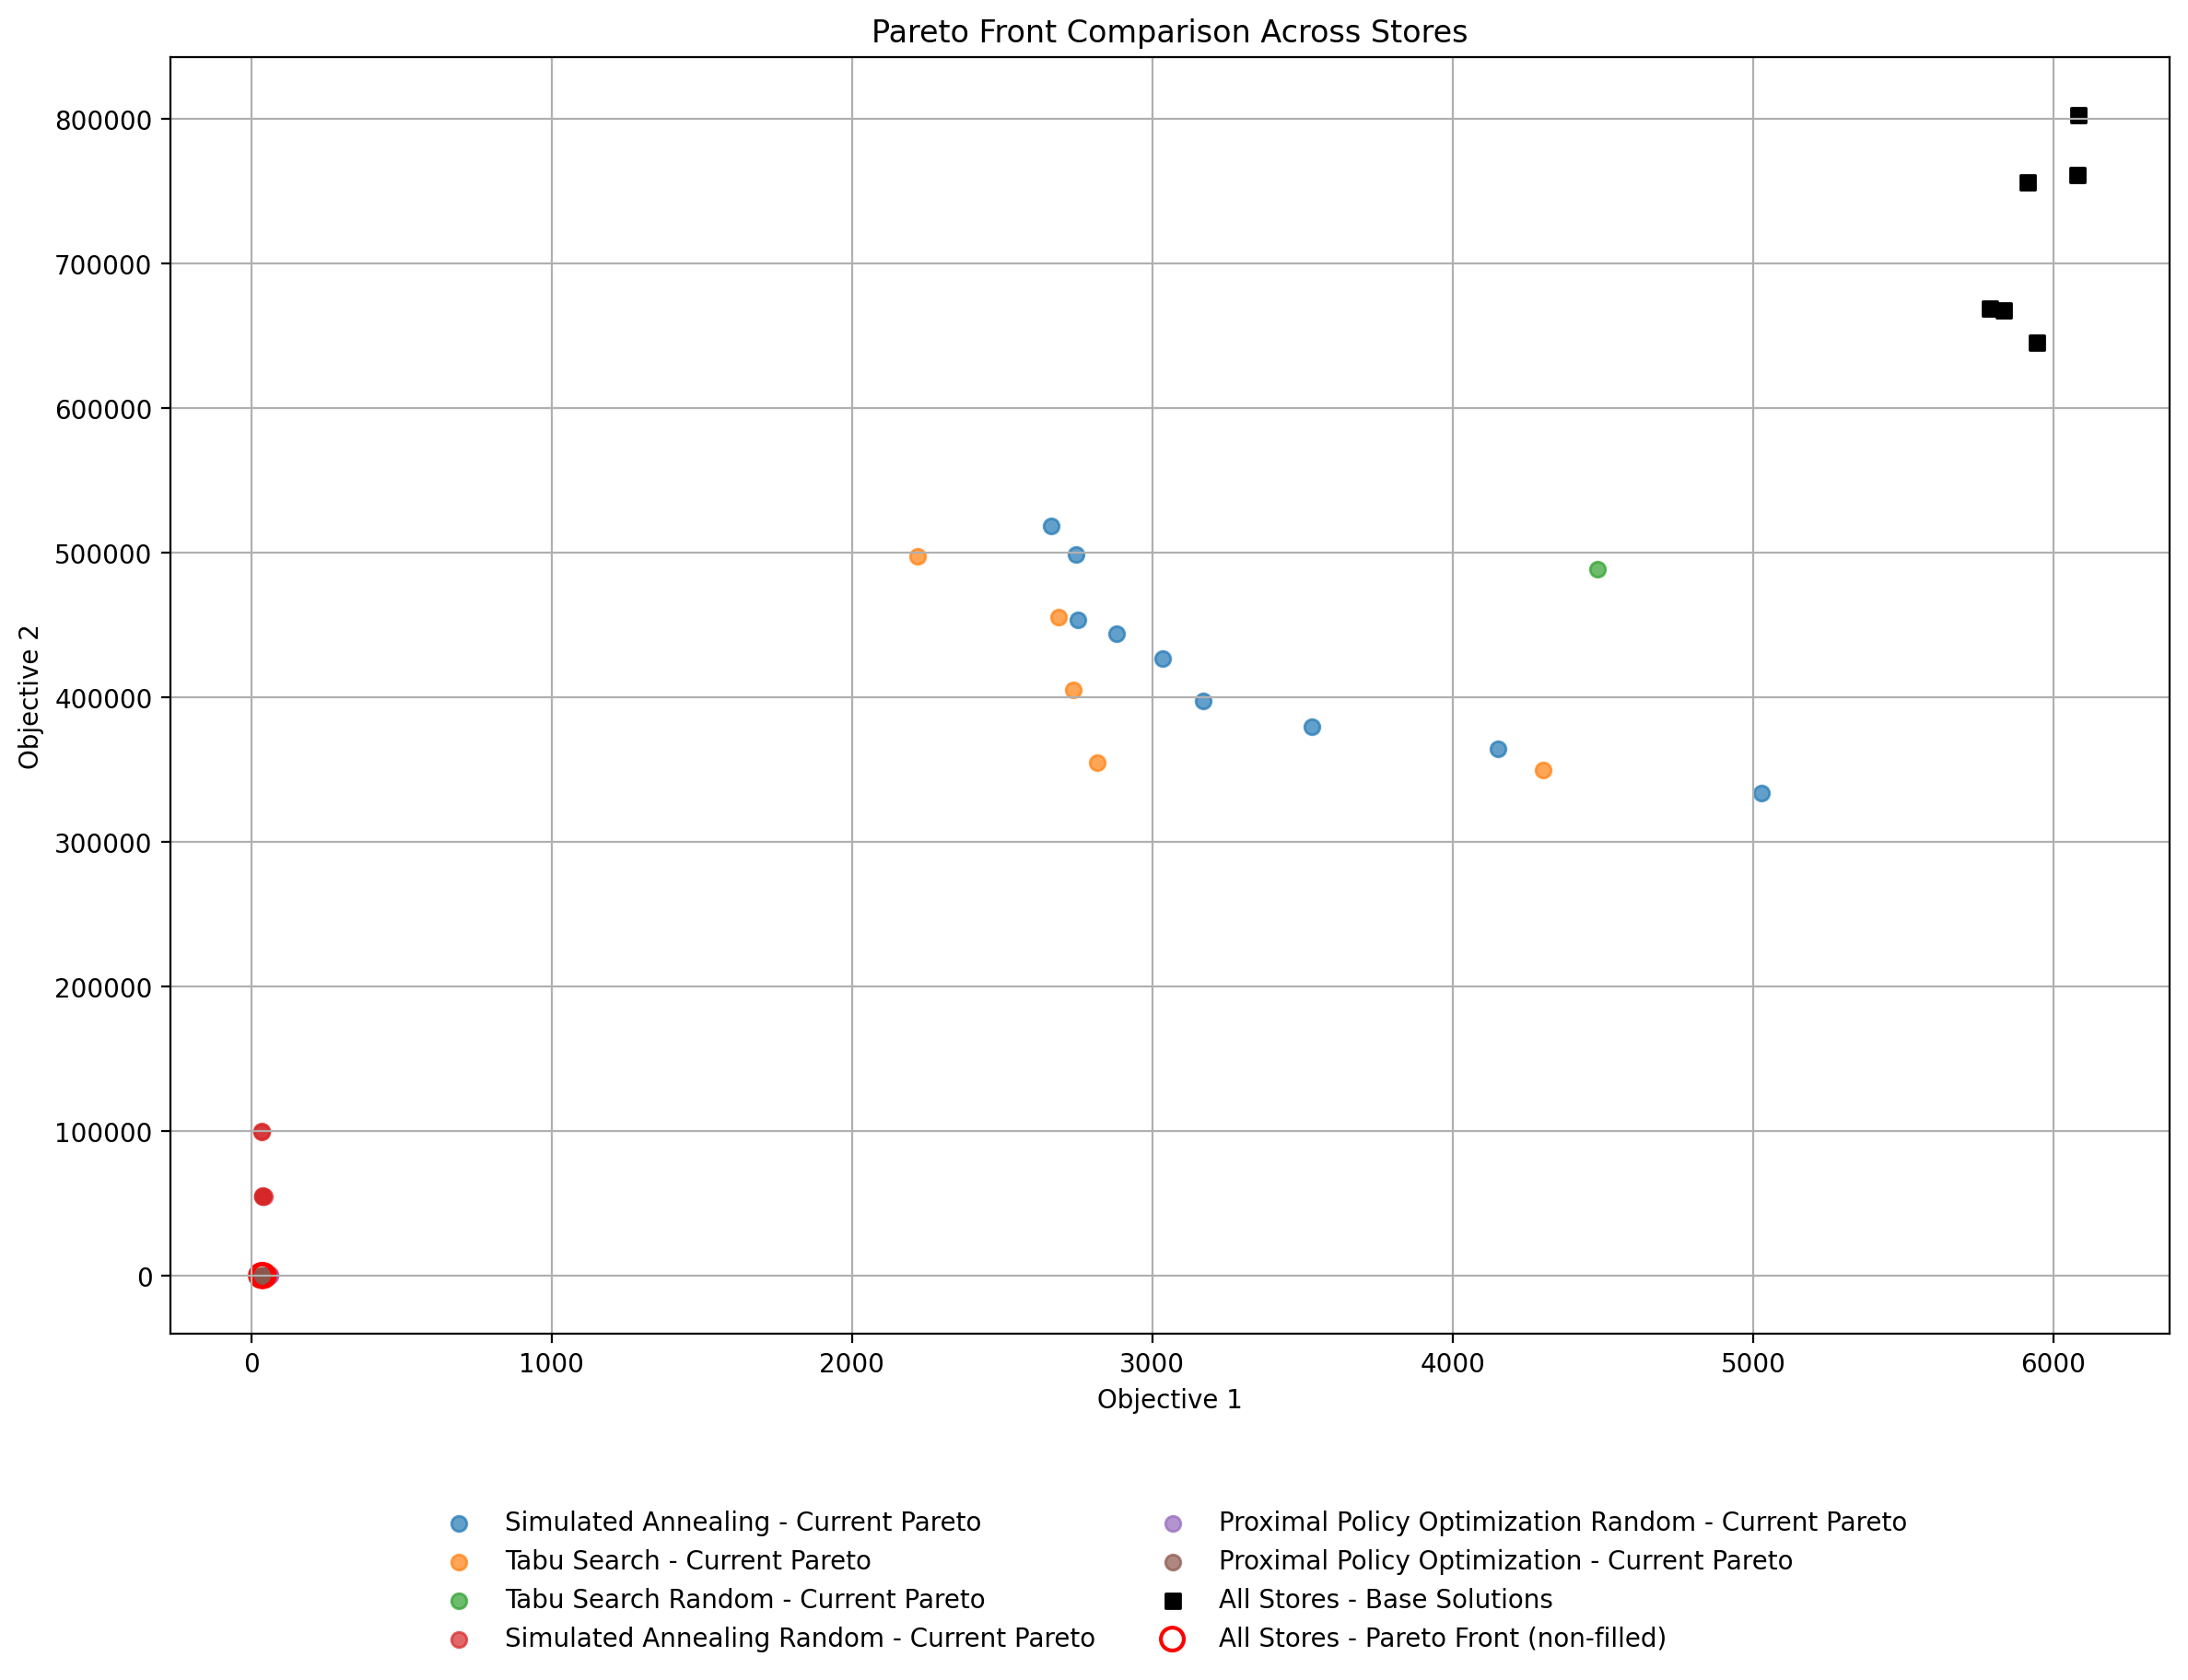

Processing ... Simulated Annealing bpi_challenge_2012_hard


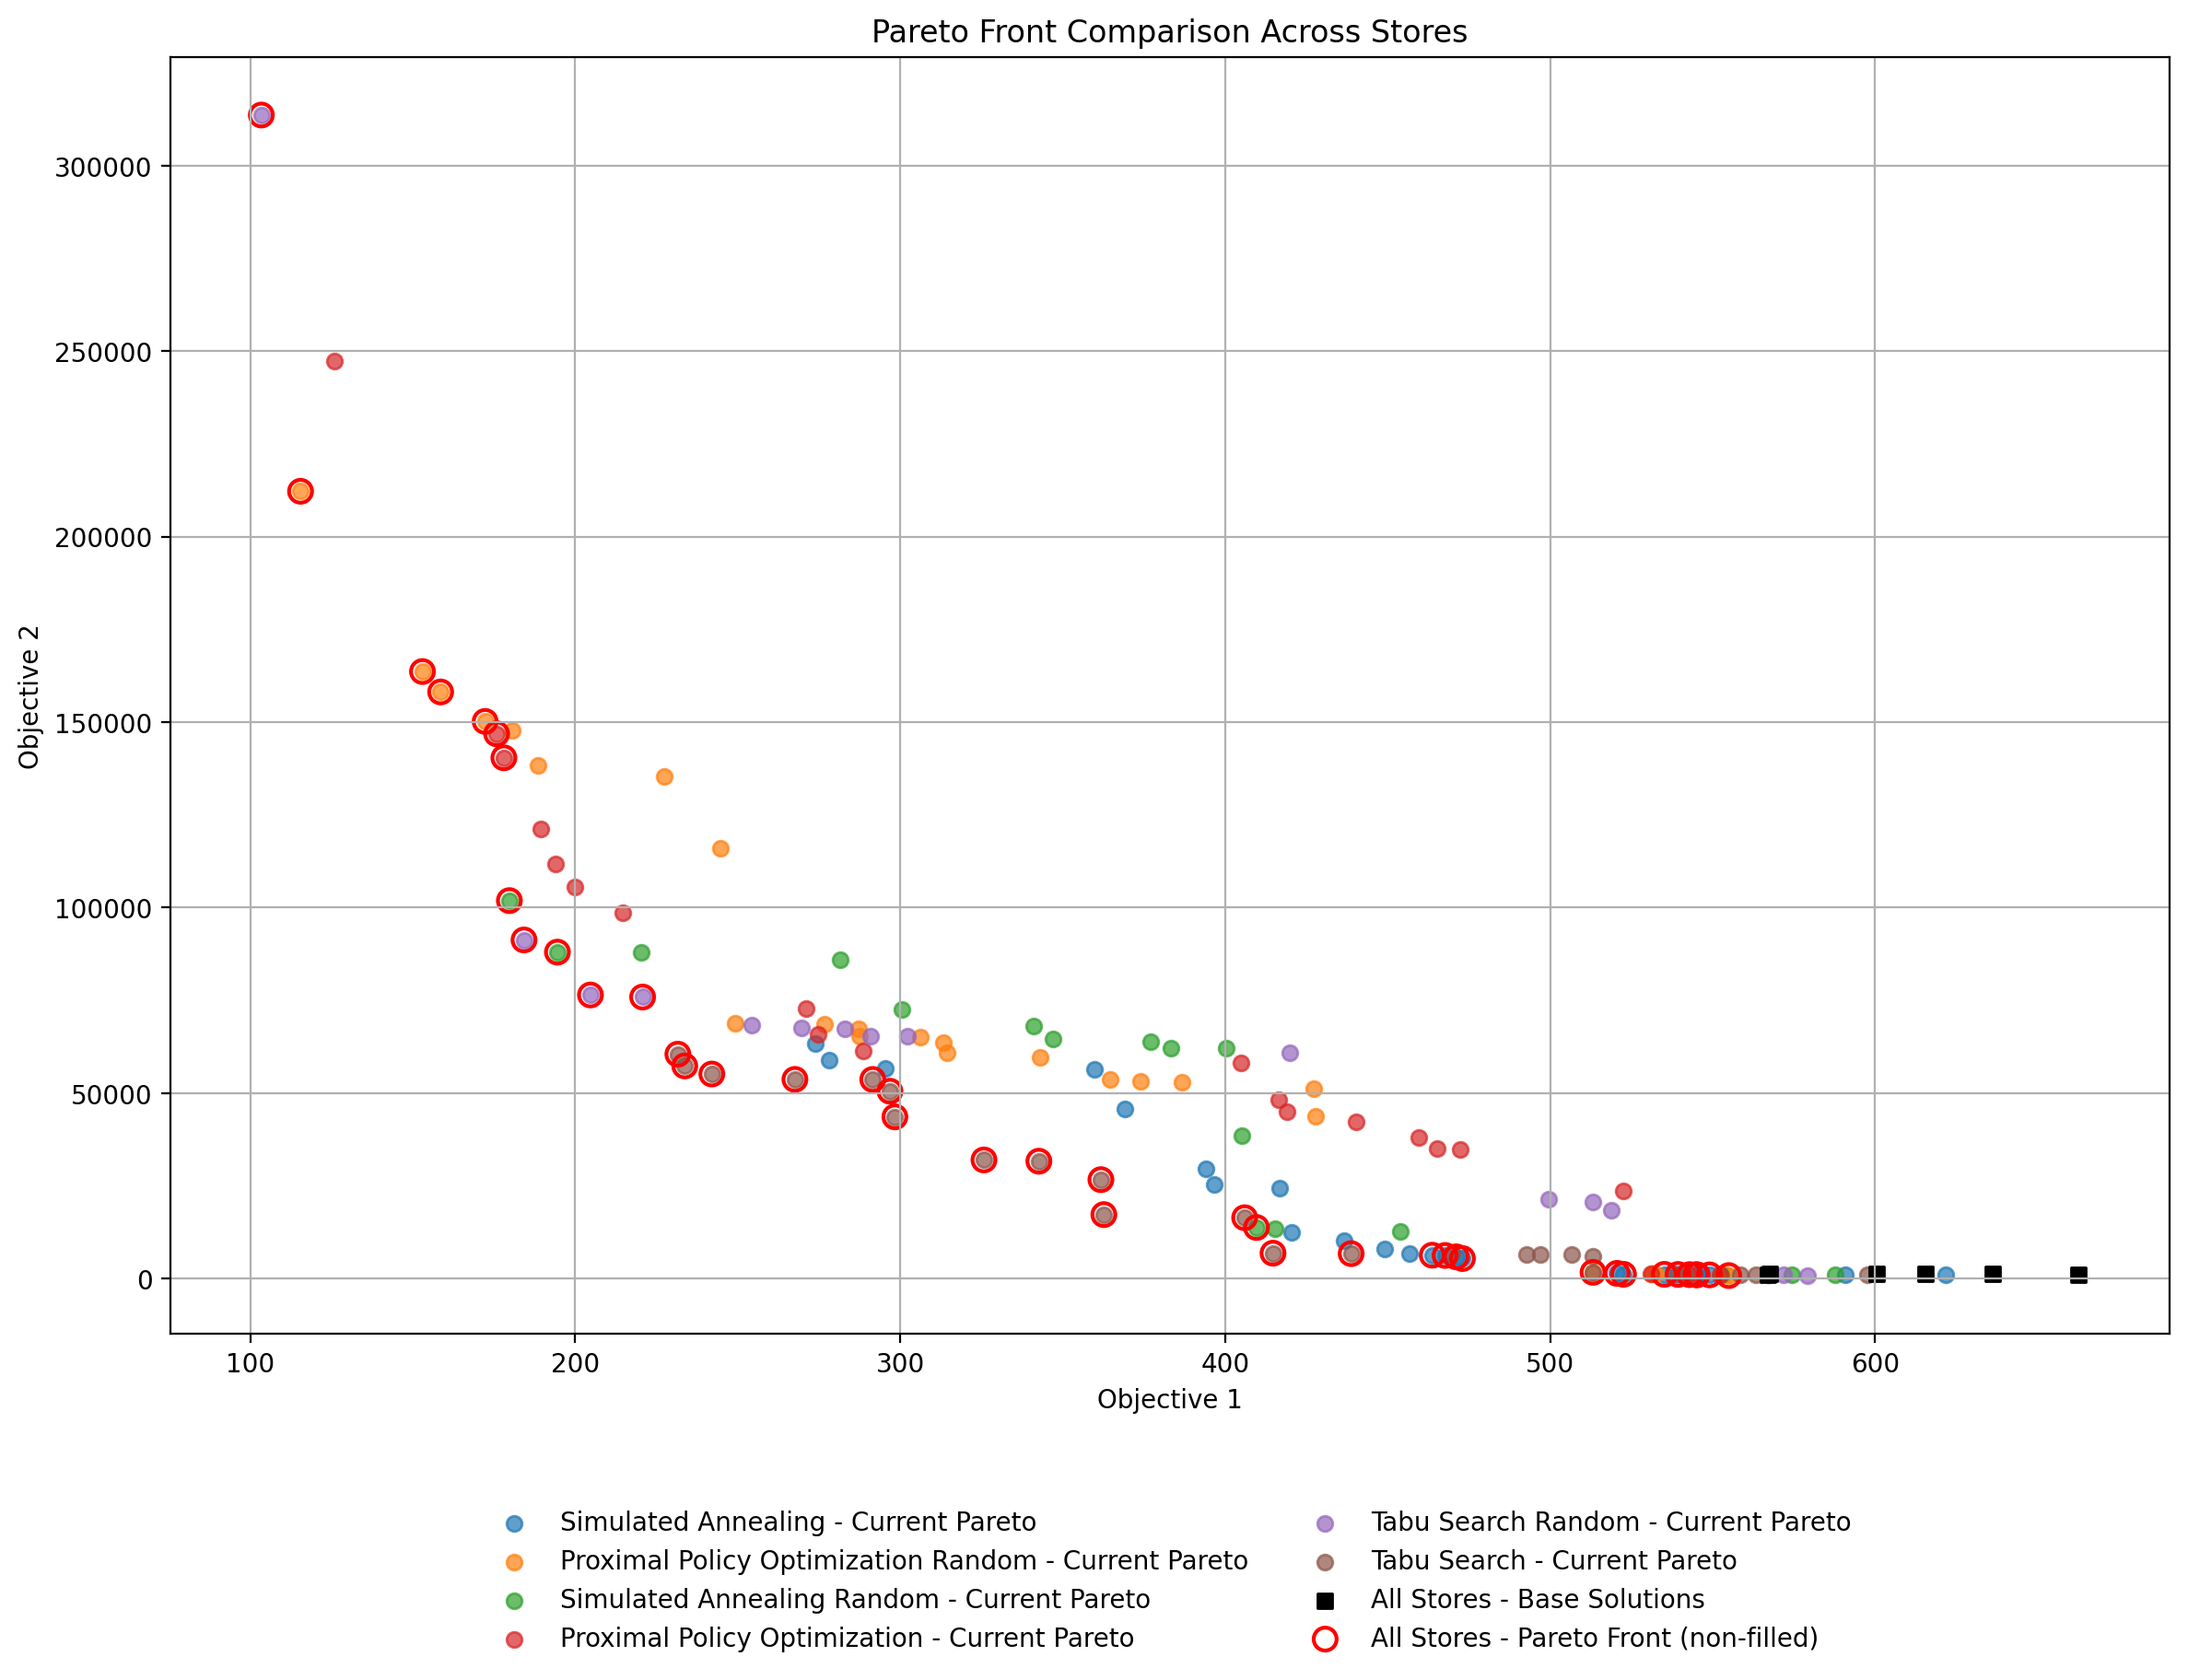

Processing ... Tabu Search Random consulta_data_mining_easy


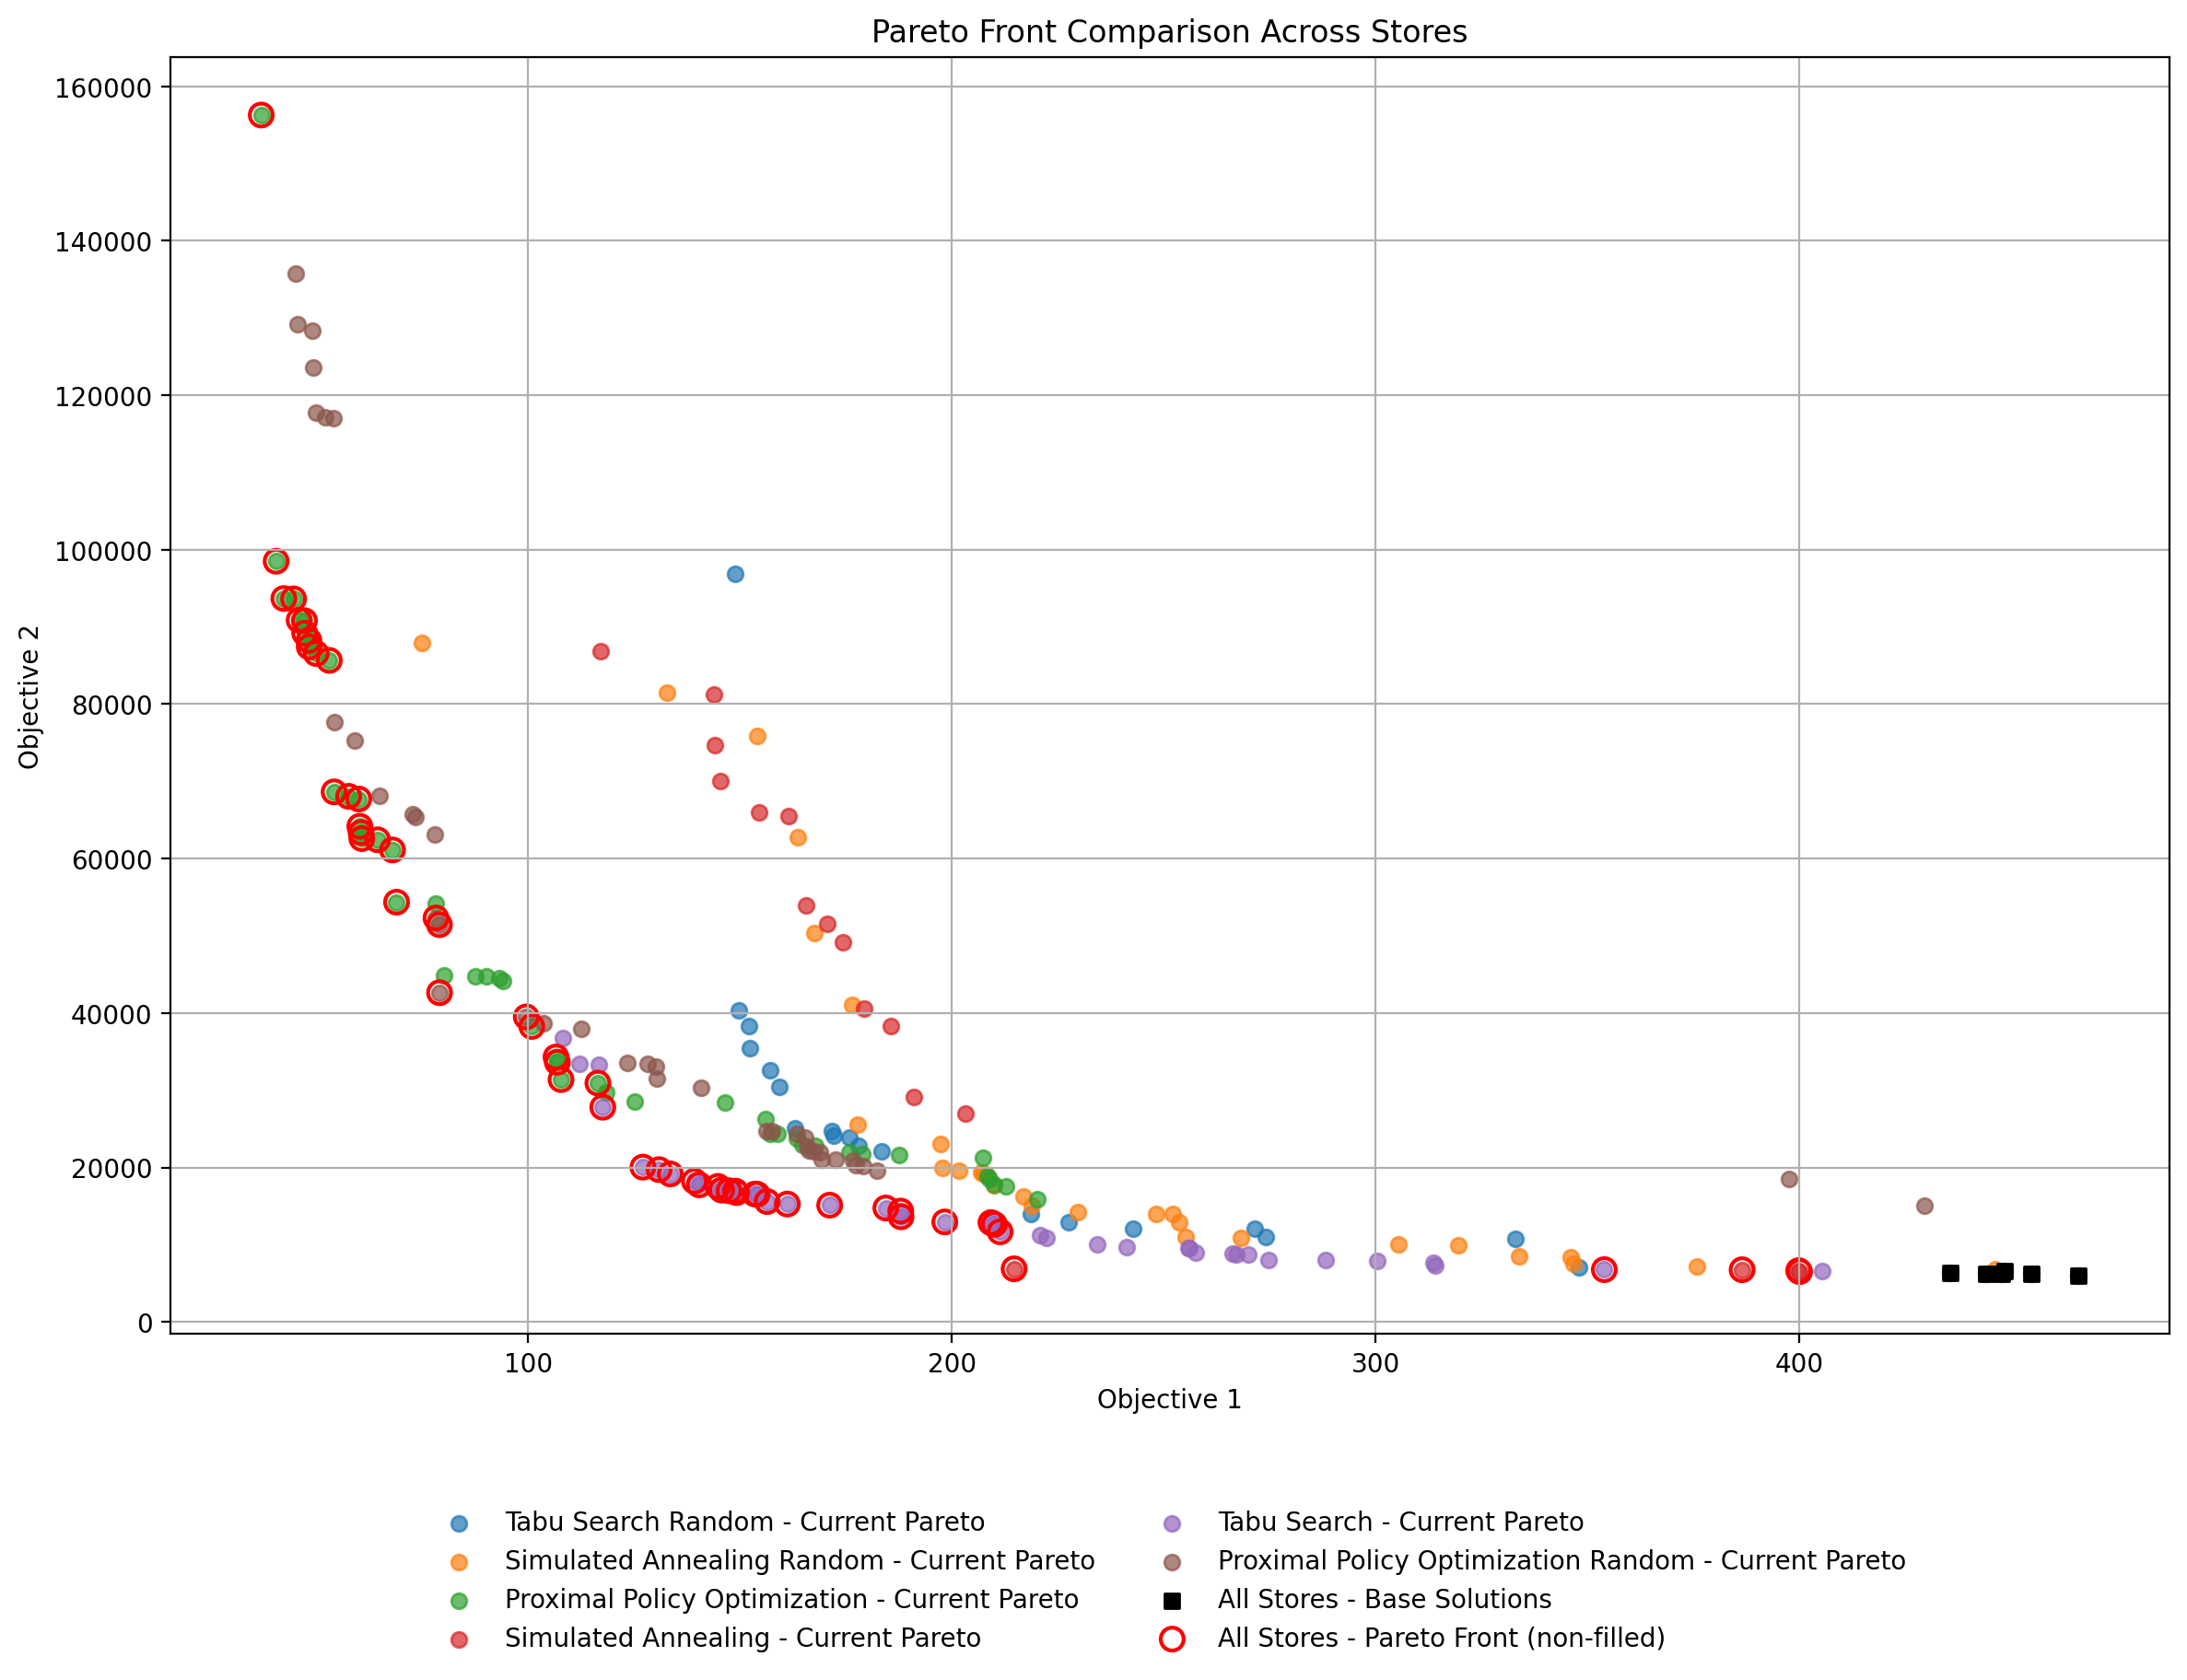

Processing ... Tabu Search Random consulta_data_mining_mid


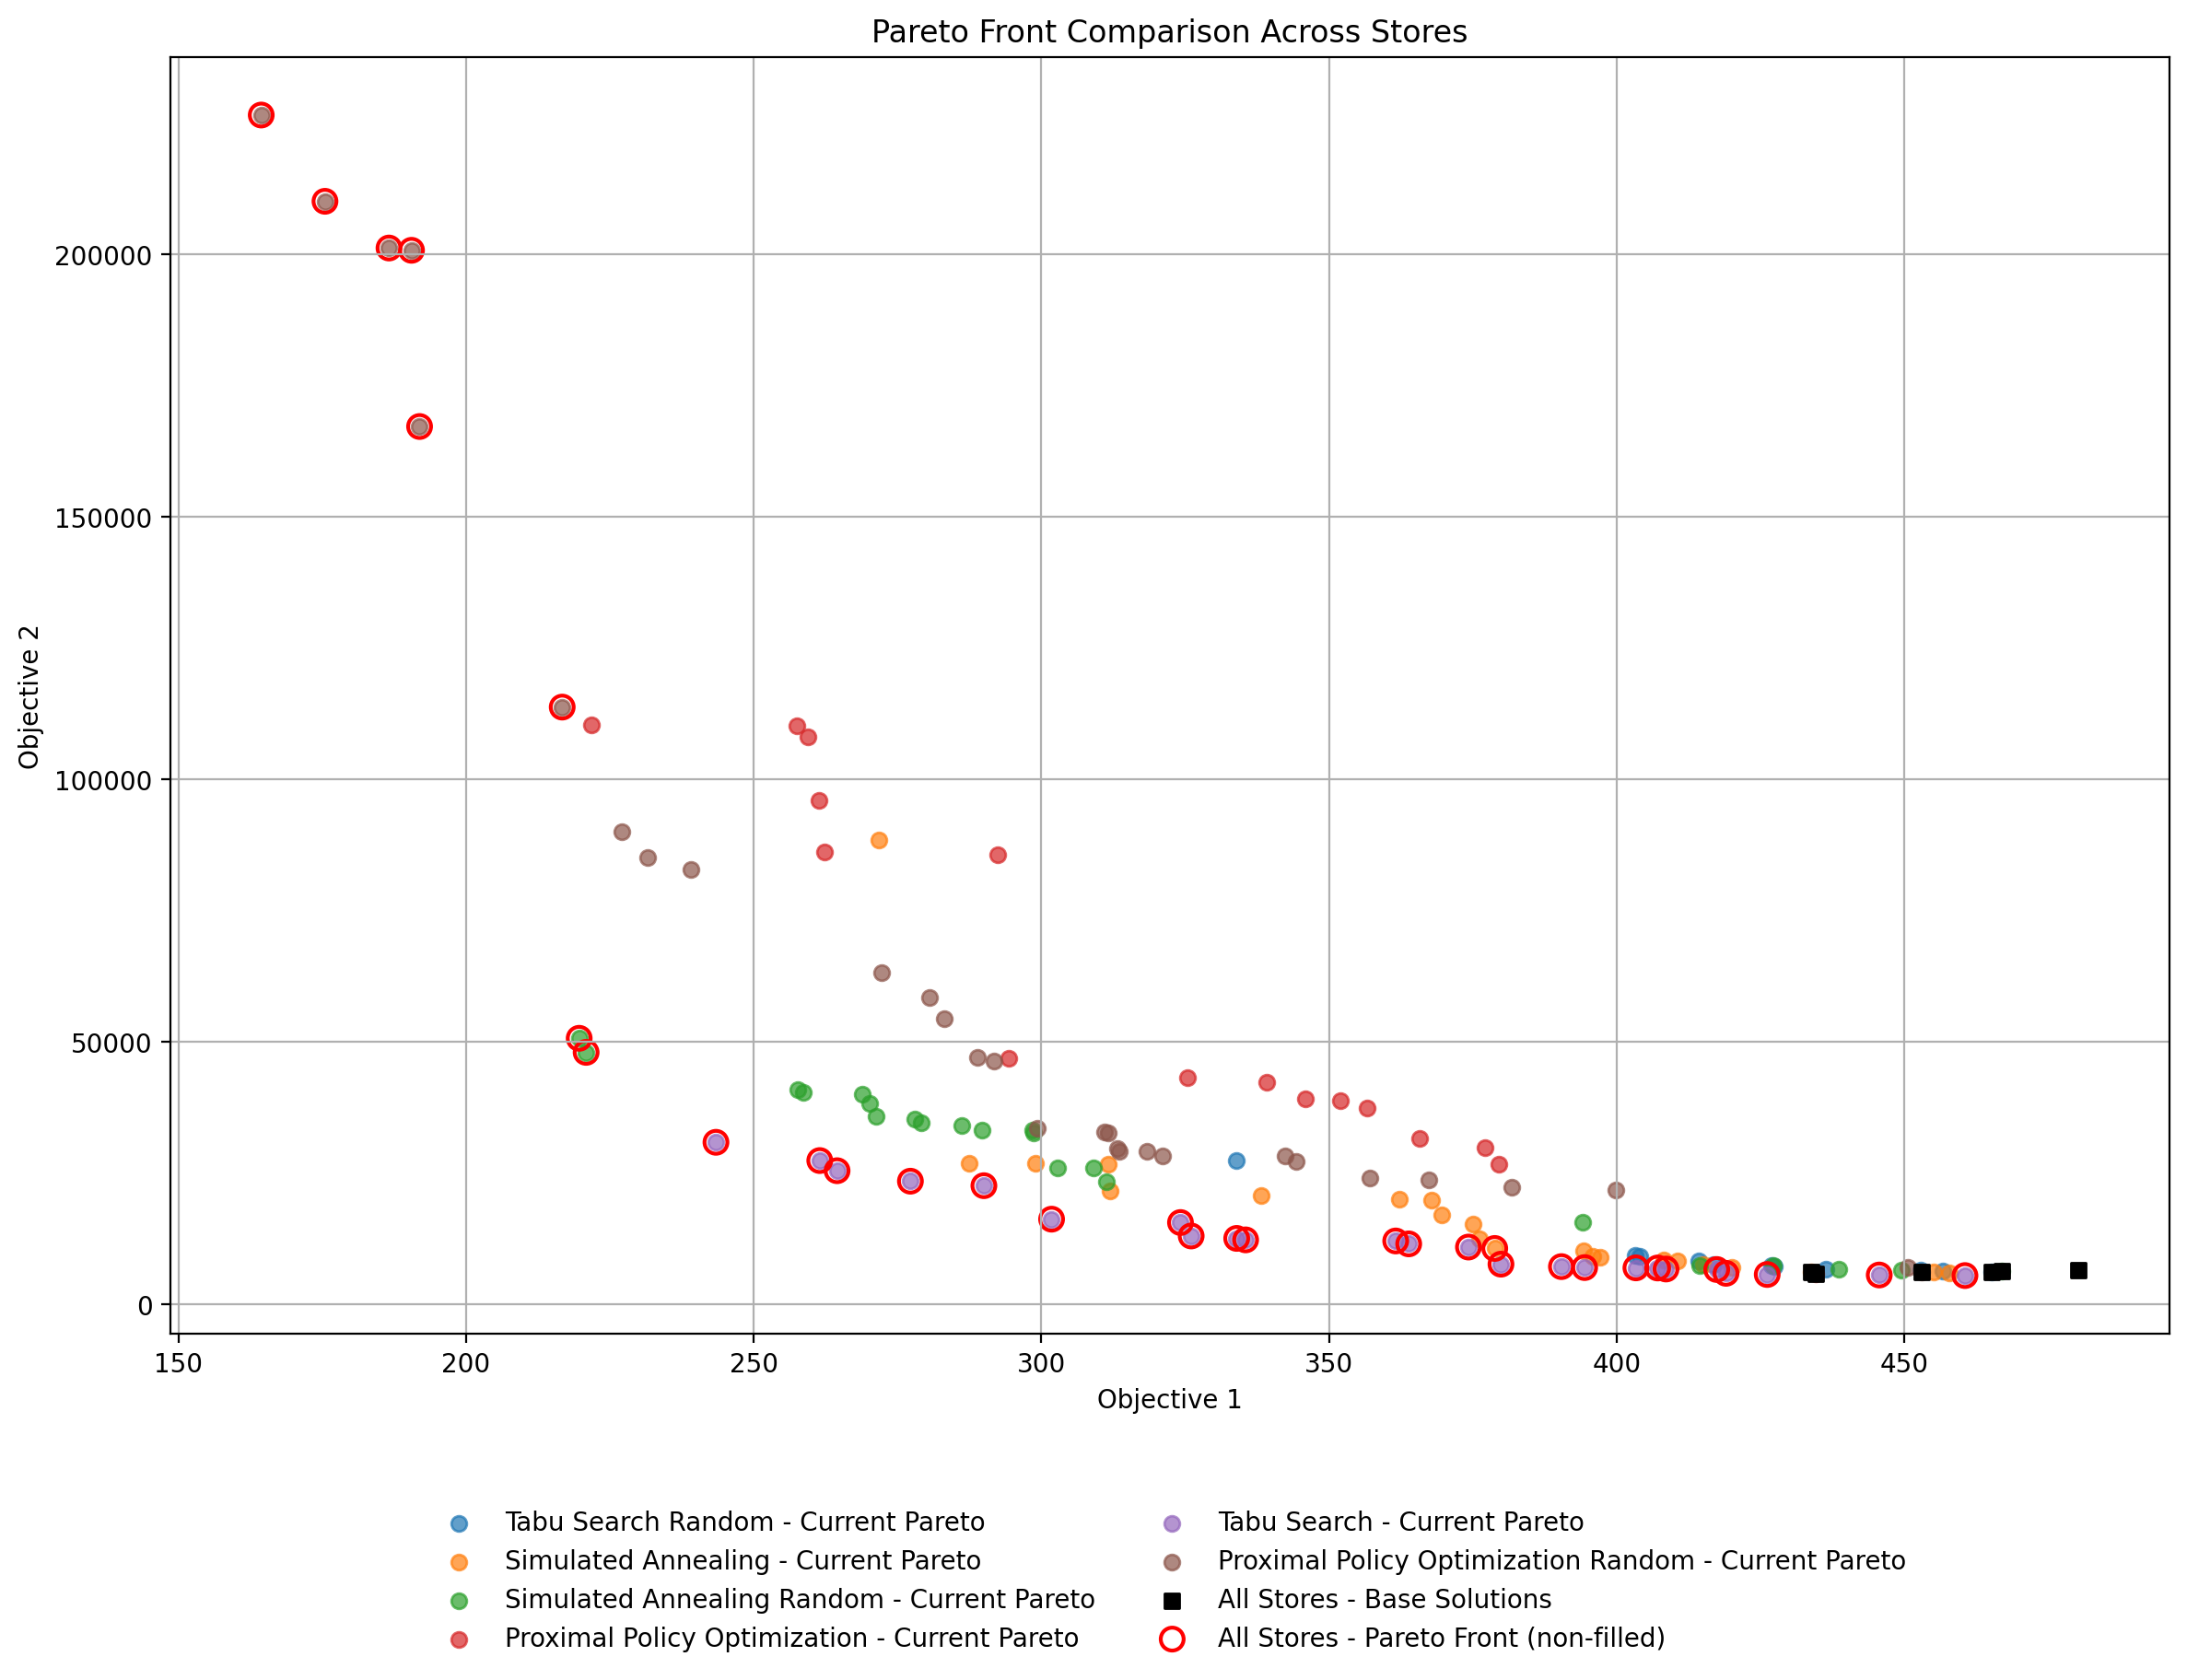

Processing ... Proximal Policy Optimization Random purchasing_example_hard


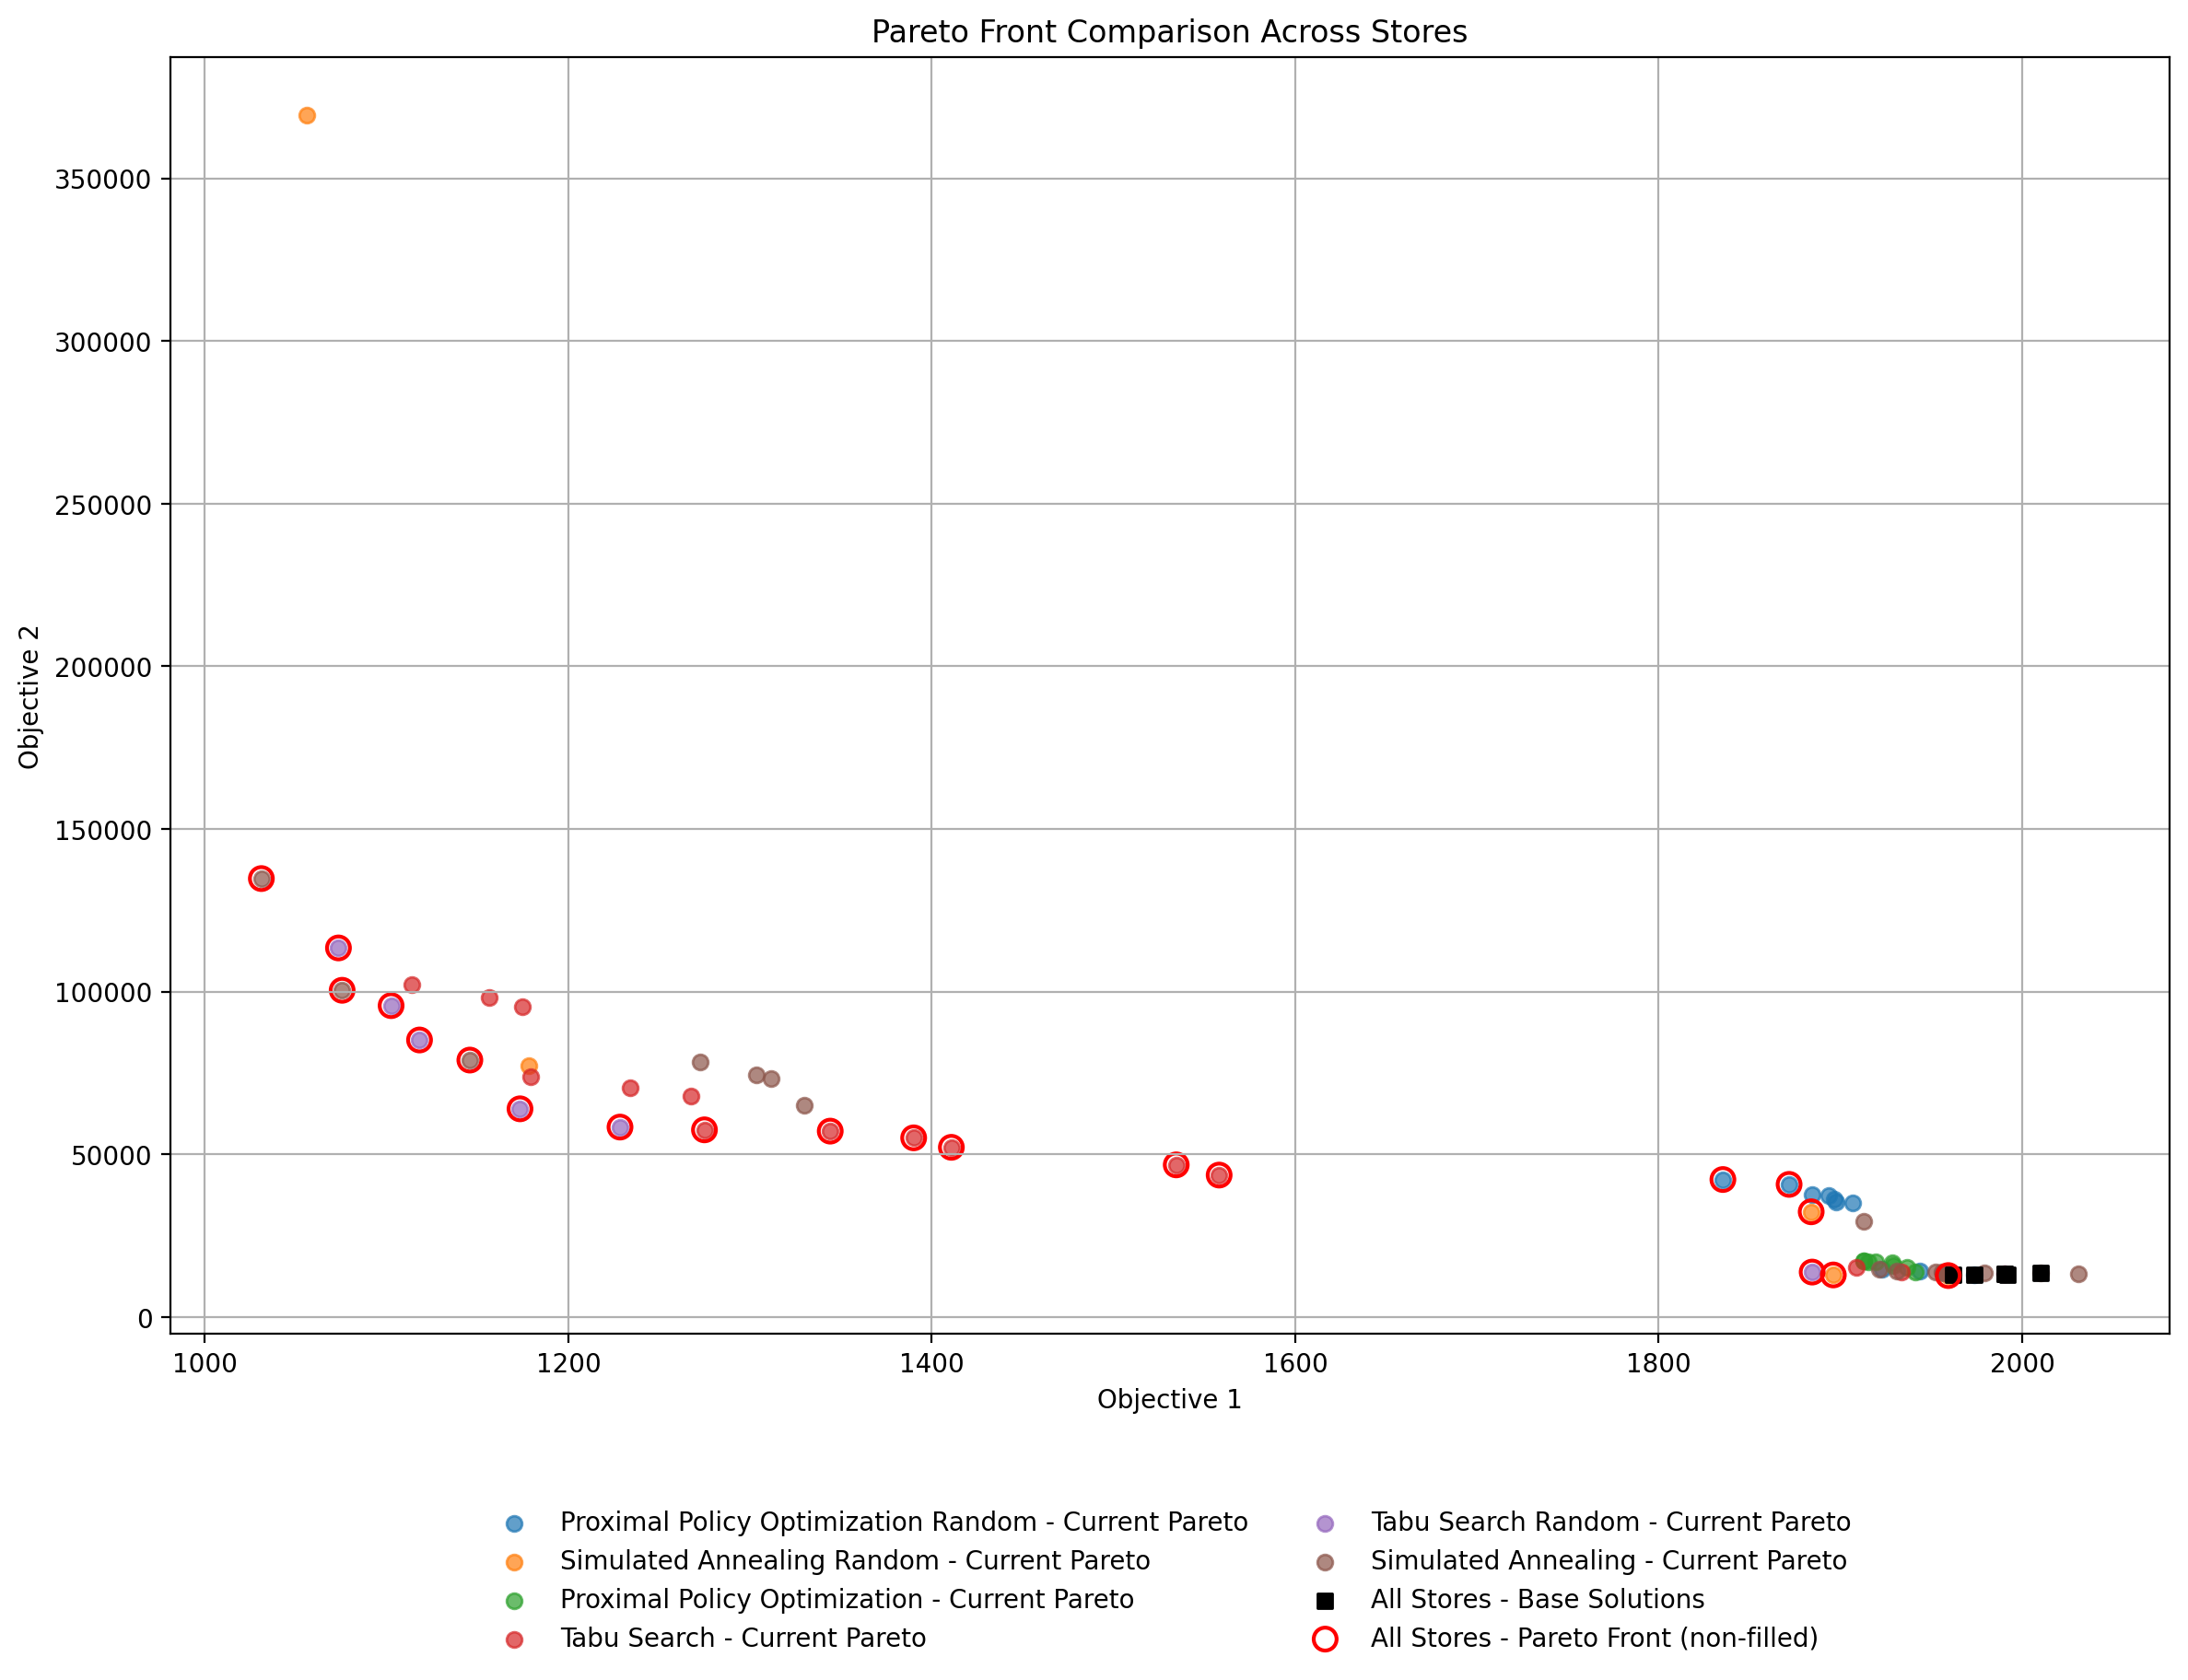

Processing ... Tabu Search callcentre_hard


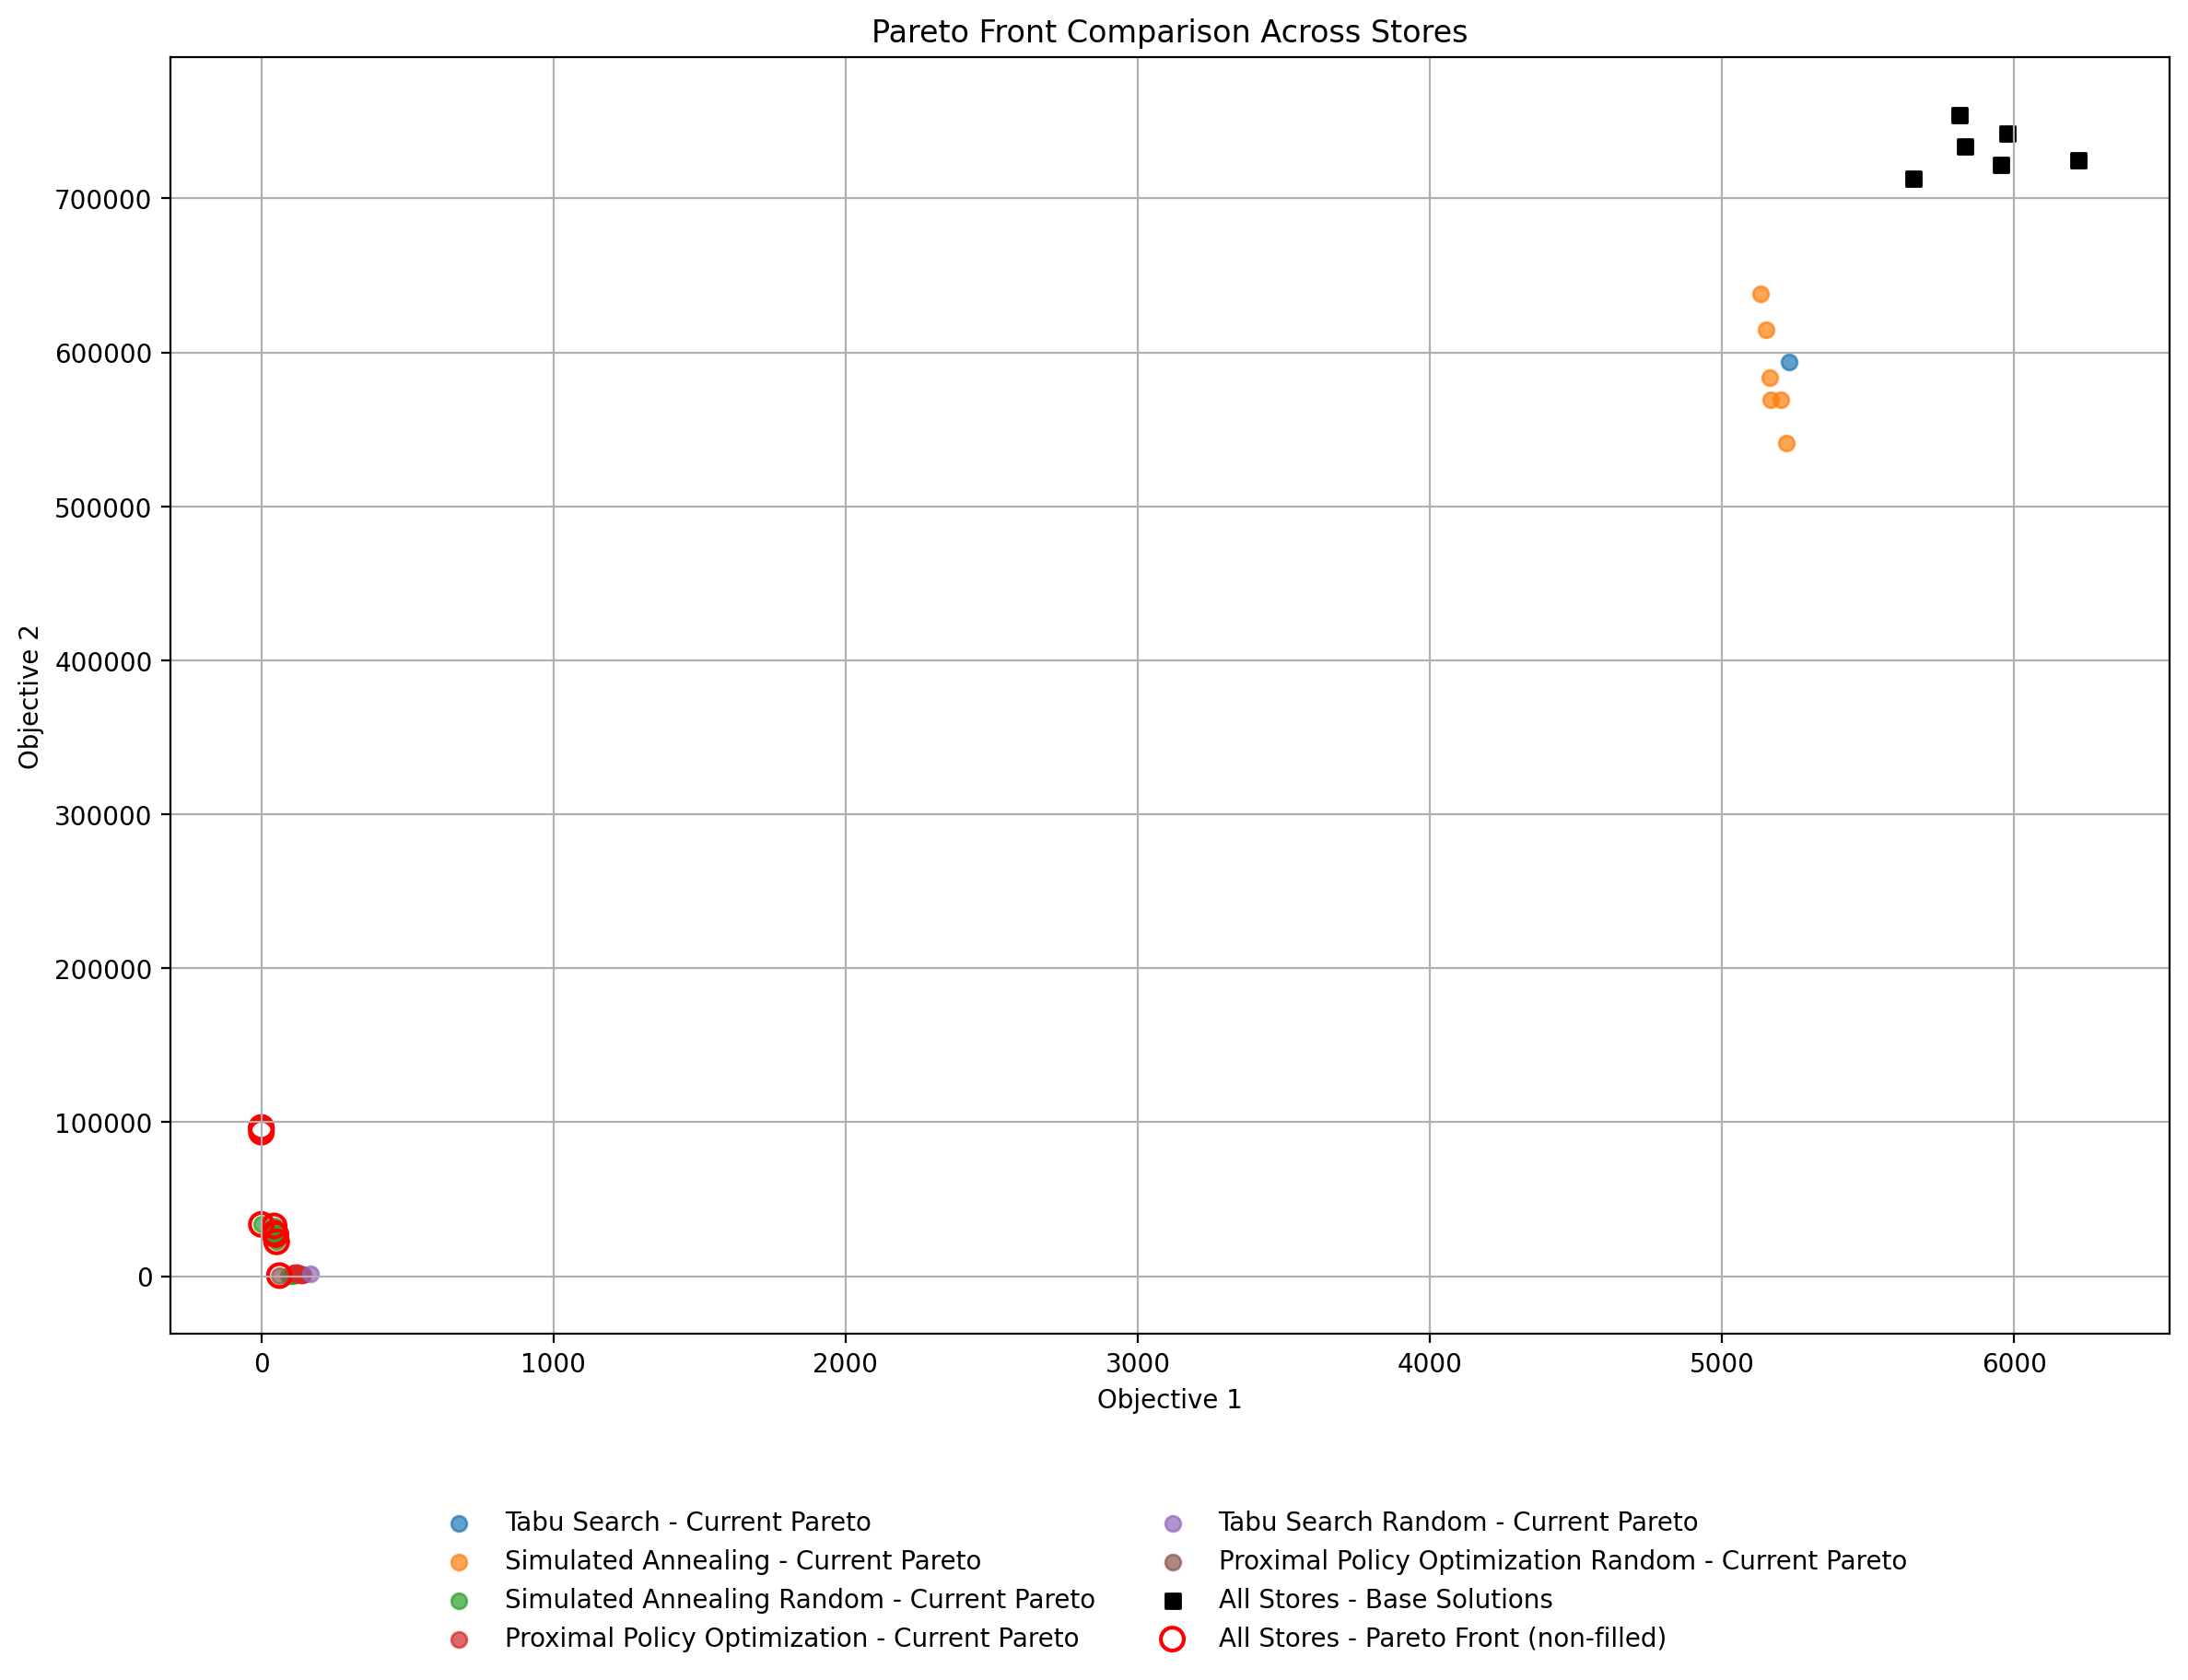

Processing ... Tabu Search purchasing_example_easy


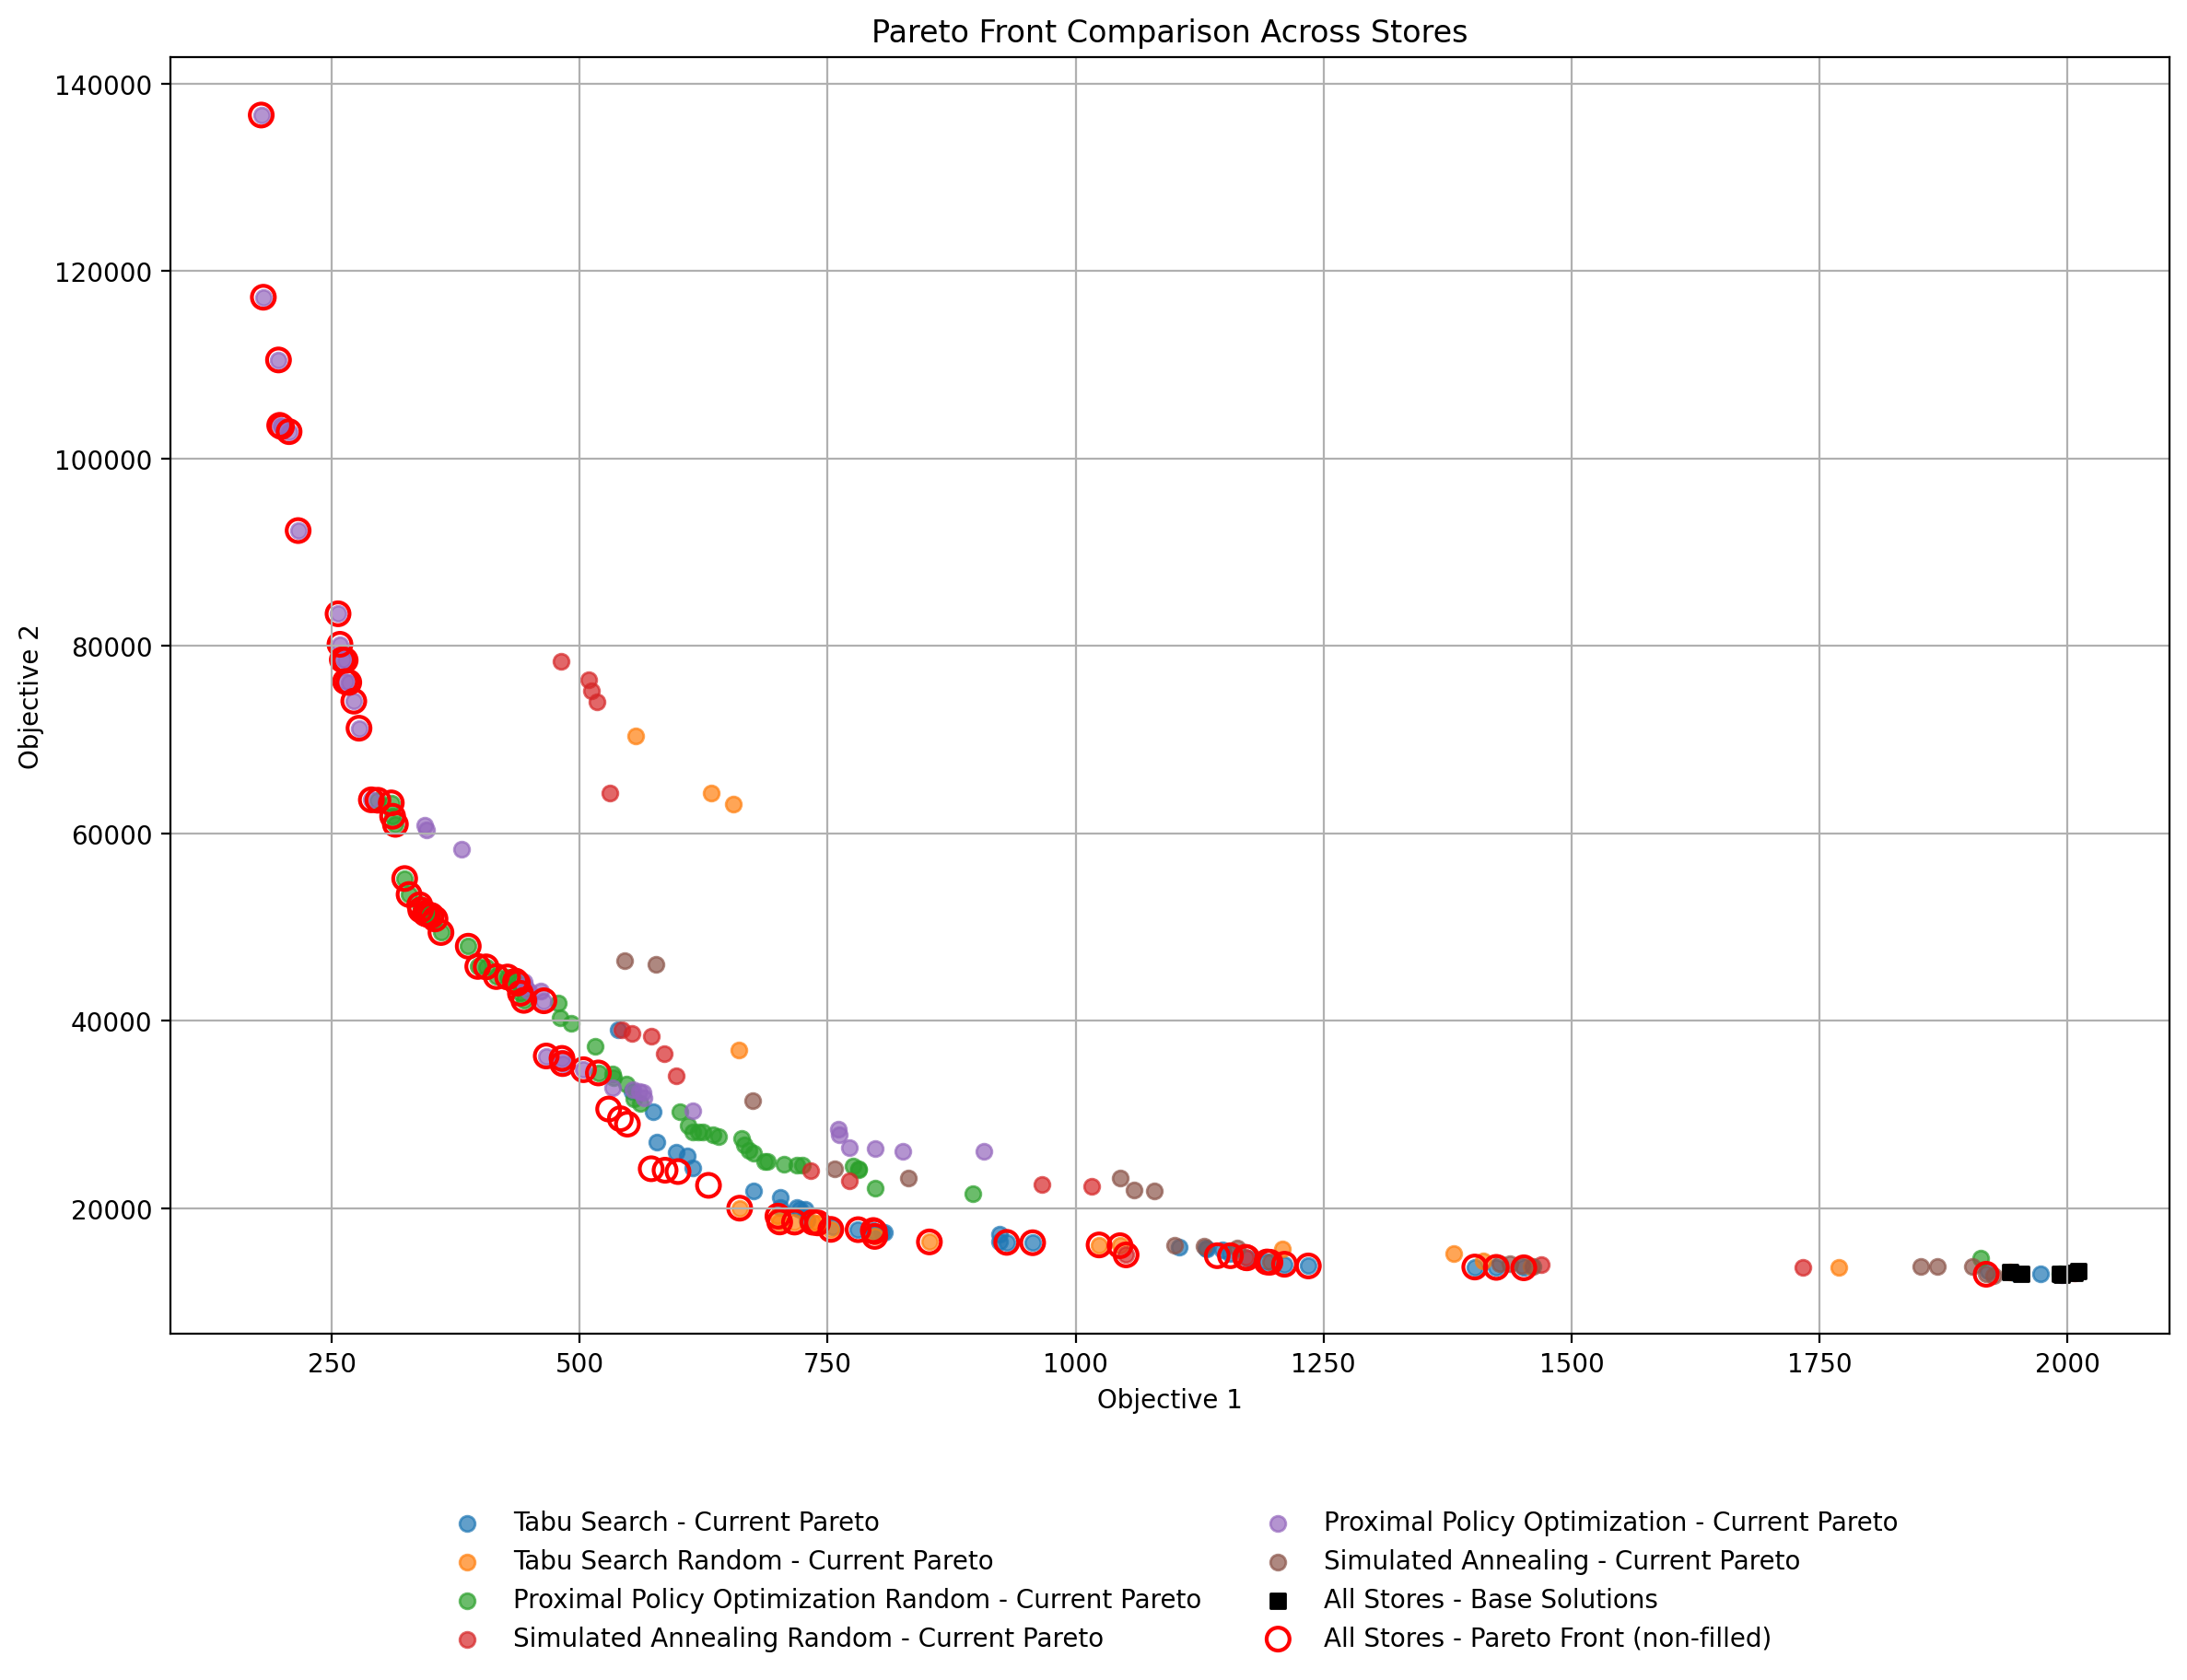

Processing ... Tabu Search Random purchasing_example_mid


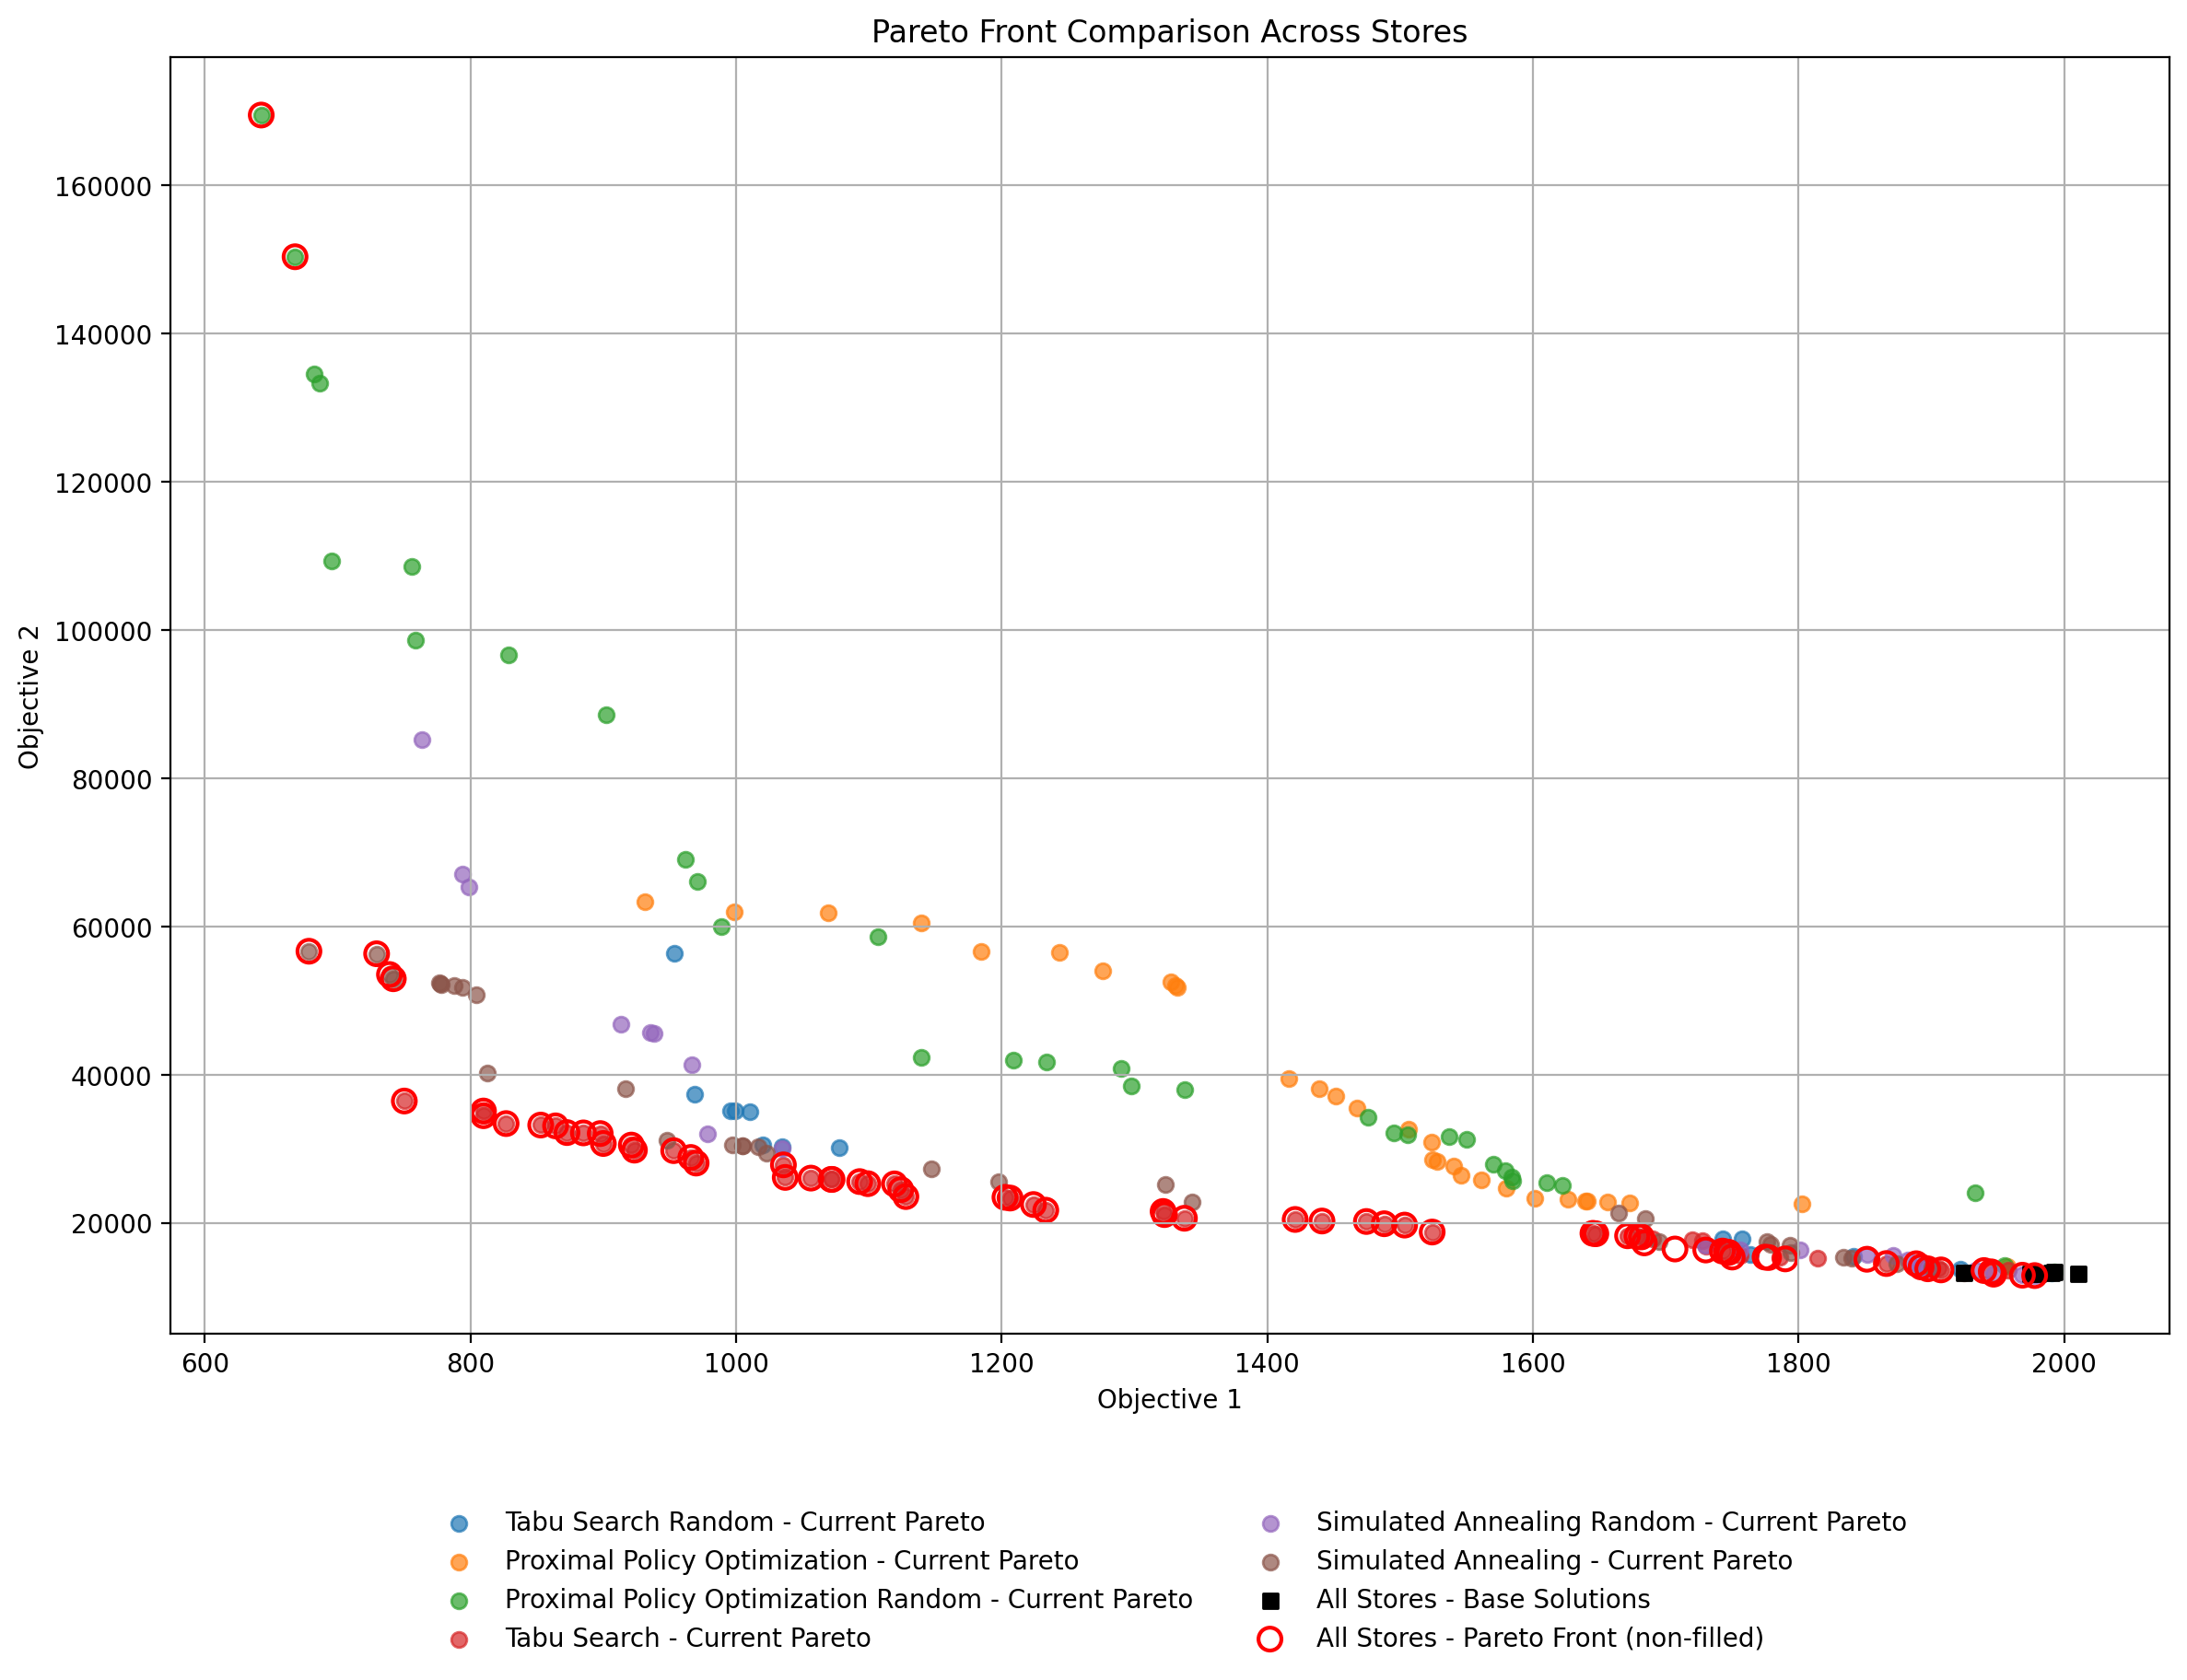

Processing ... Simulated Annealing insurance_mid


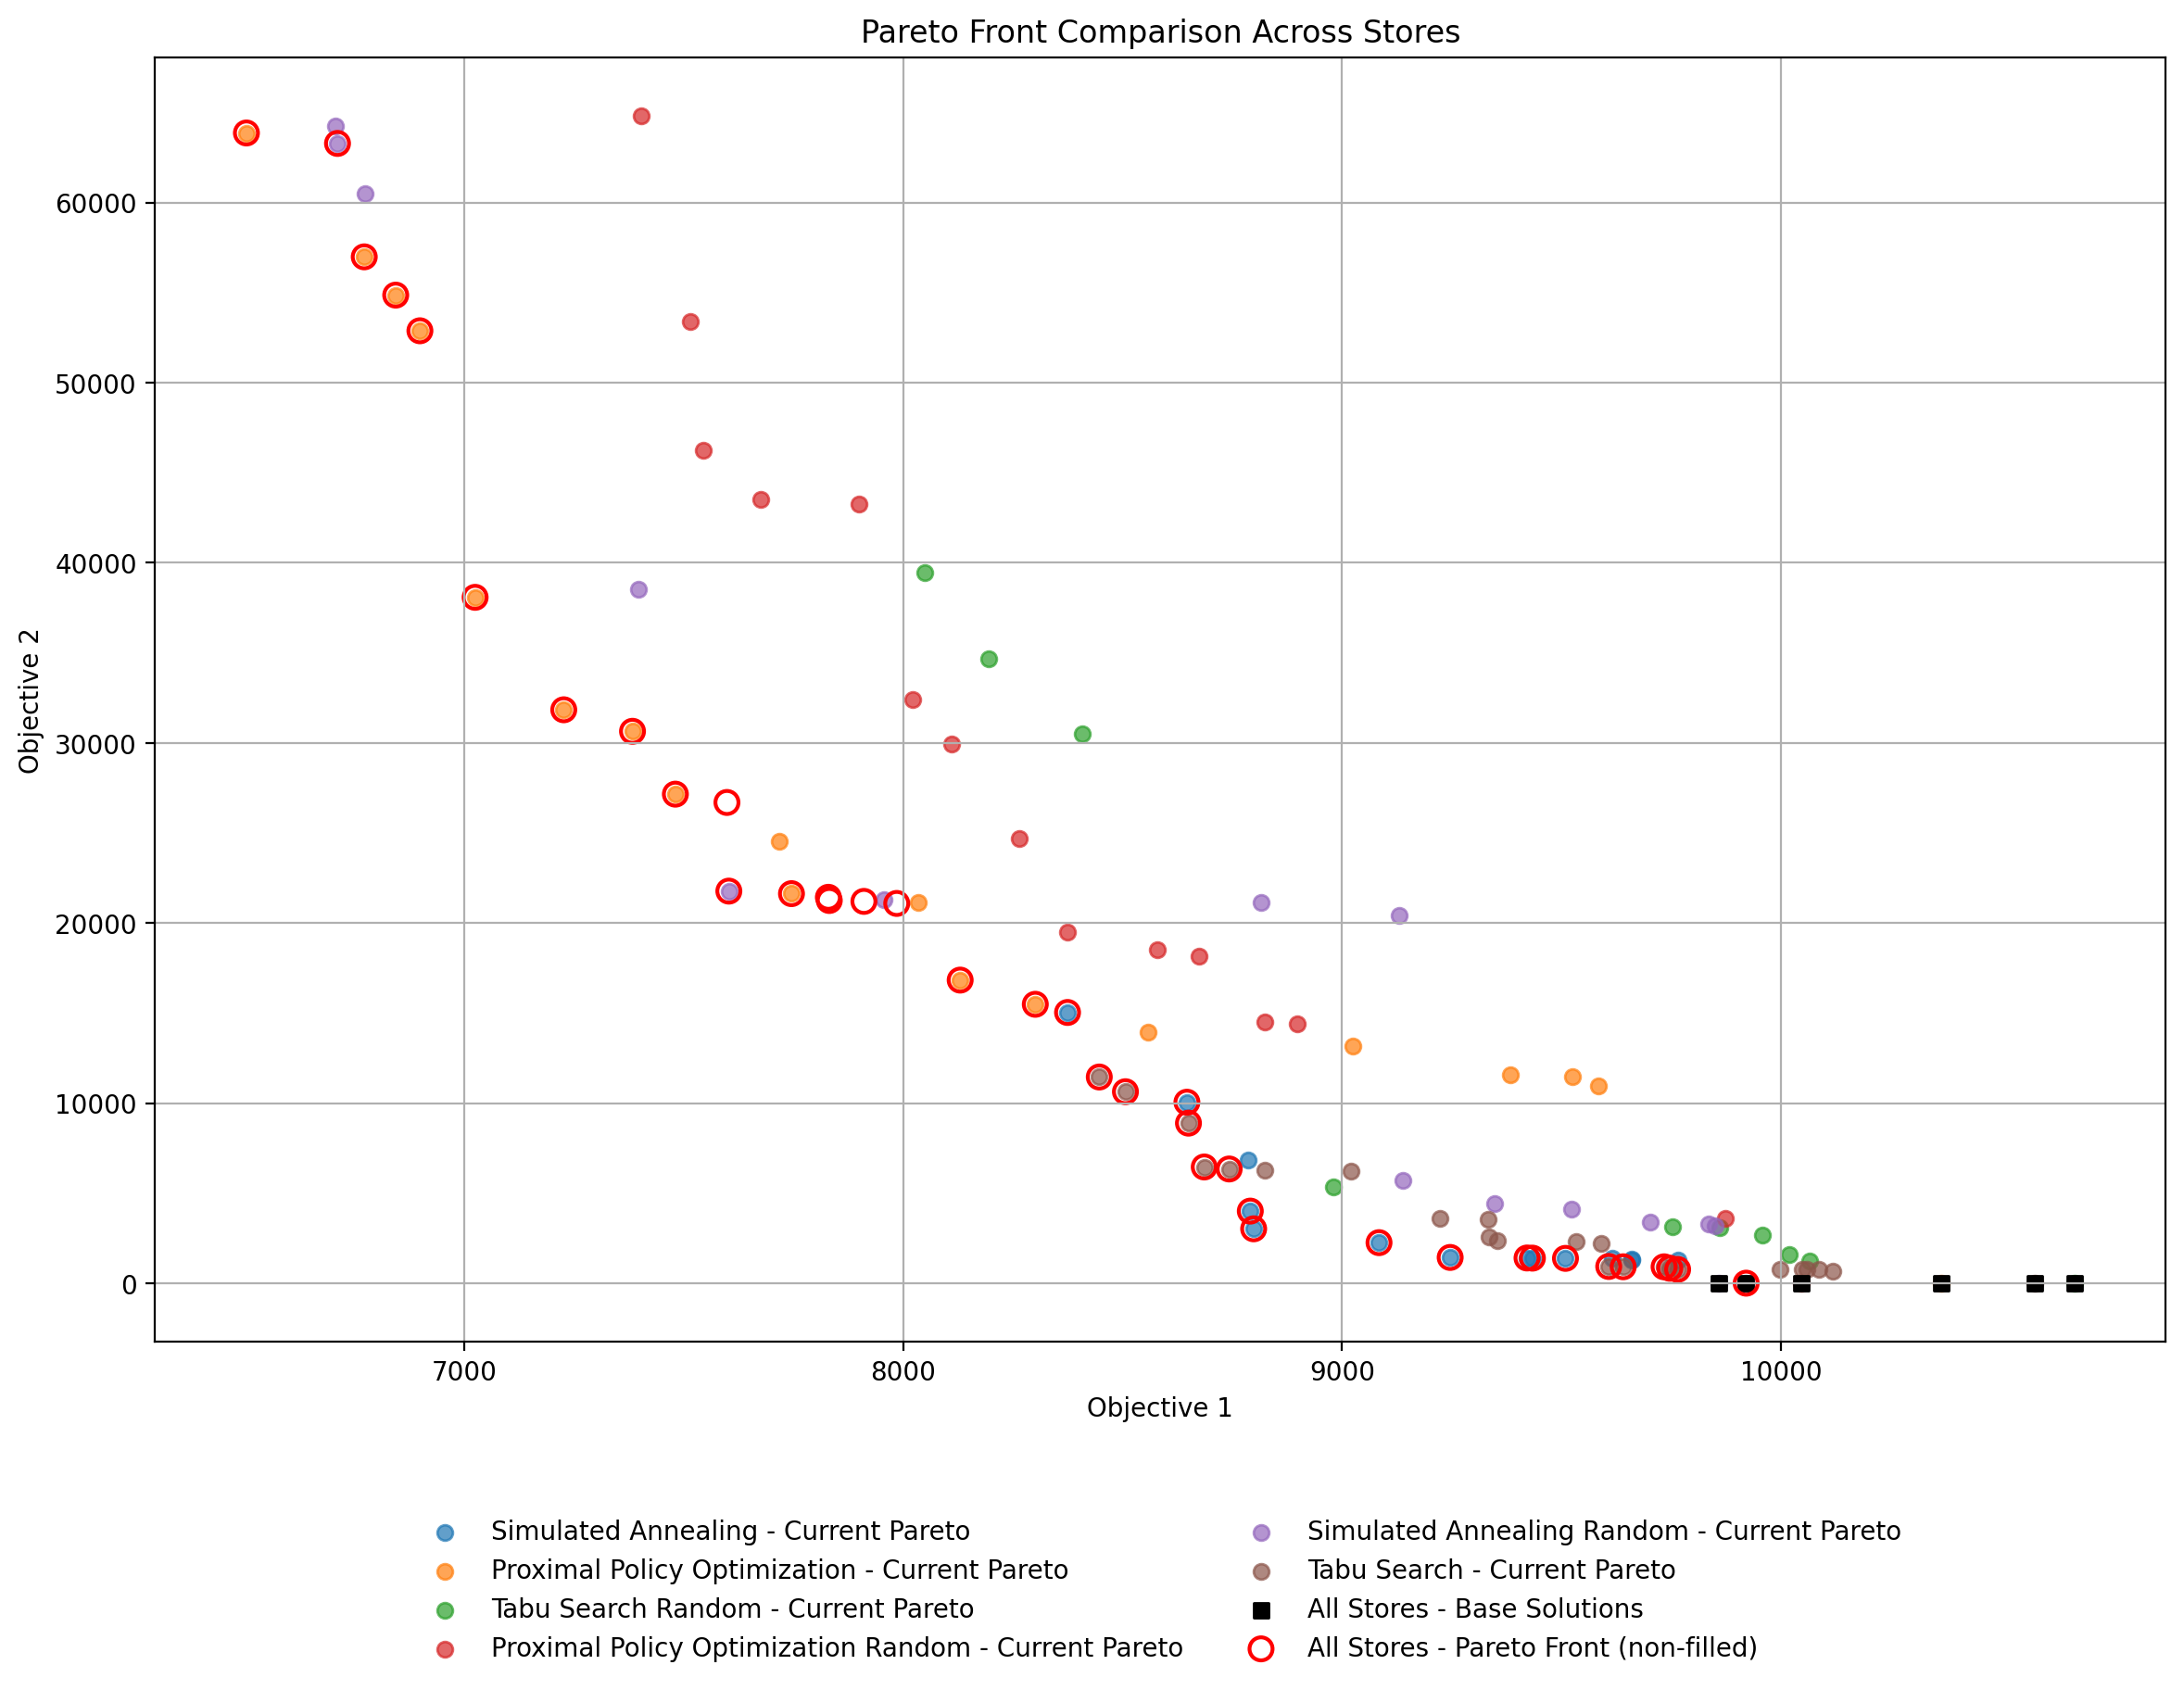

Processing ... Tabu Search Random production_easy


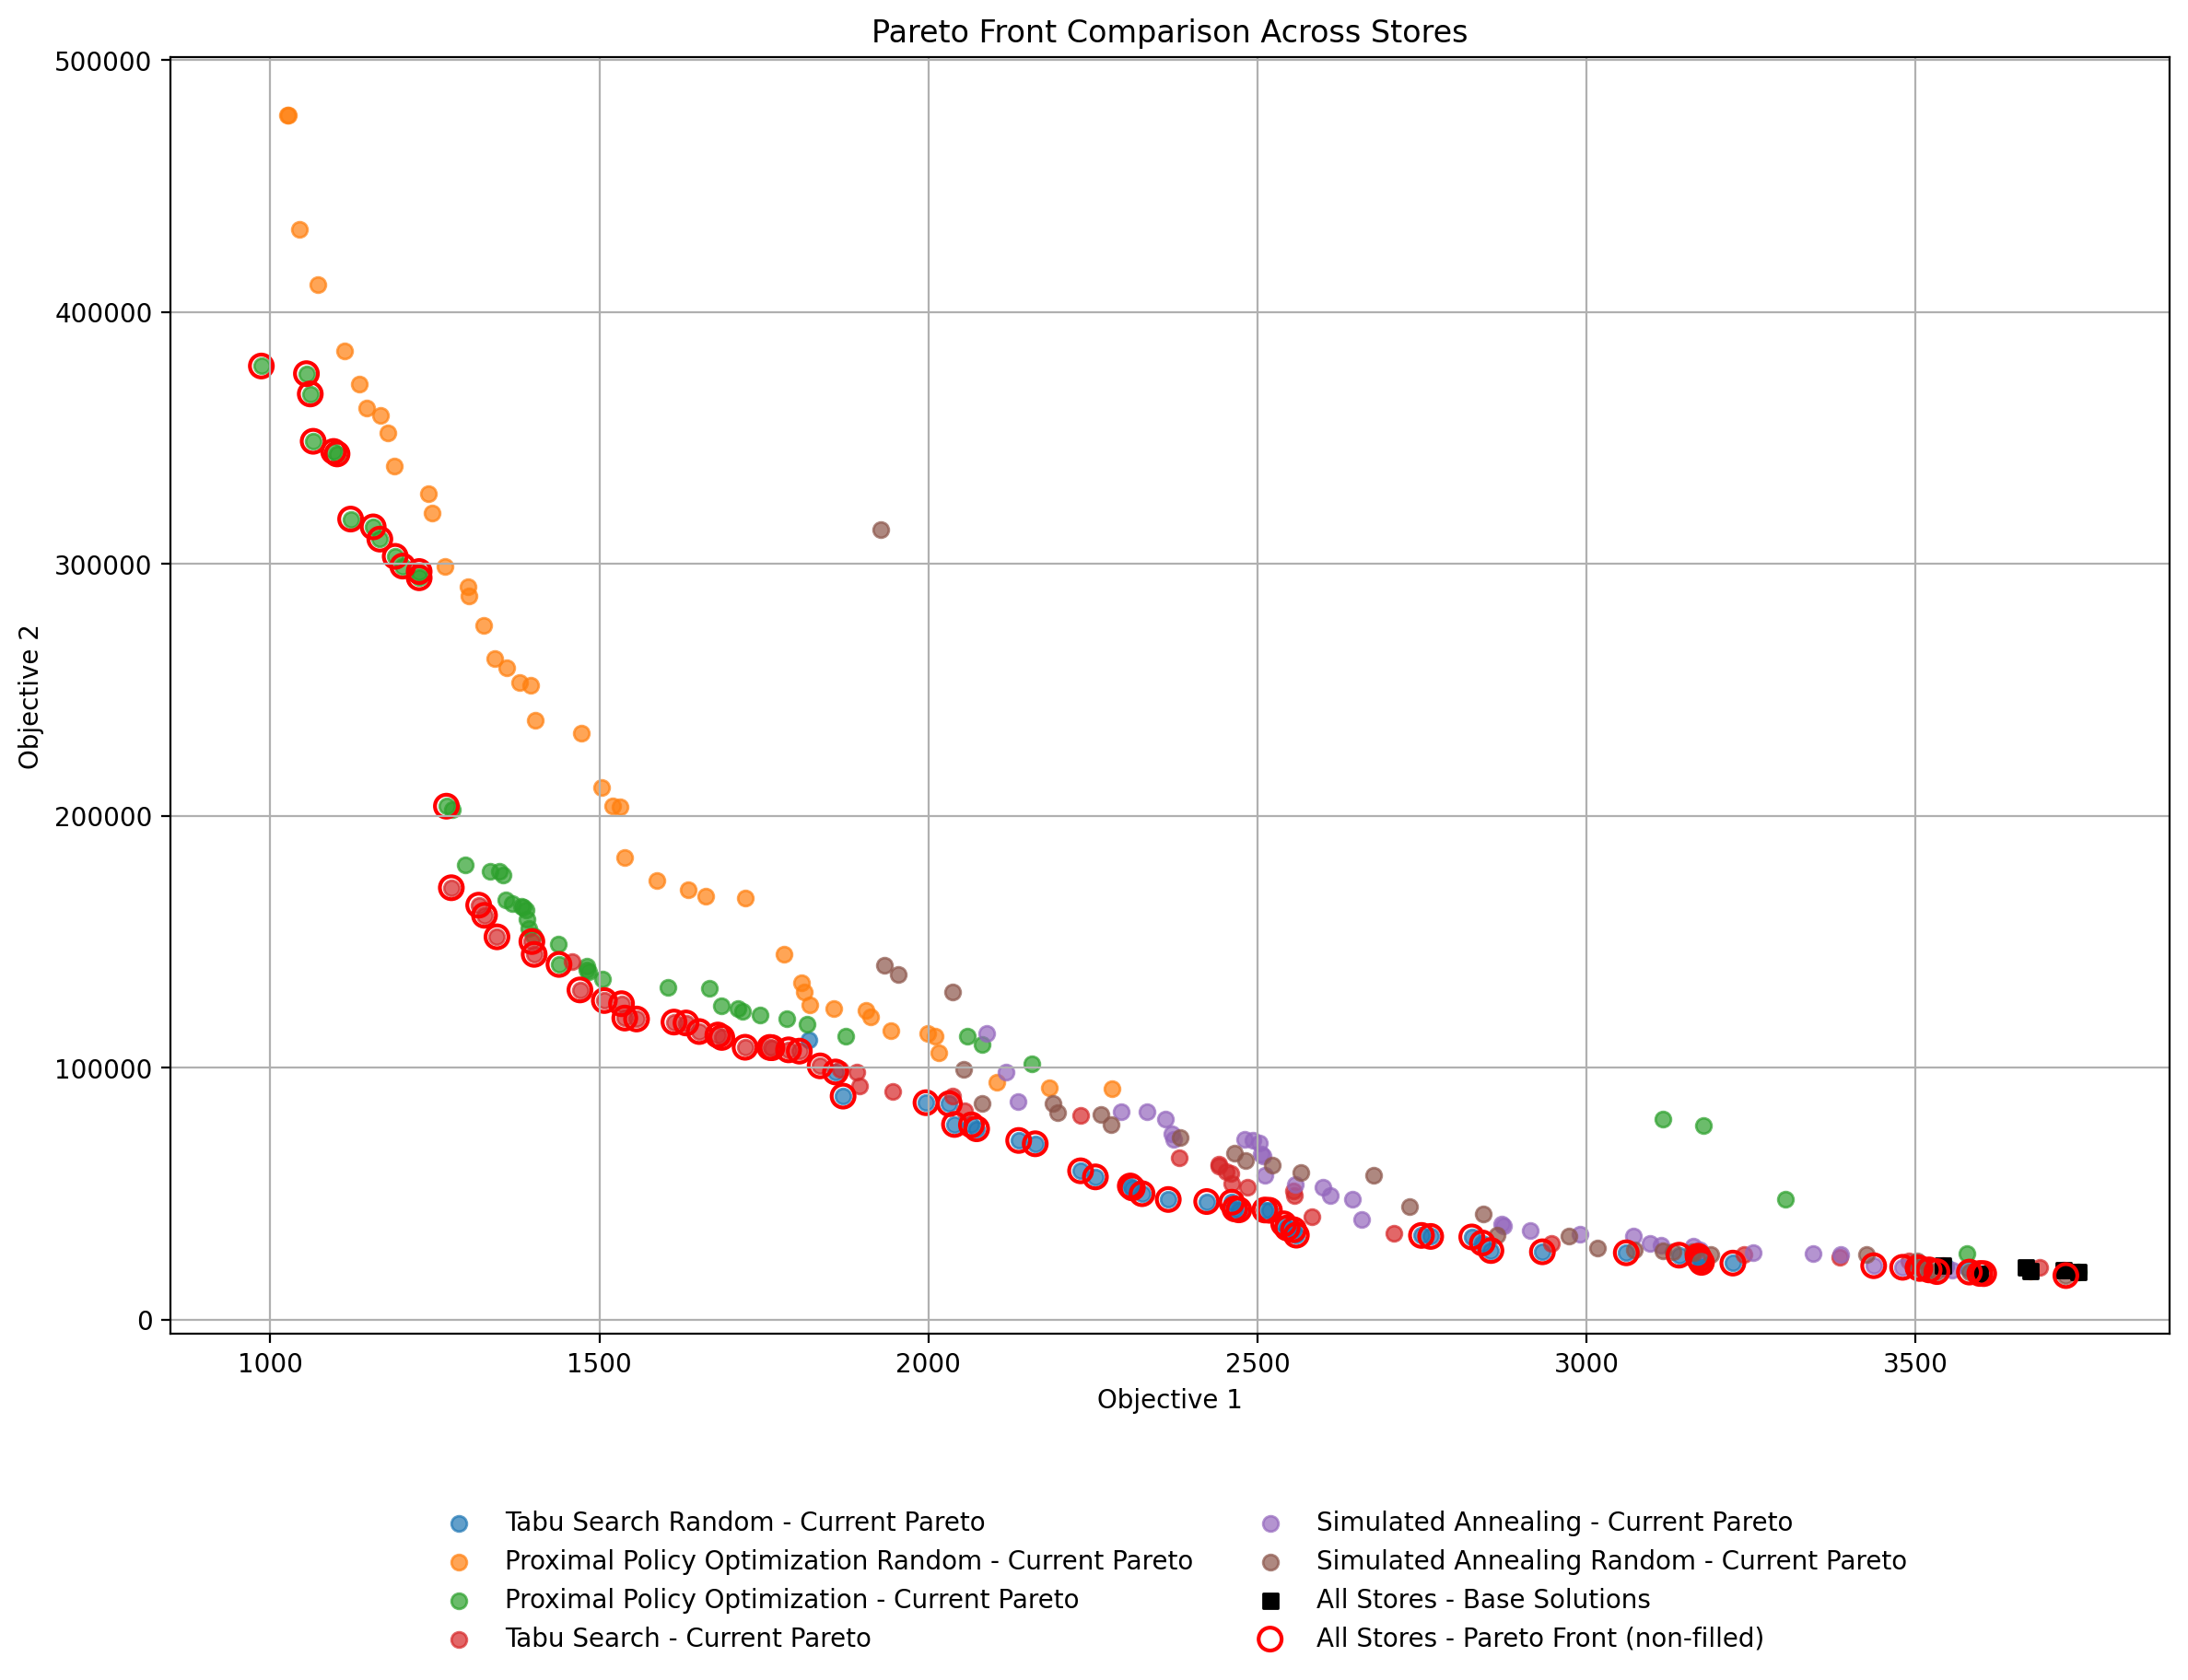

Processing ... Simulated Annealing Random bpi_challenge_2012_mid


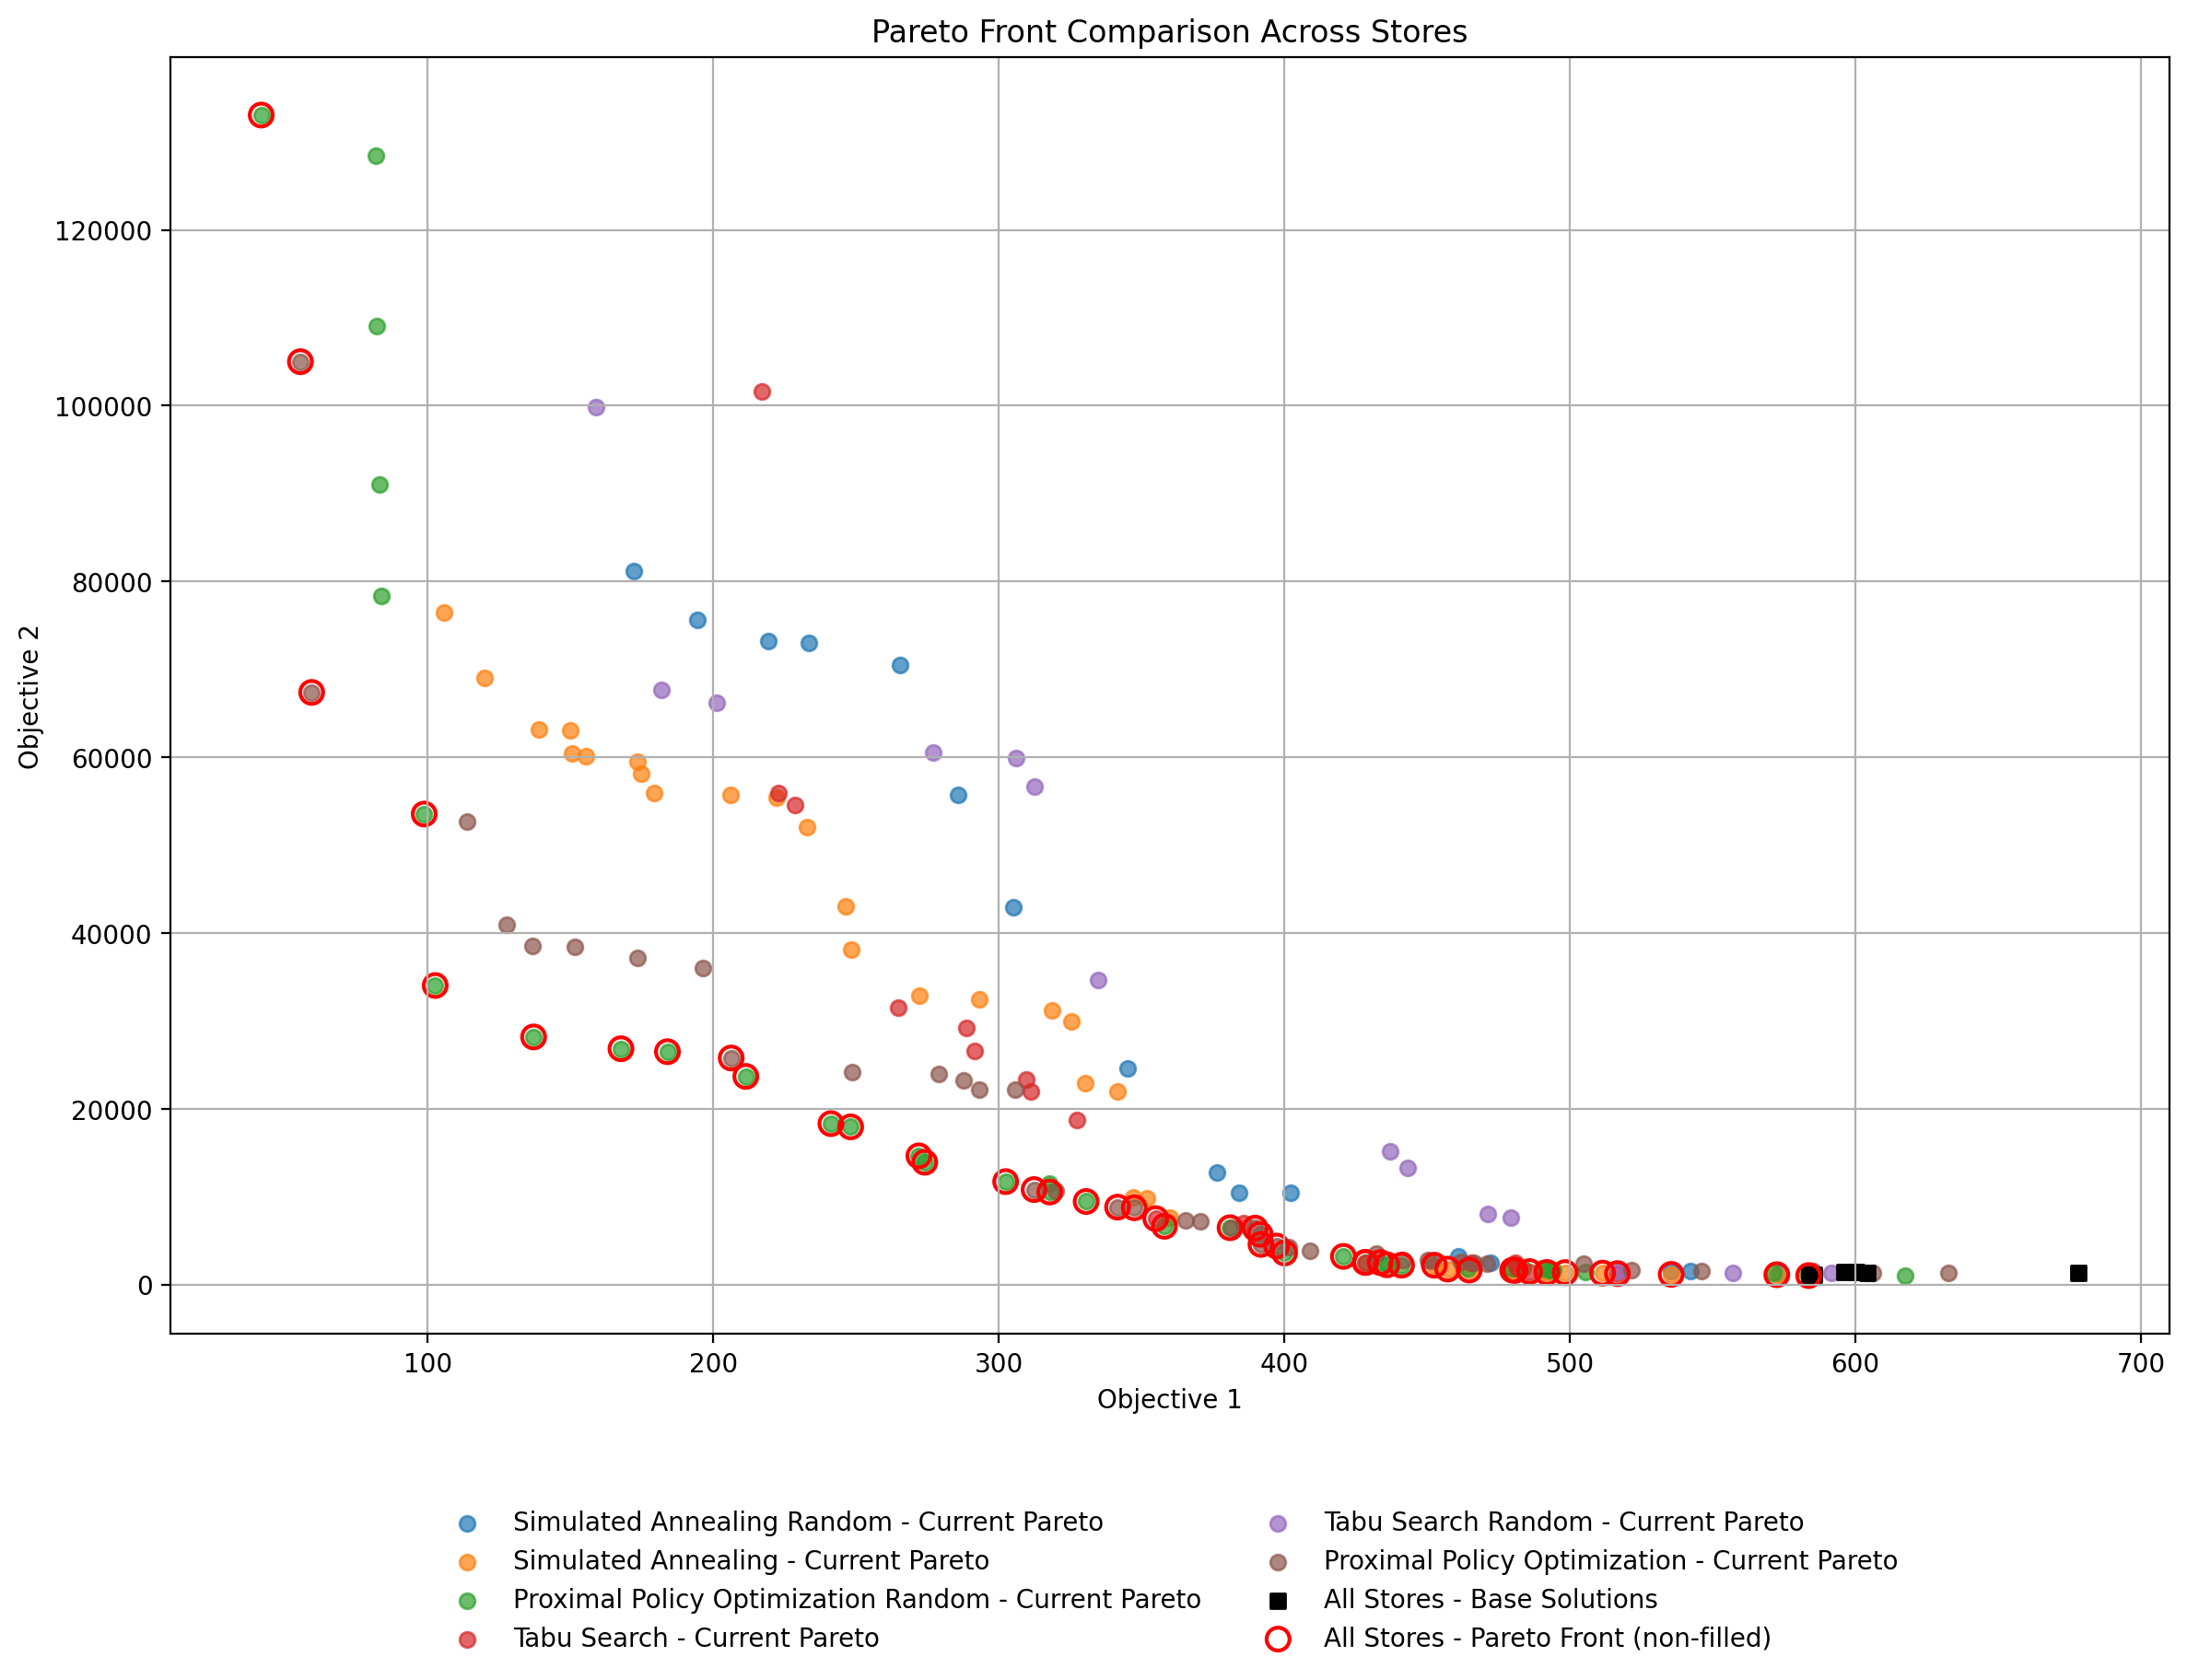

Processing ... Simulated Annealing Random insurance_easy


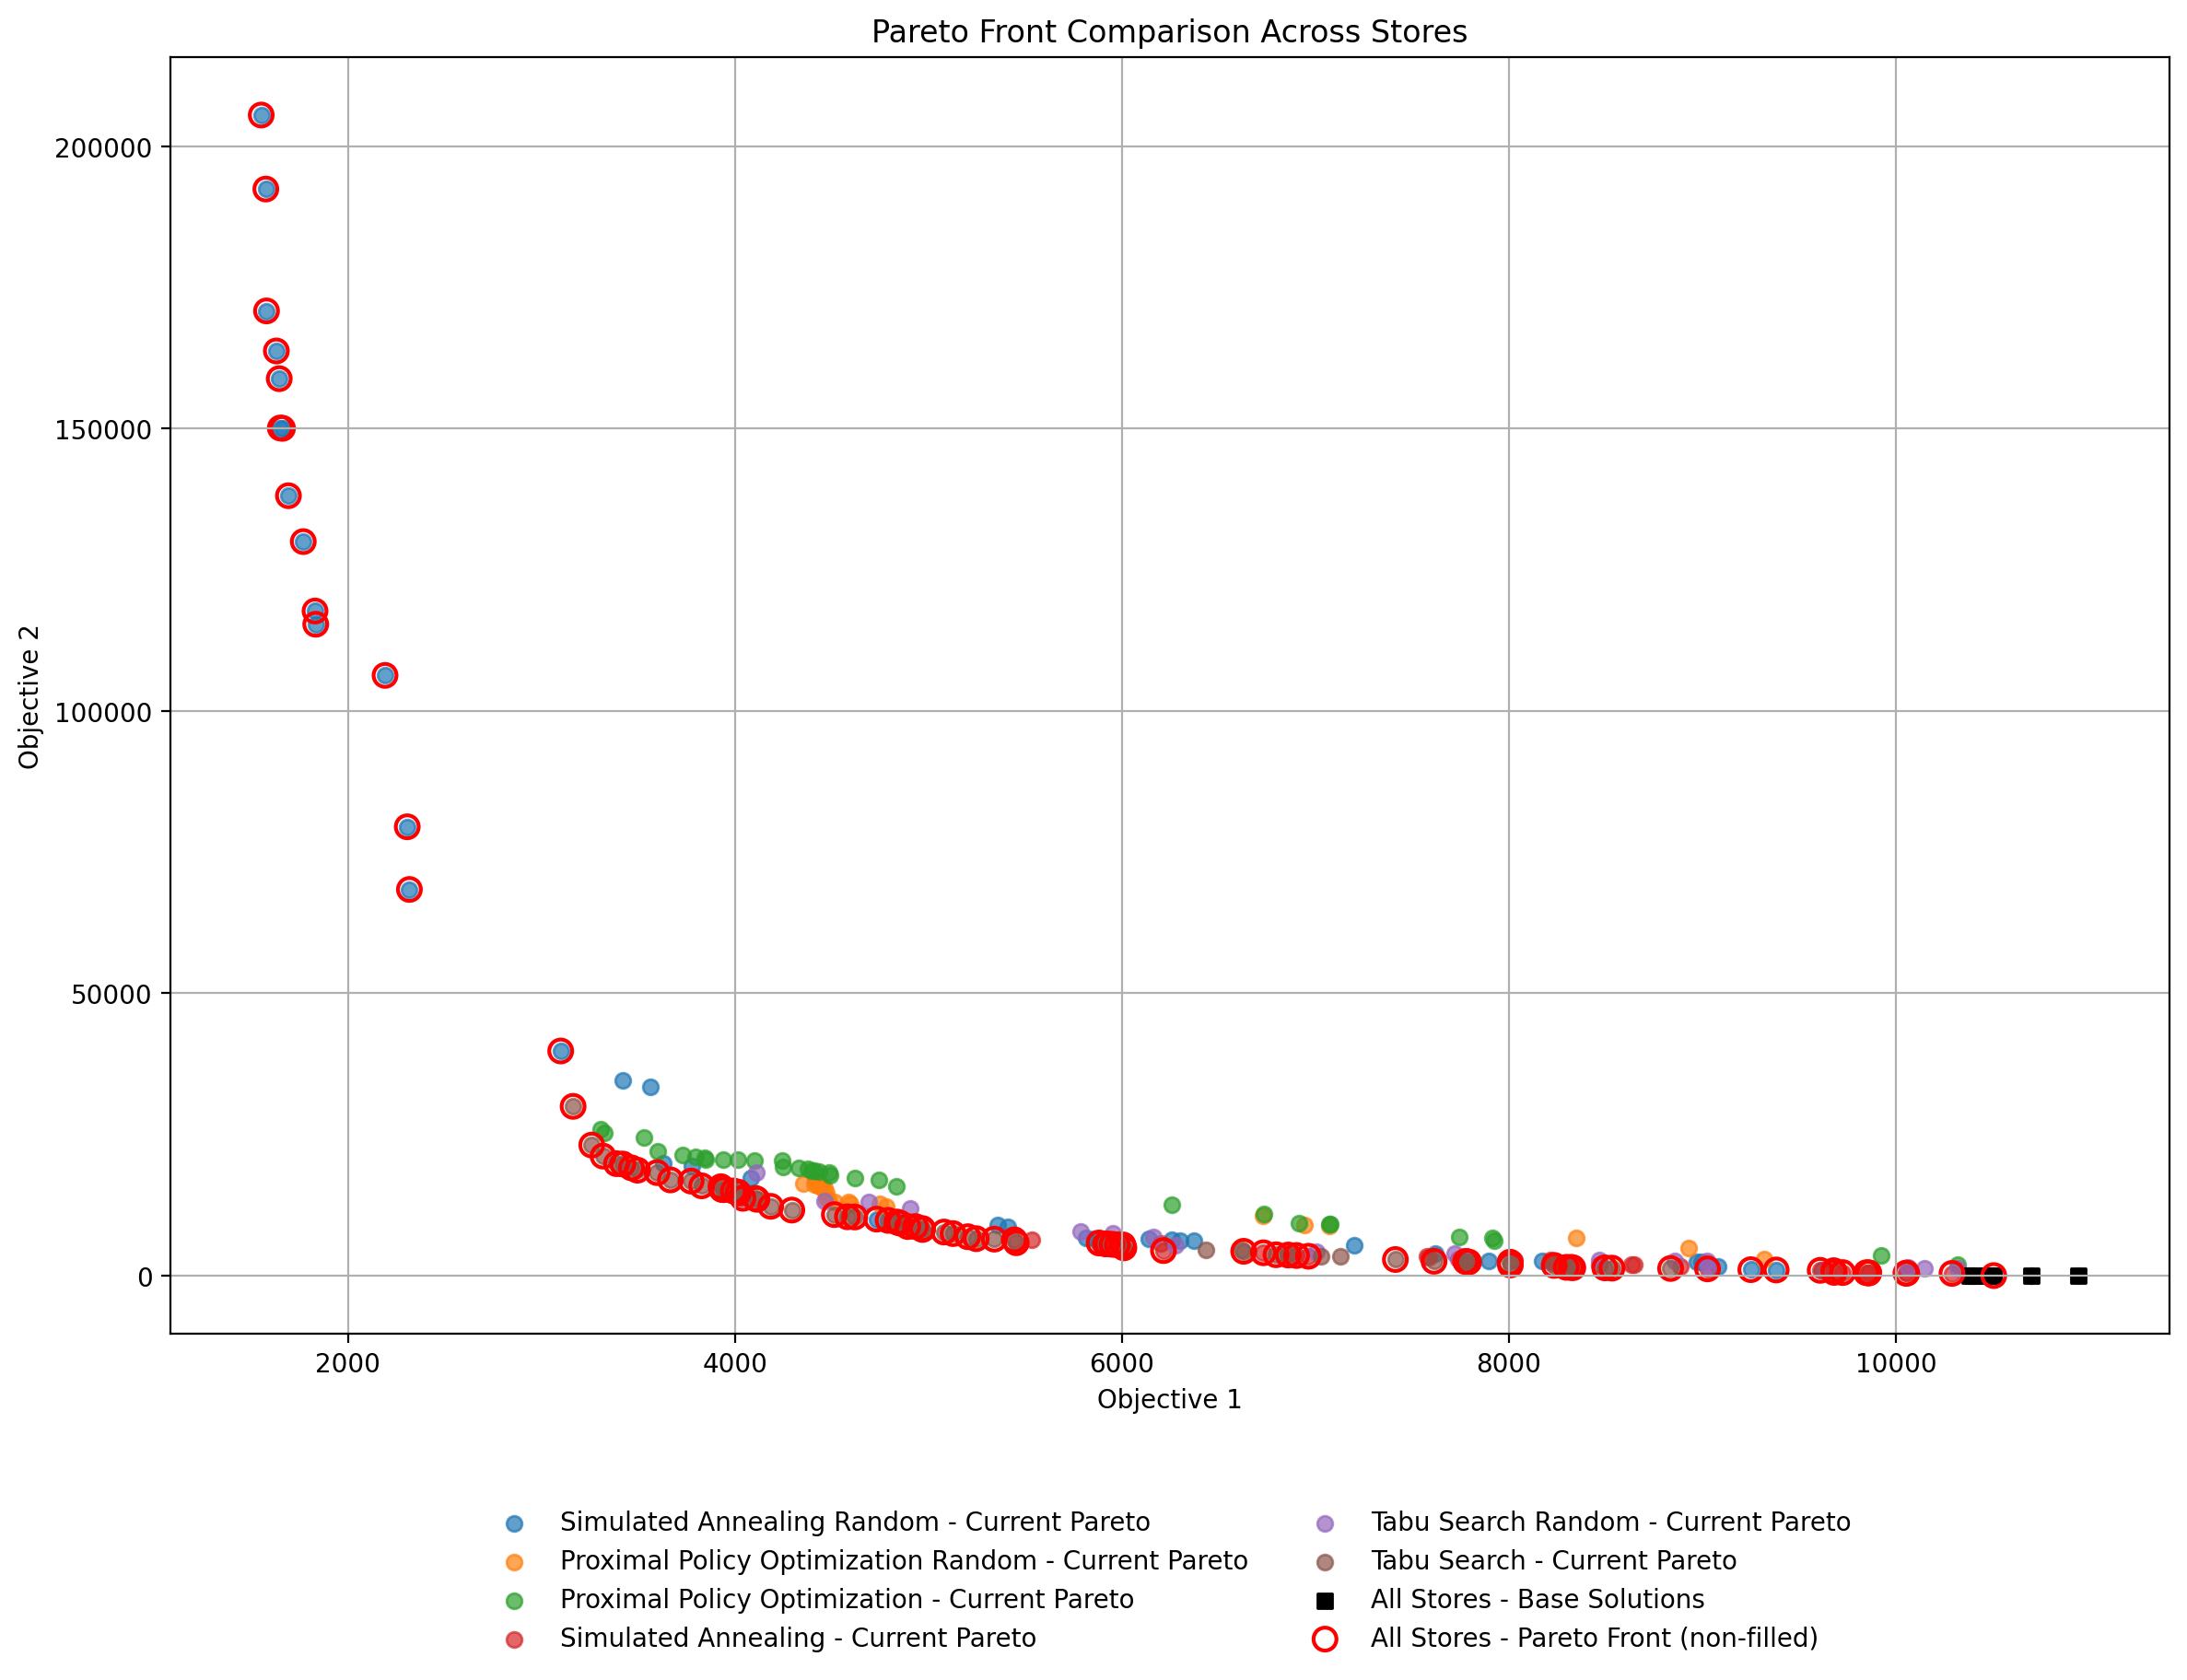

Processing ... Simulated Annealing production_mid


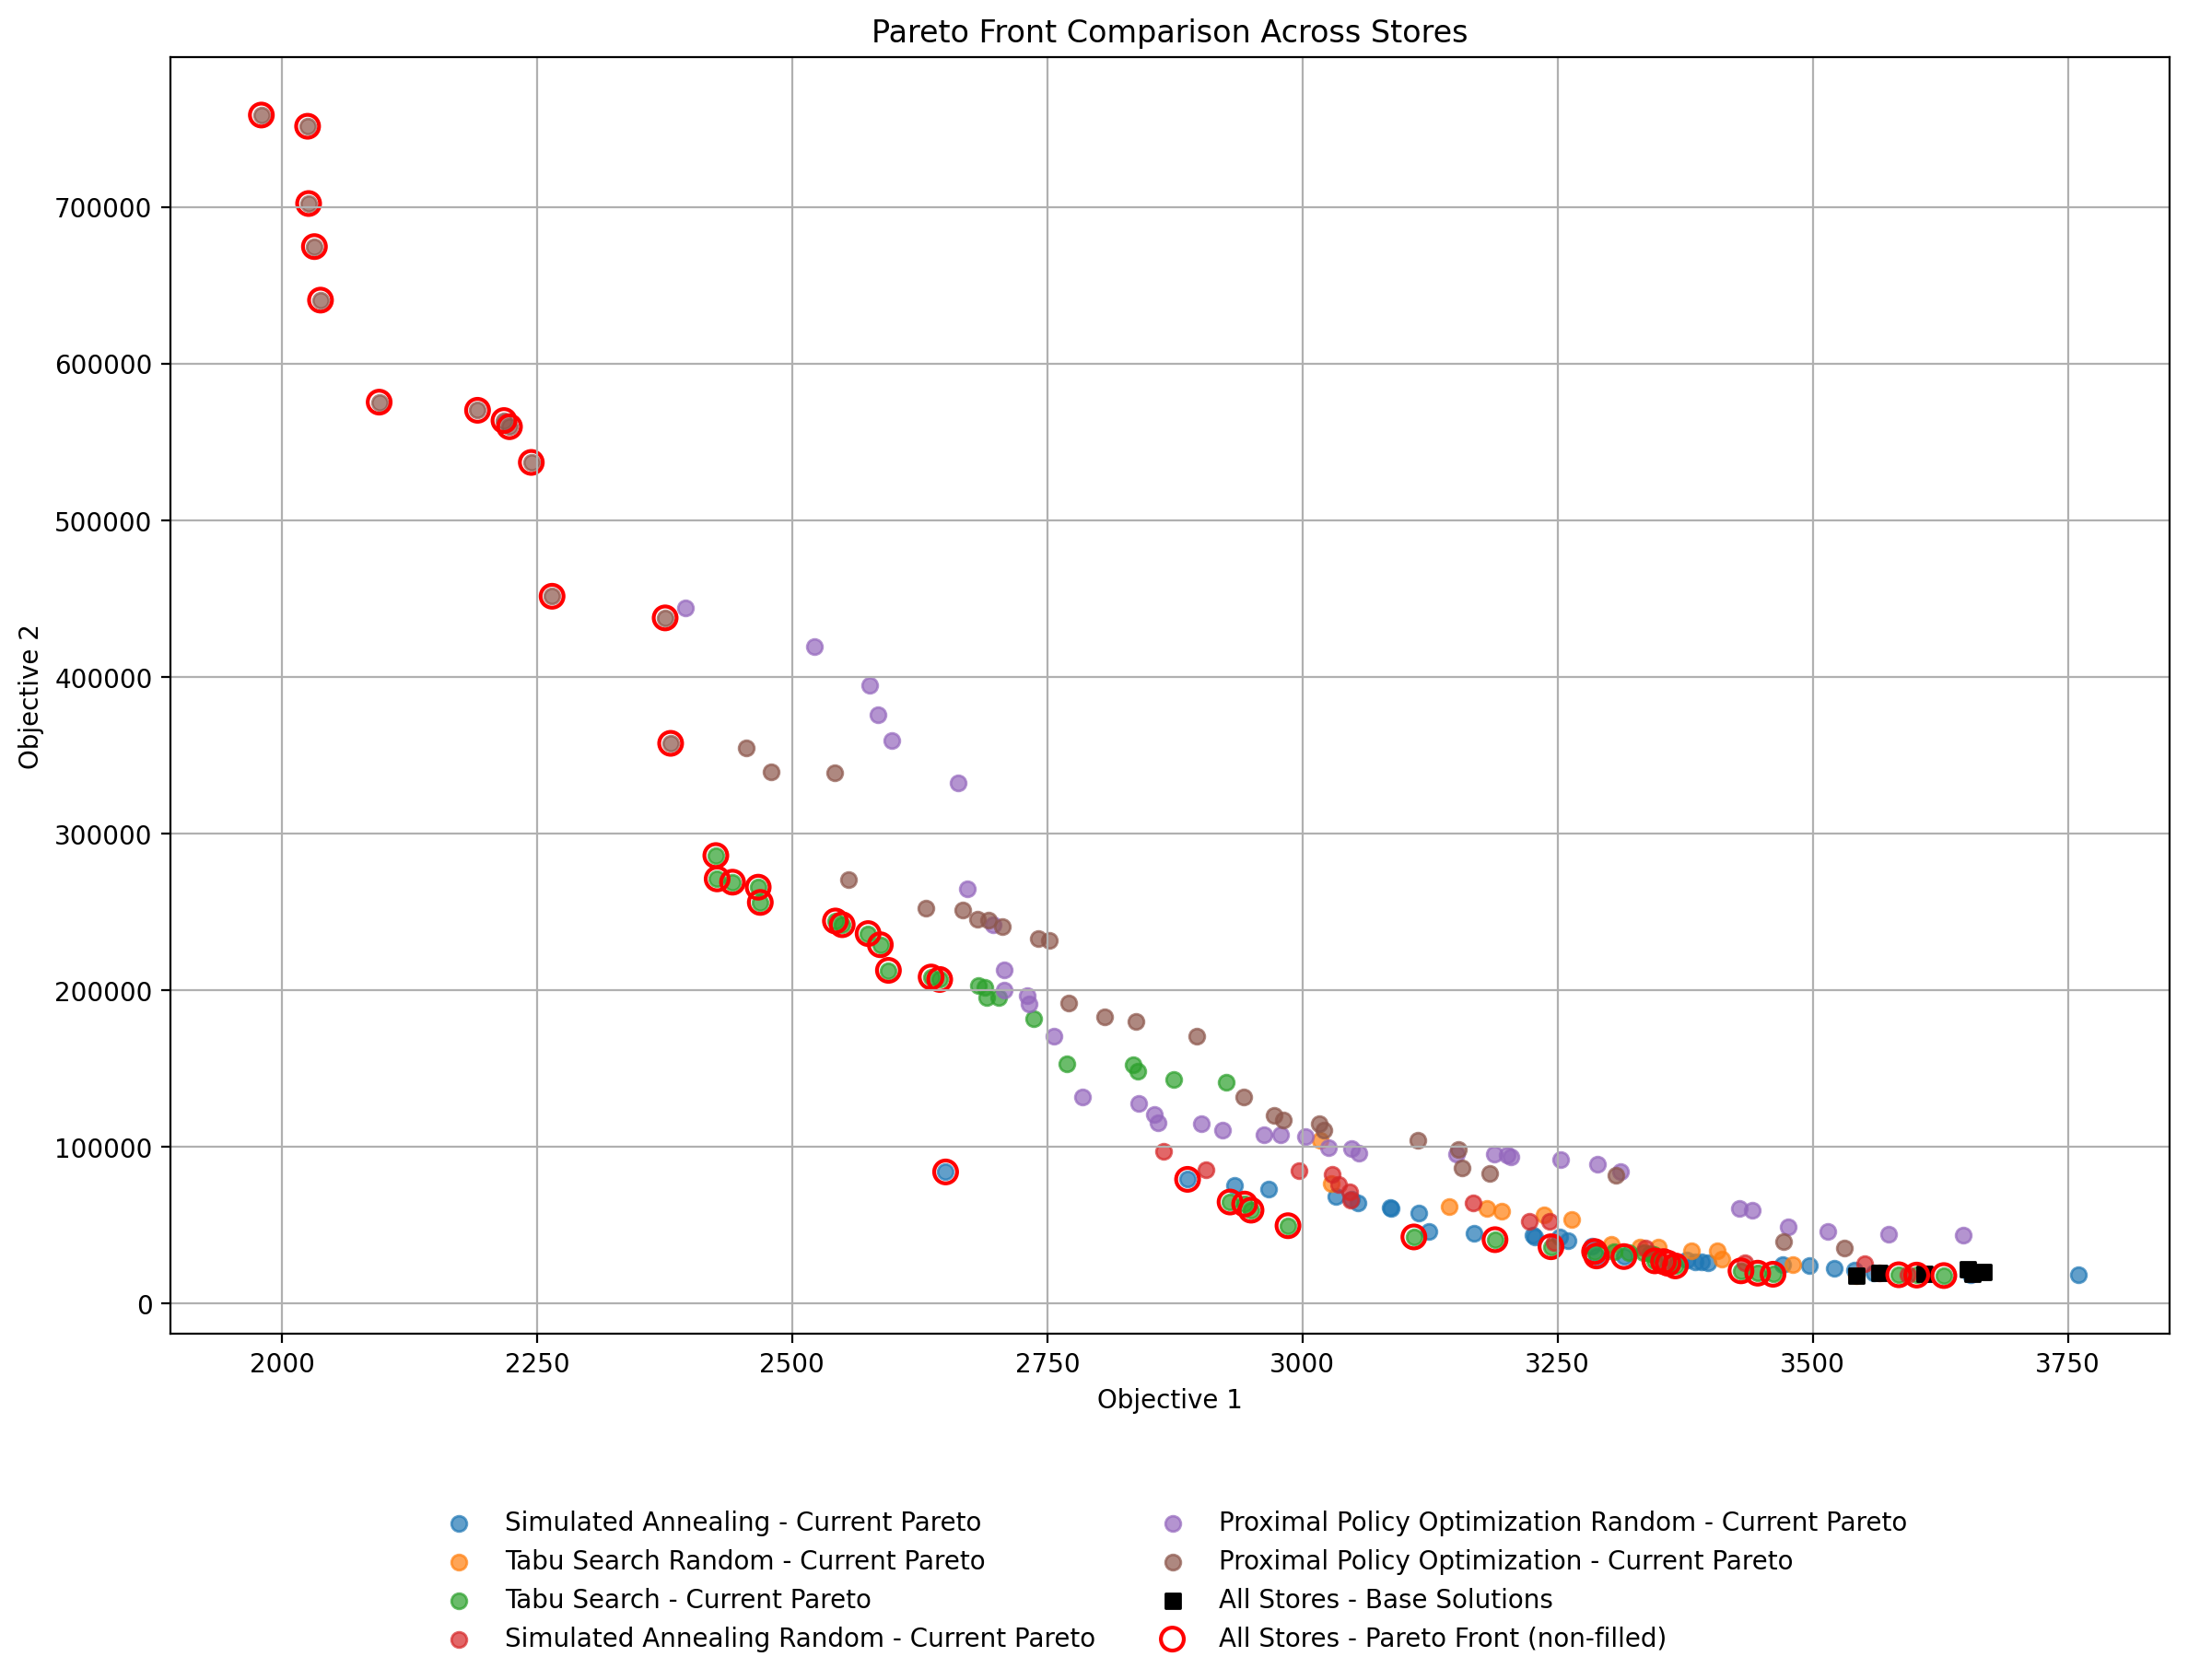

Processing ... Proximal Policy Optimization Random bpi_challenge_2017_easy


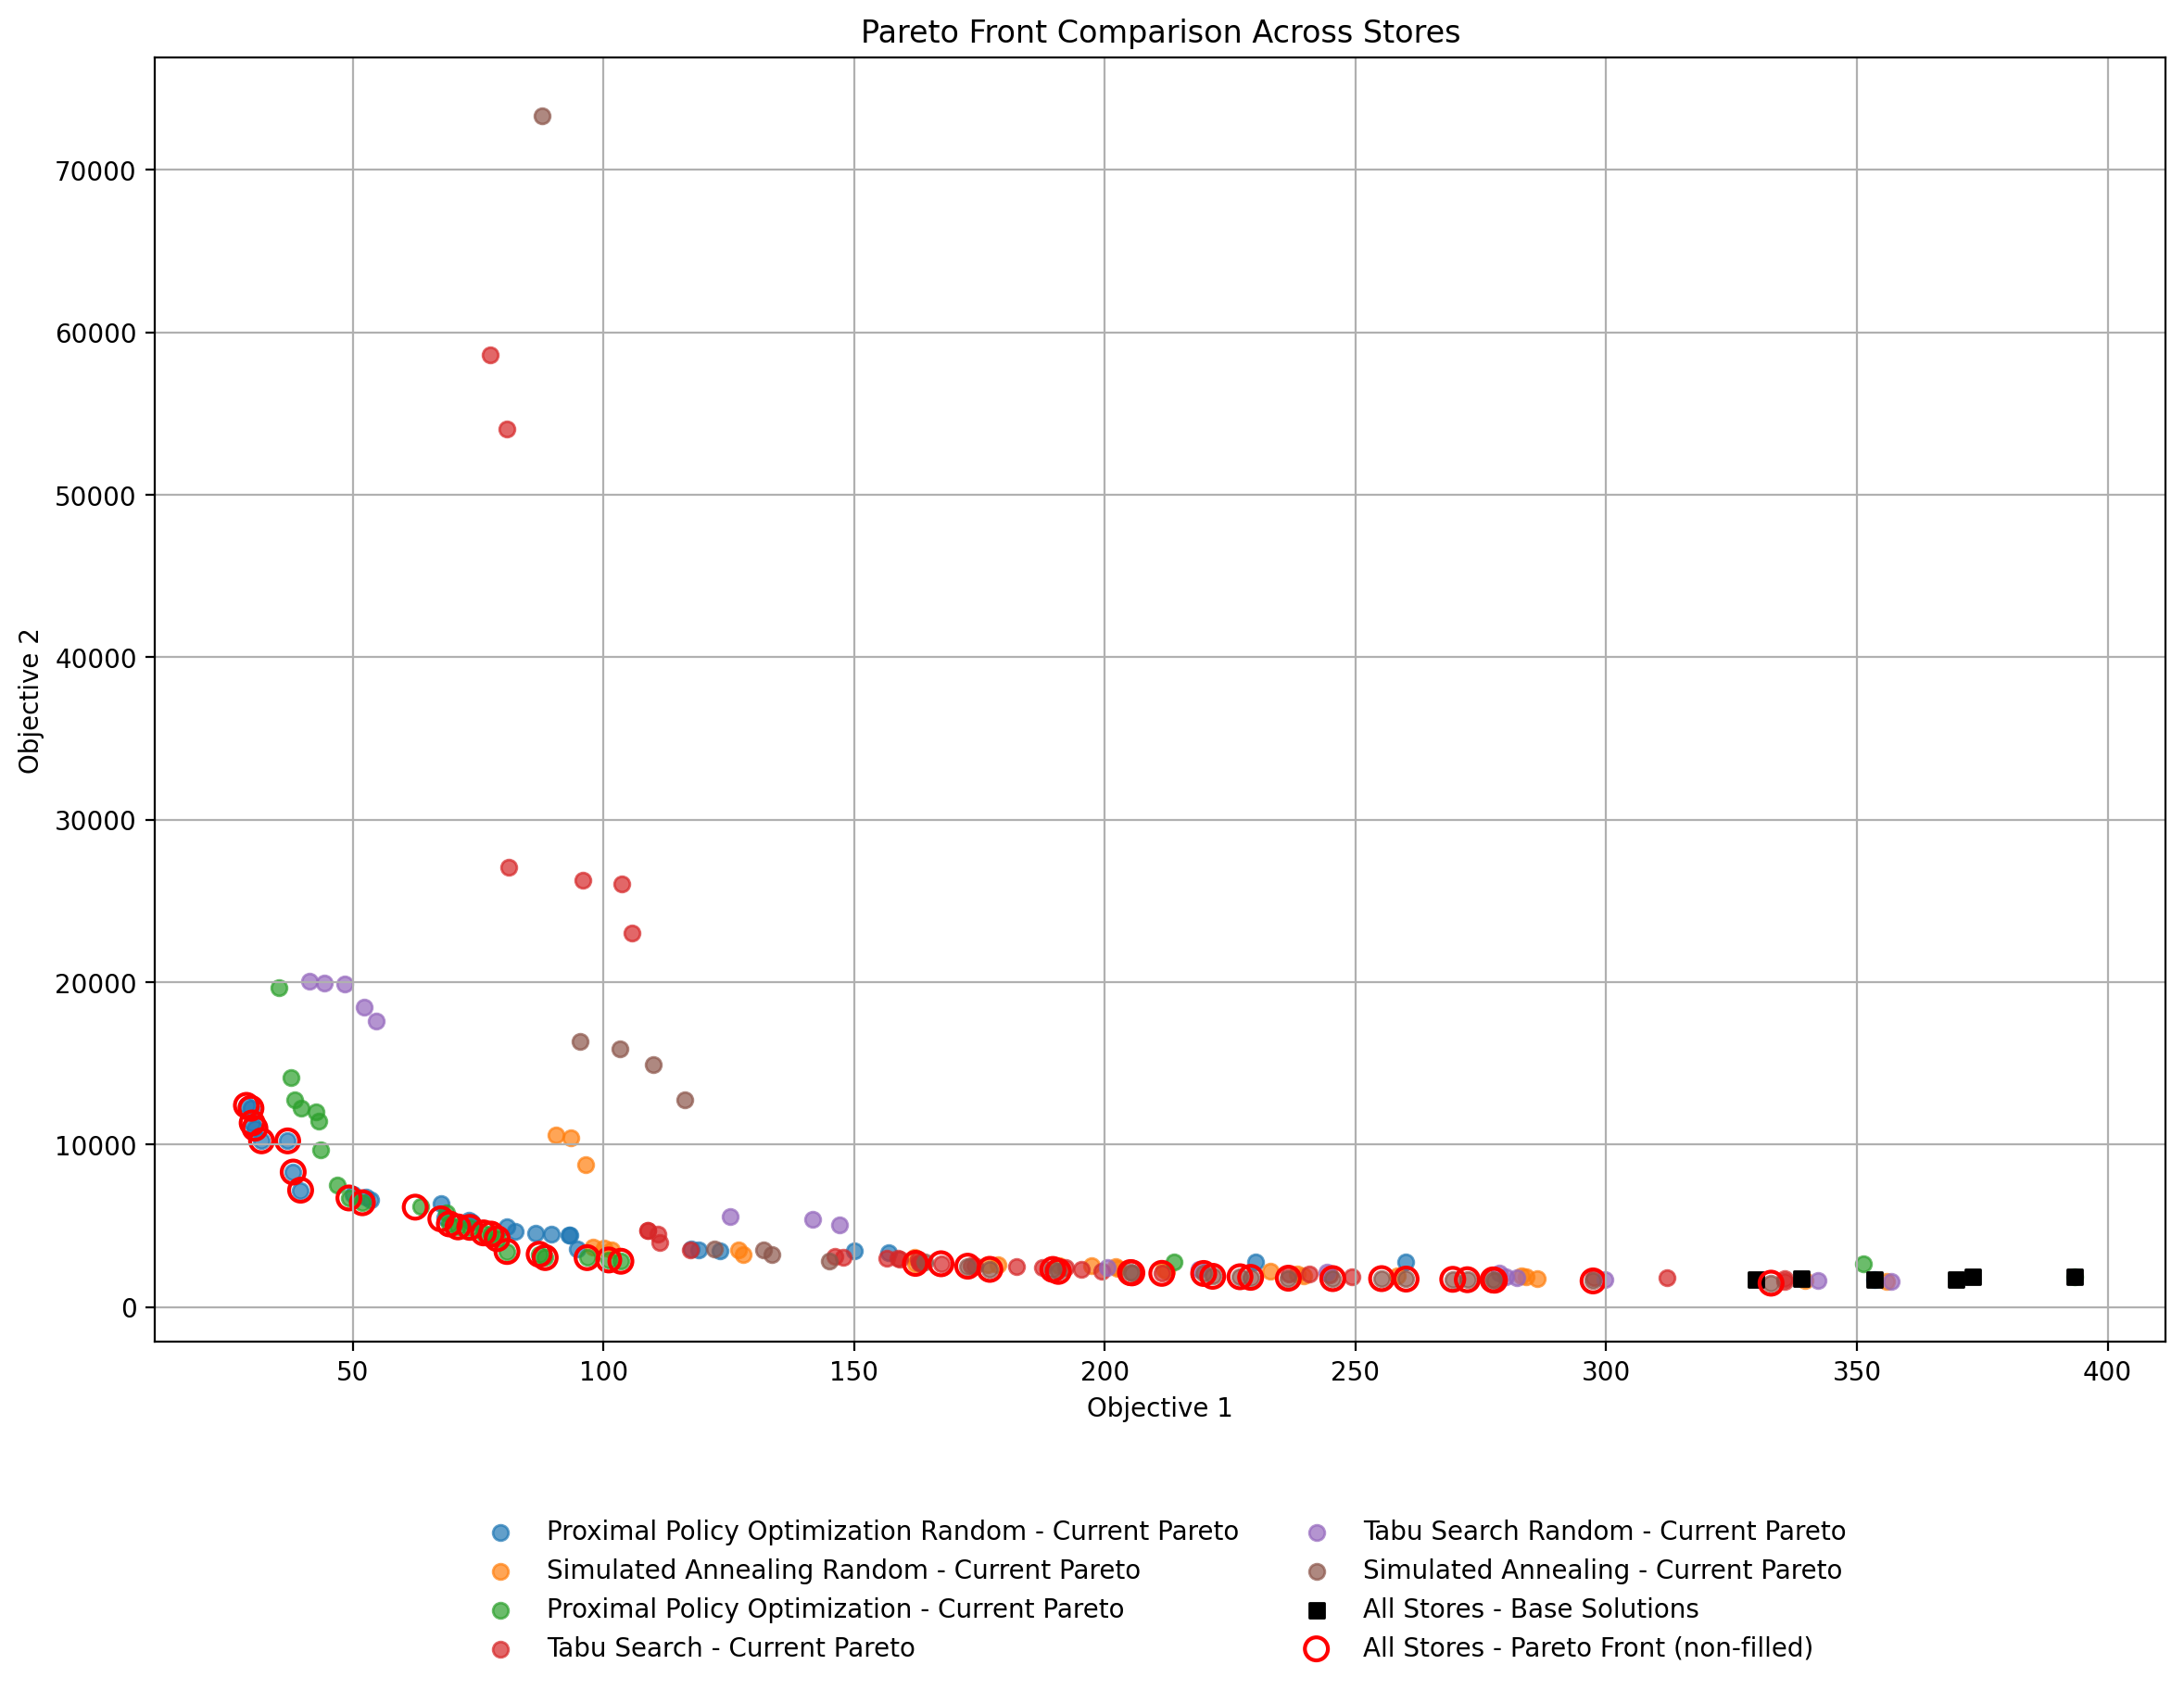

Processing ... Proximal Policy Optimization consulta_data_mining_hard


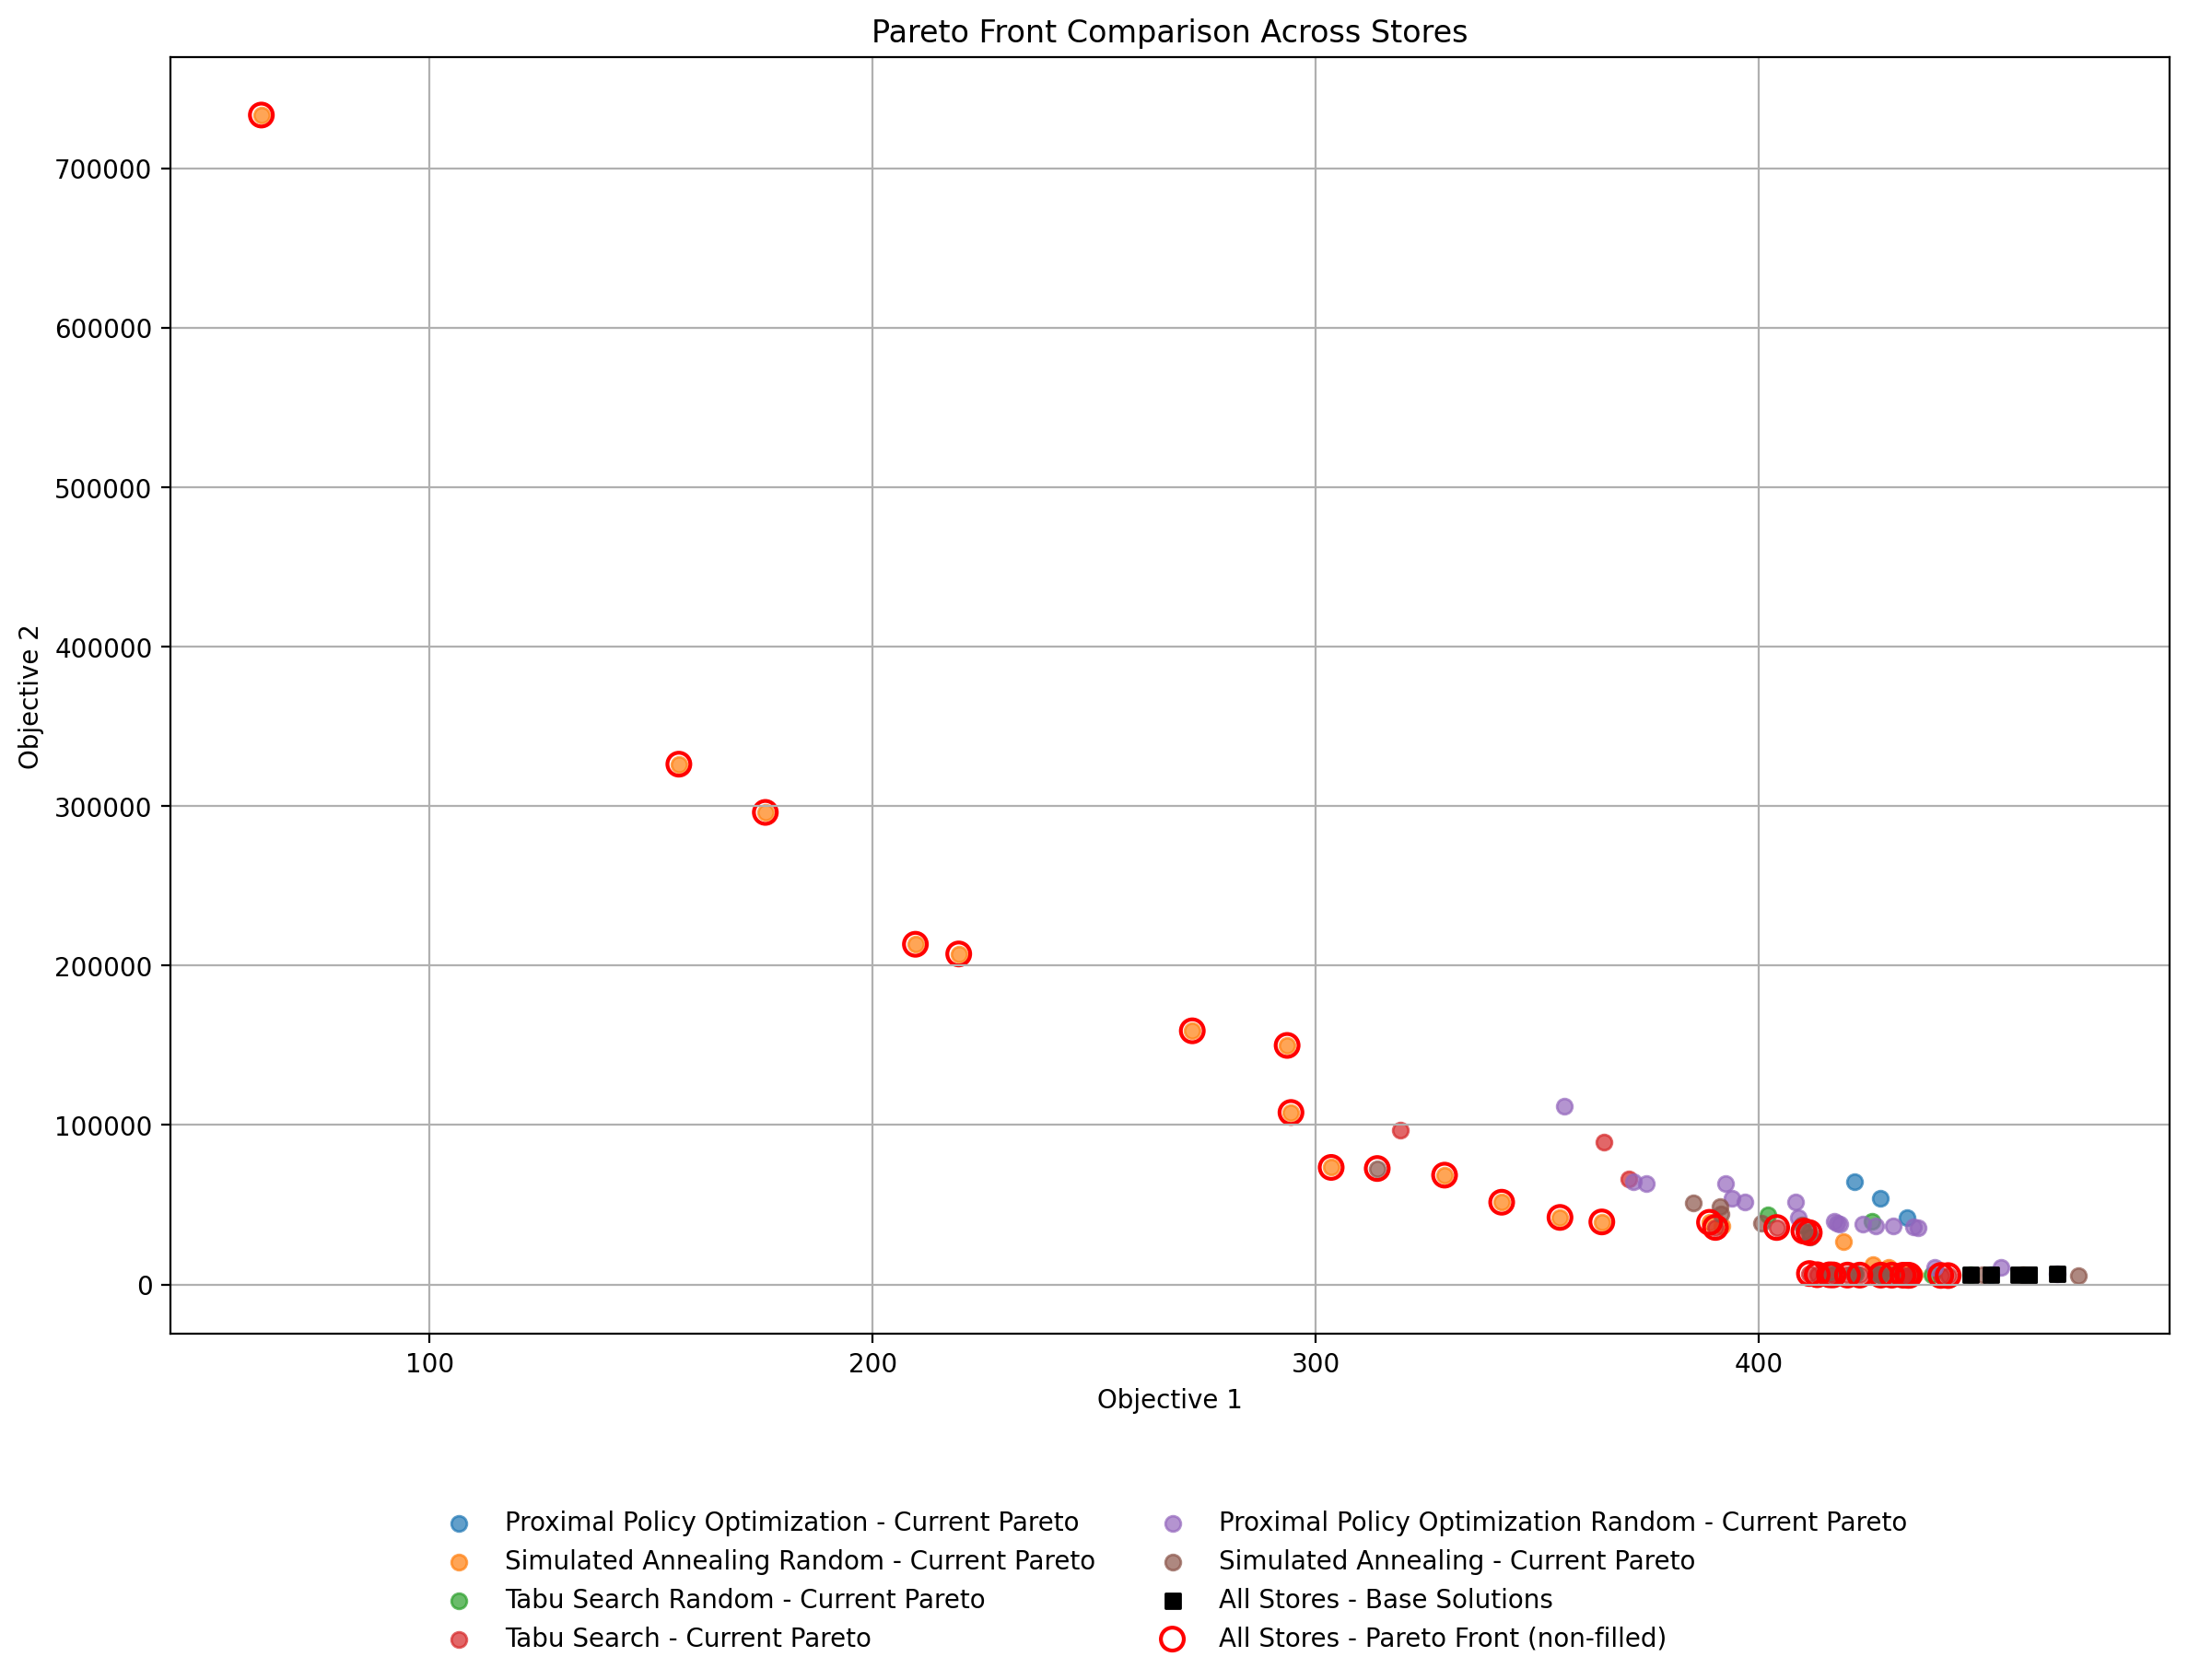

Processing ... Tabu Search bpi_challenge_2017_hard


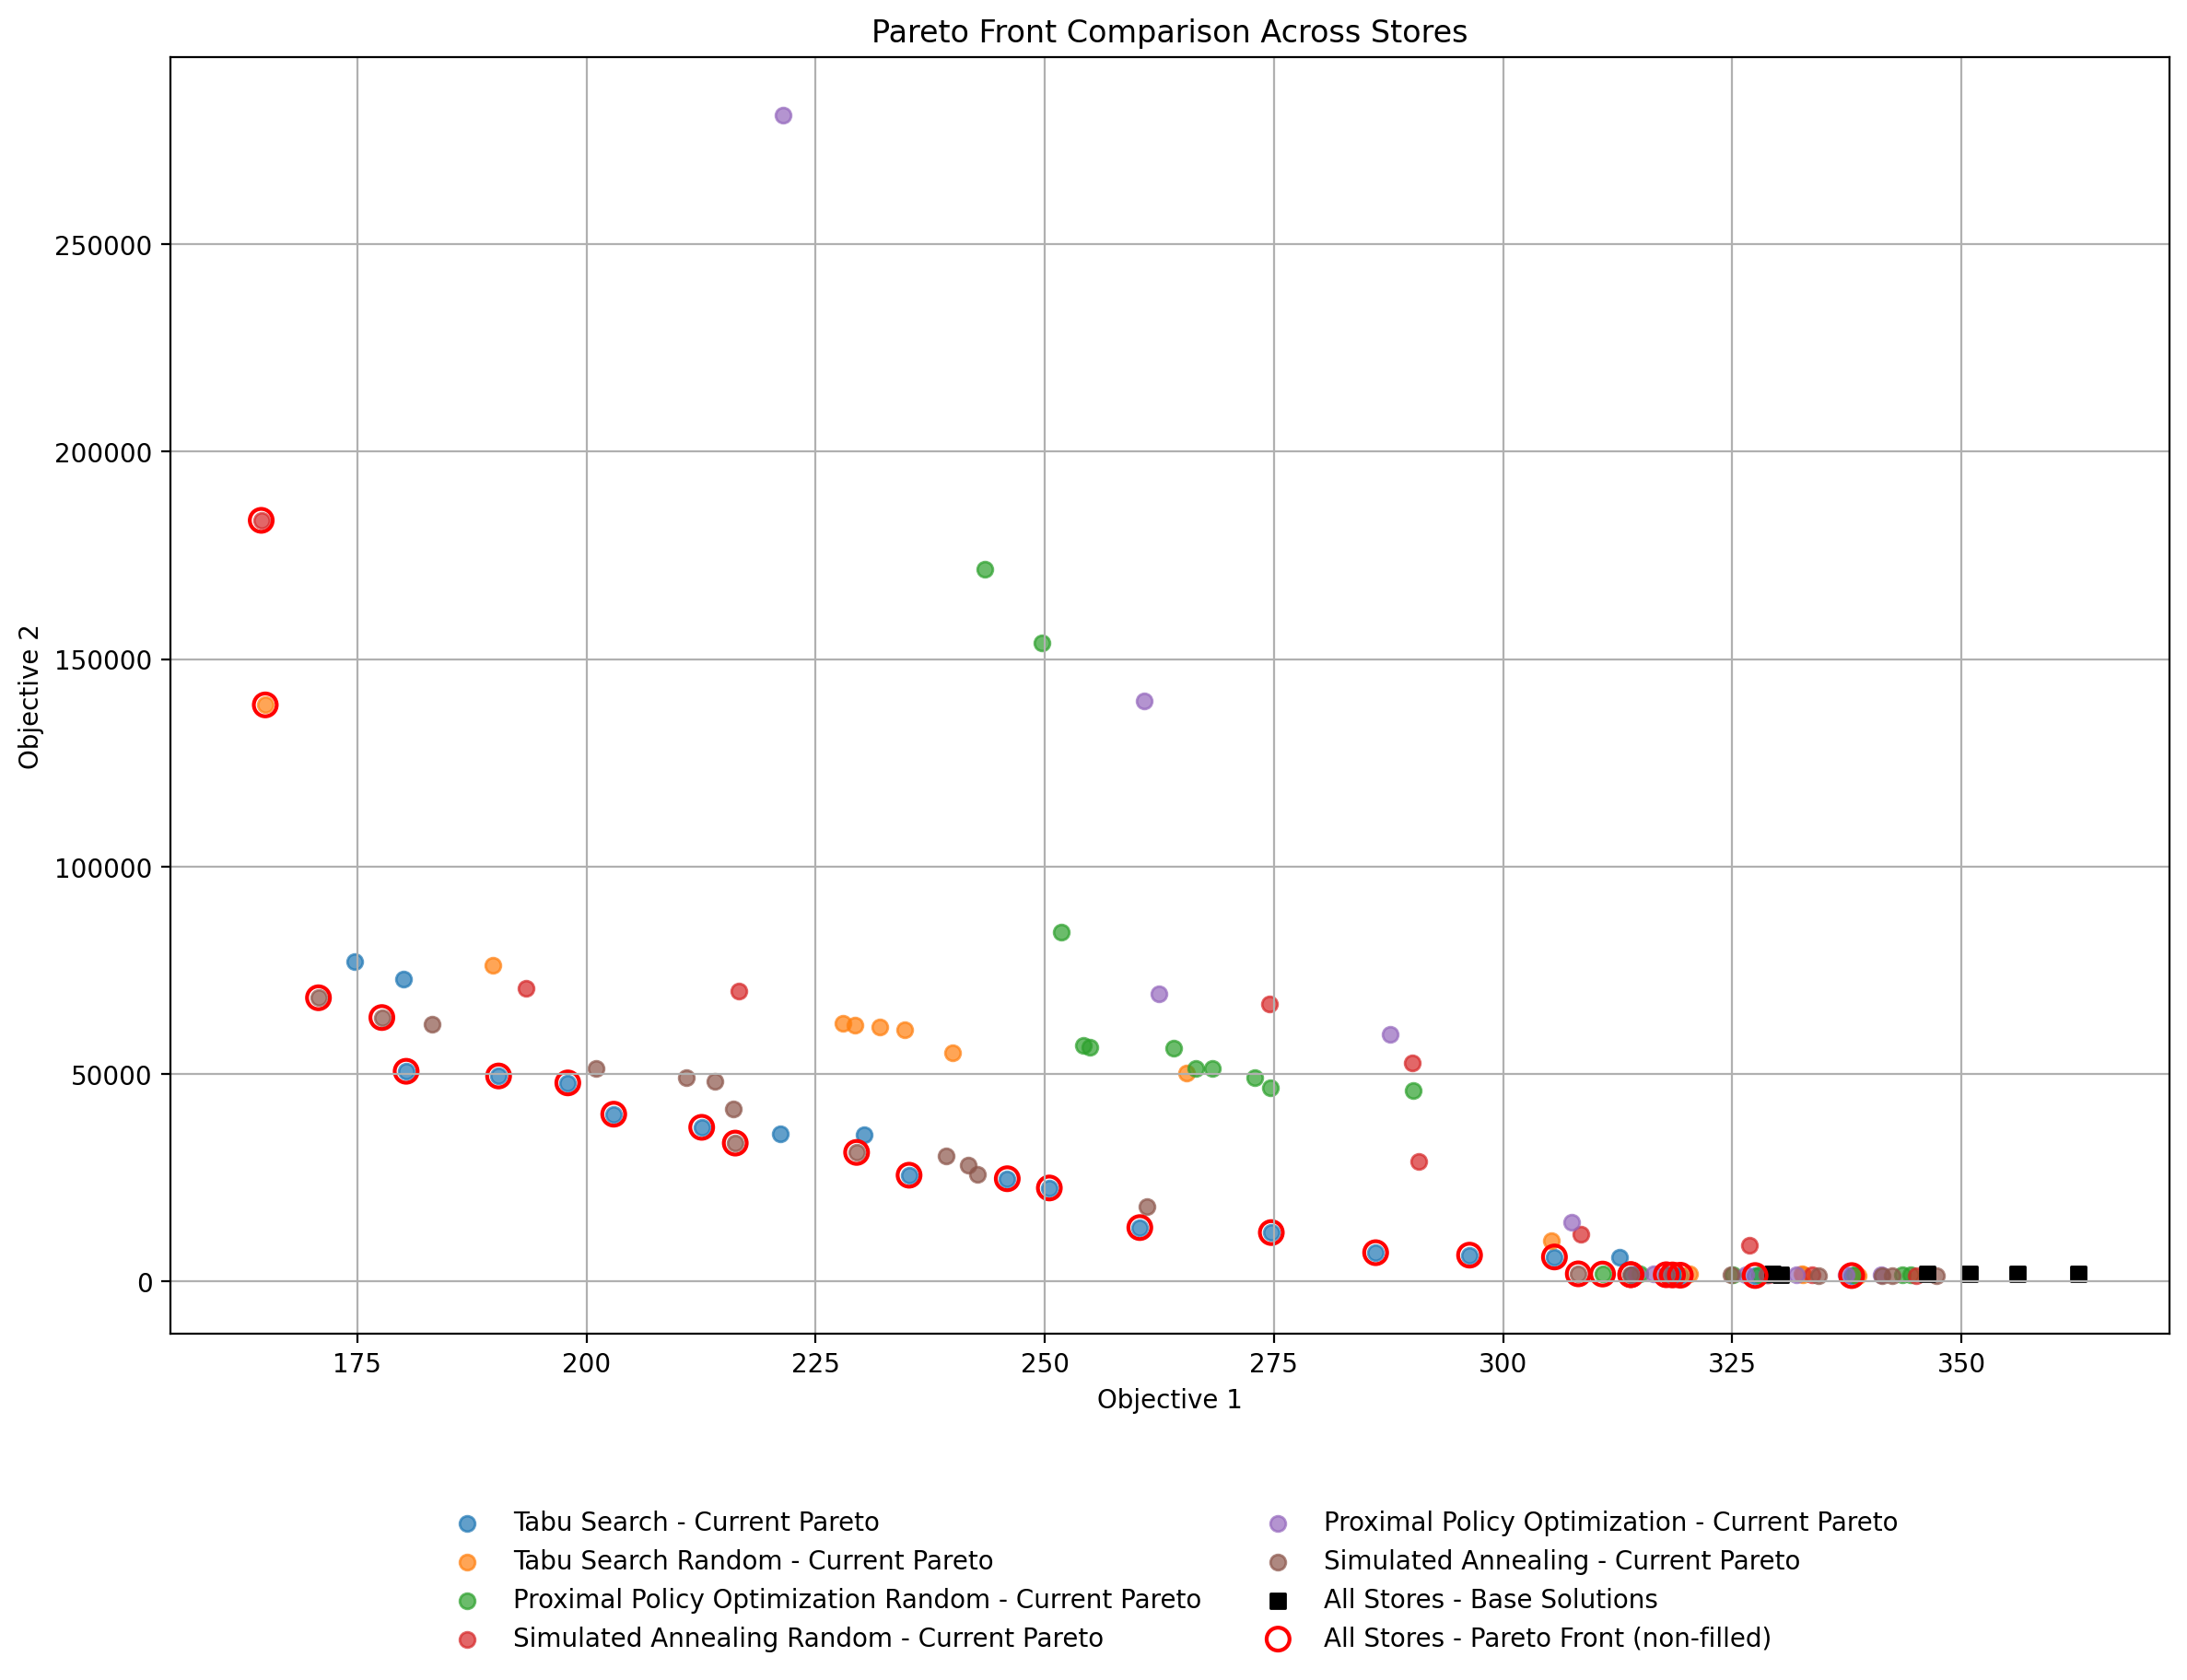

Processing ... Proximal Policy Optimization callcentre_easy


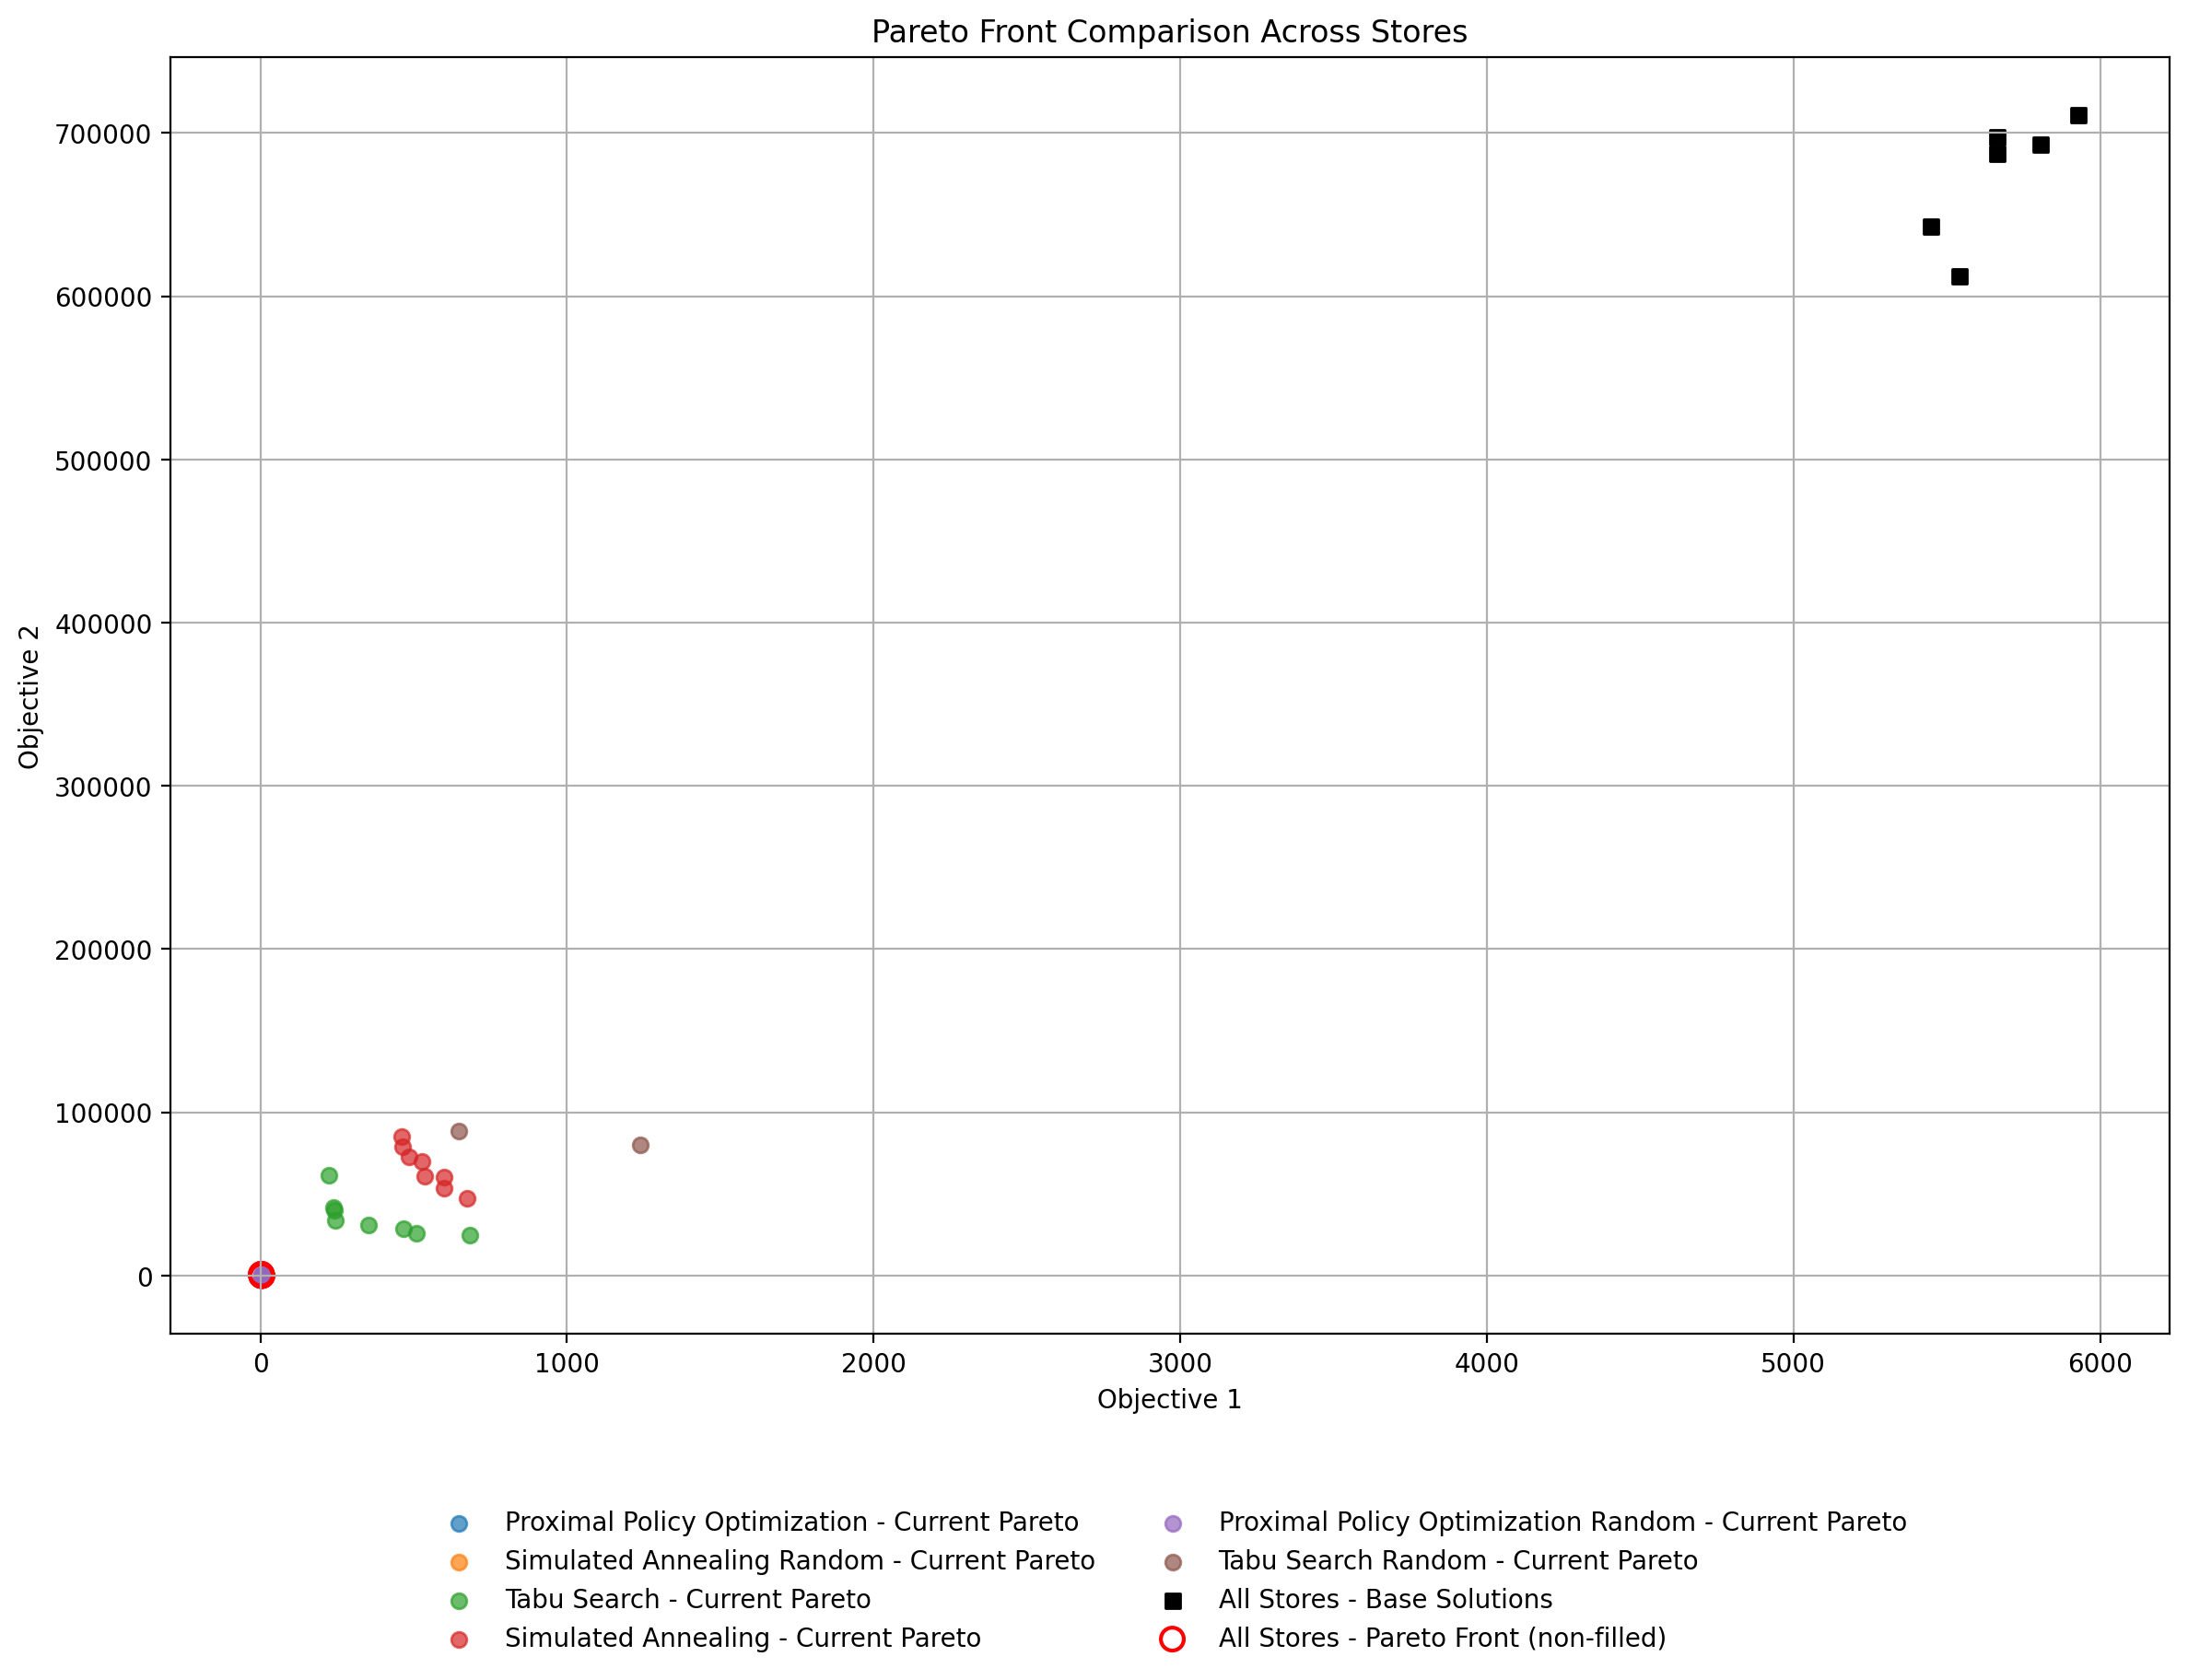

Processing ... Proximal Policy Optimization bpi_challenge_2017_mid


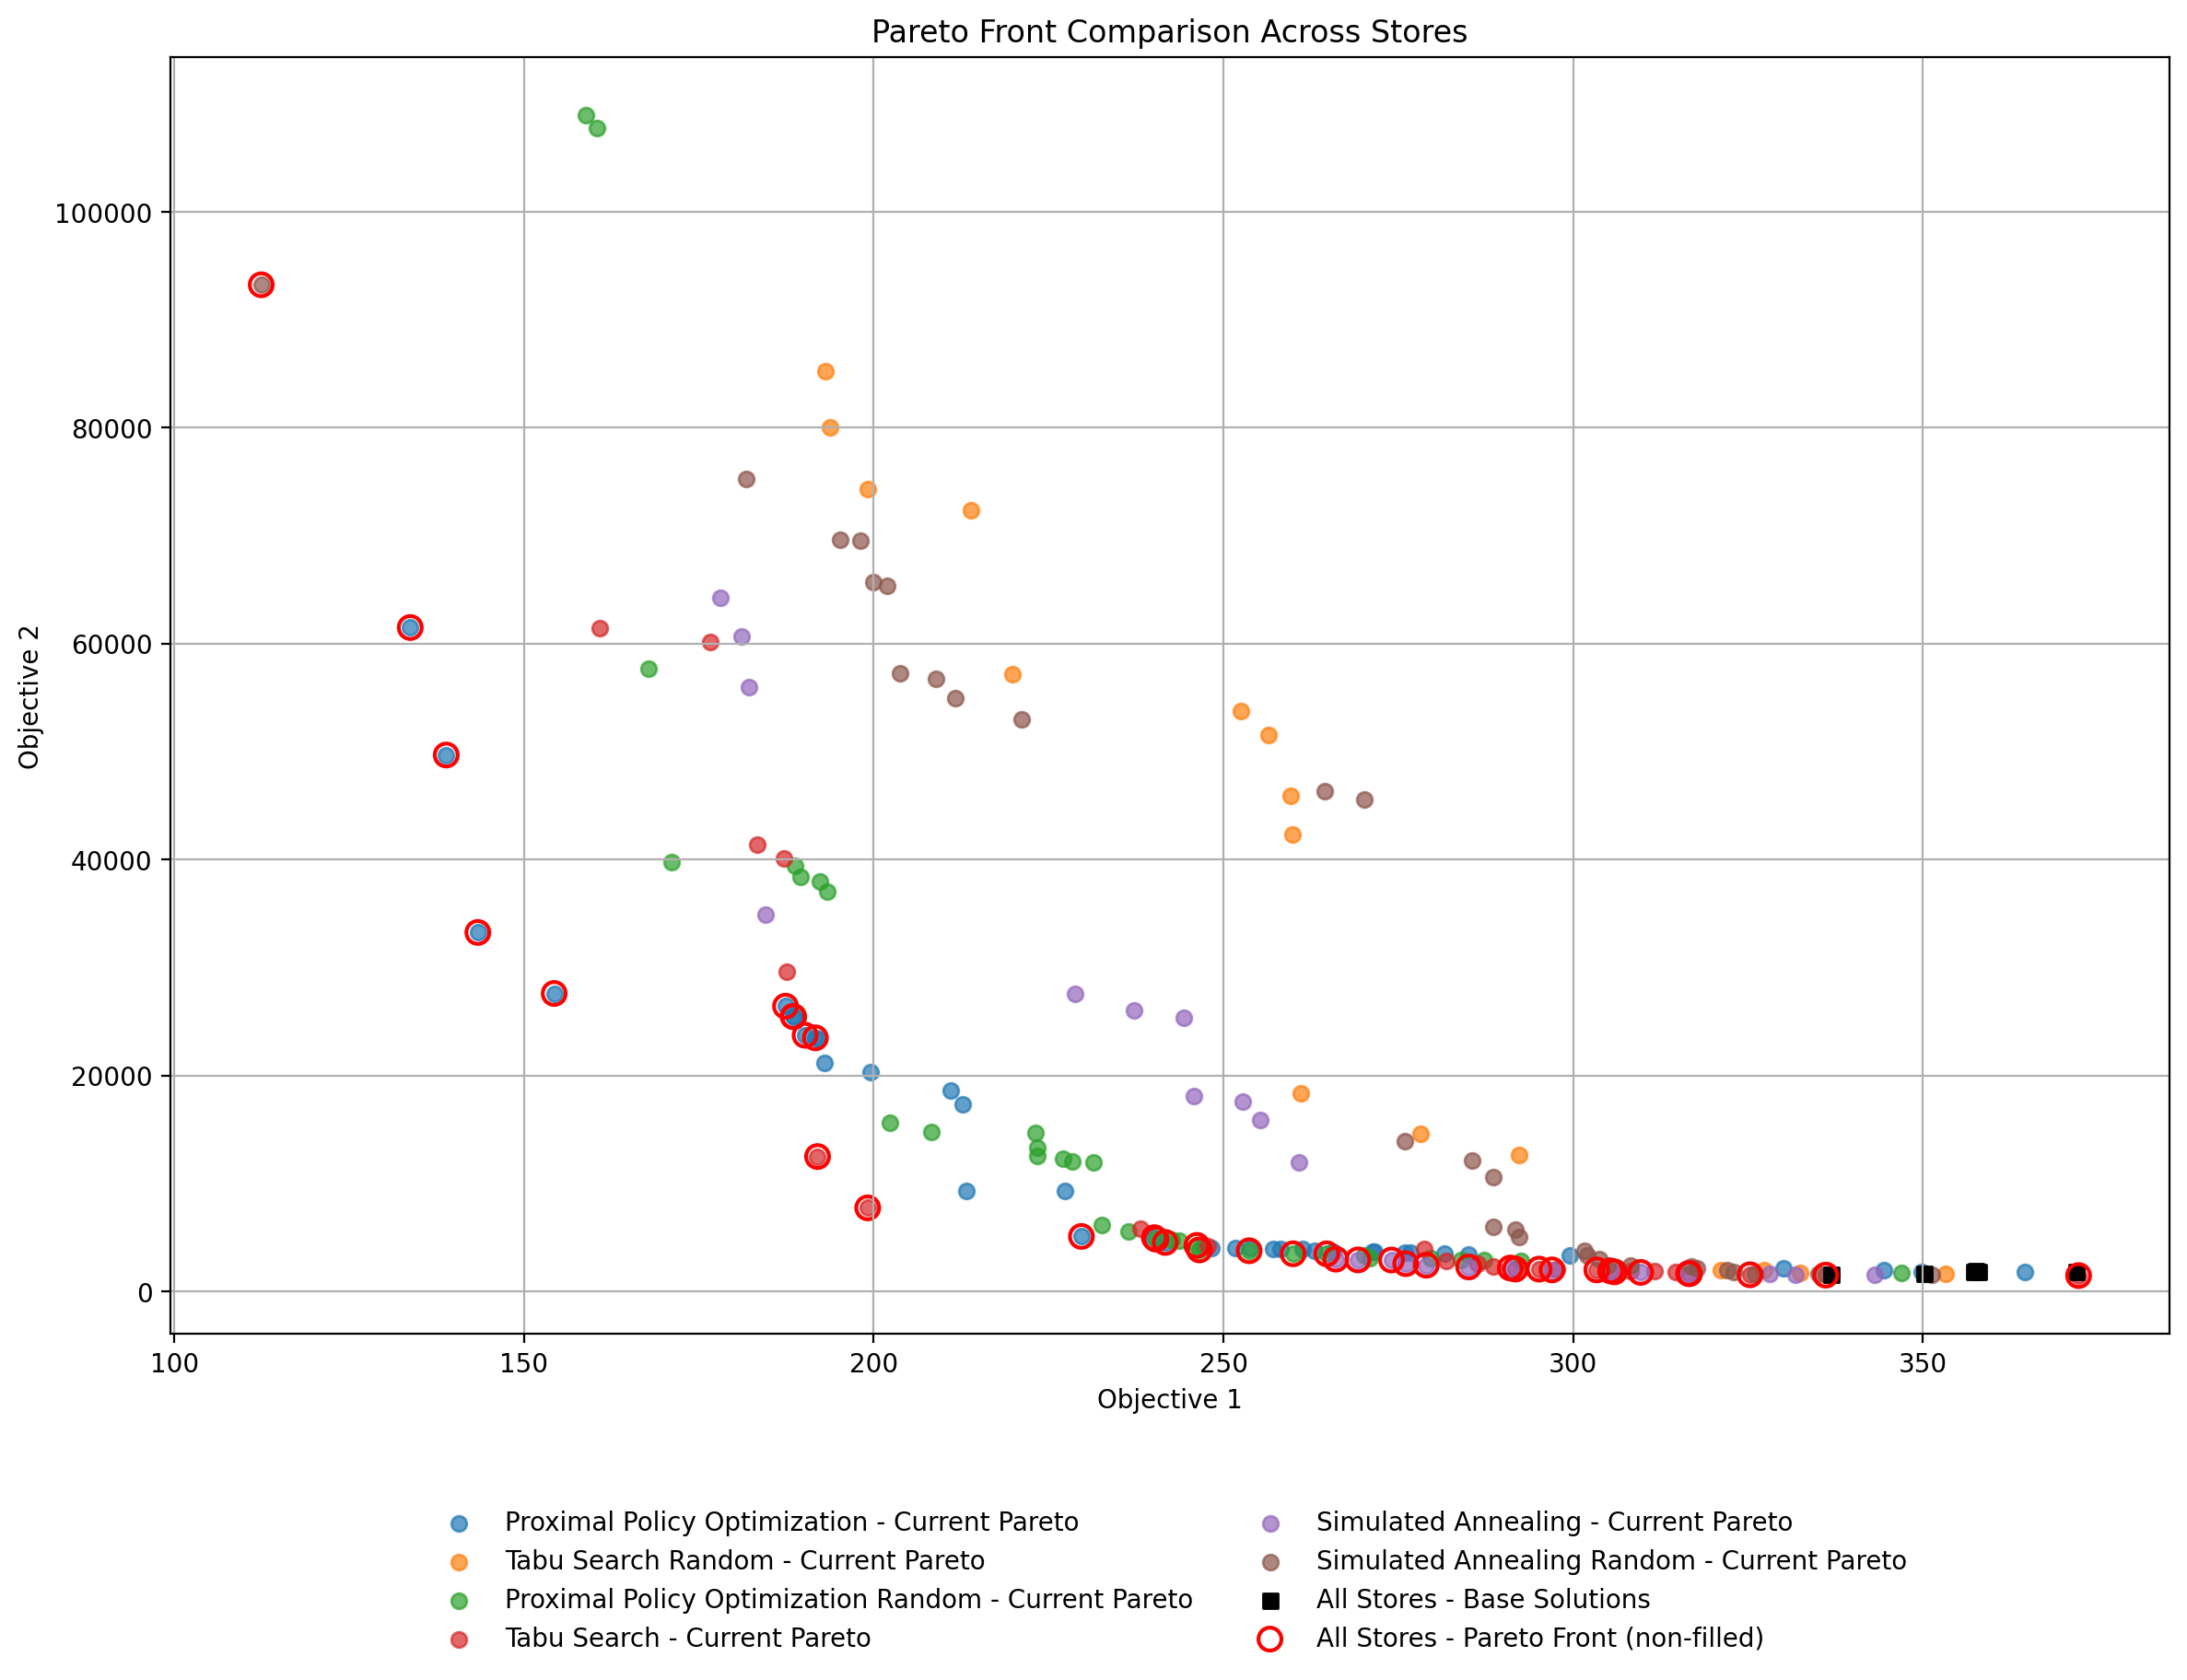

Processing ... Proximal Policy Optimization Random production_hard


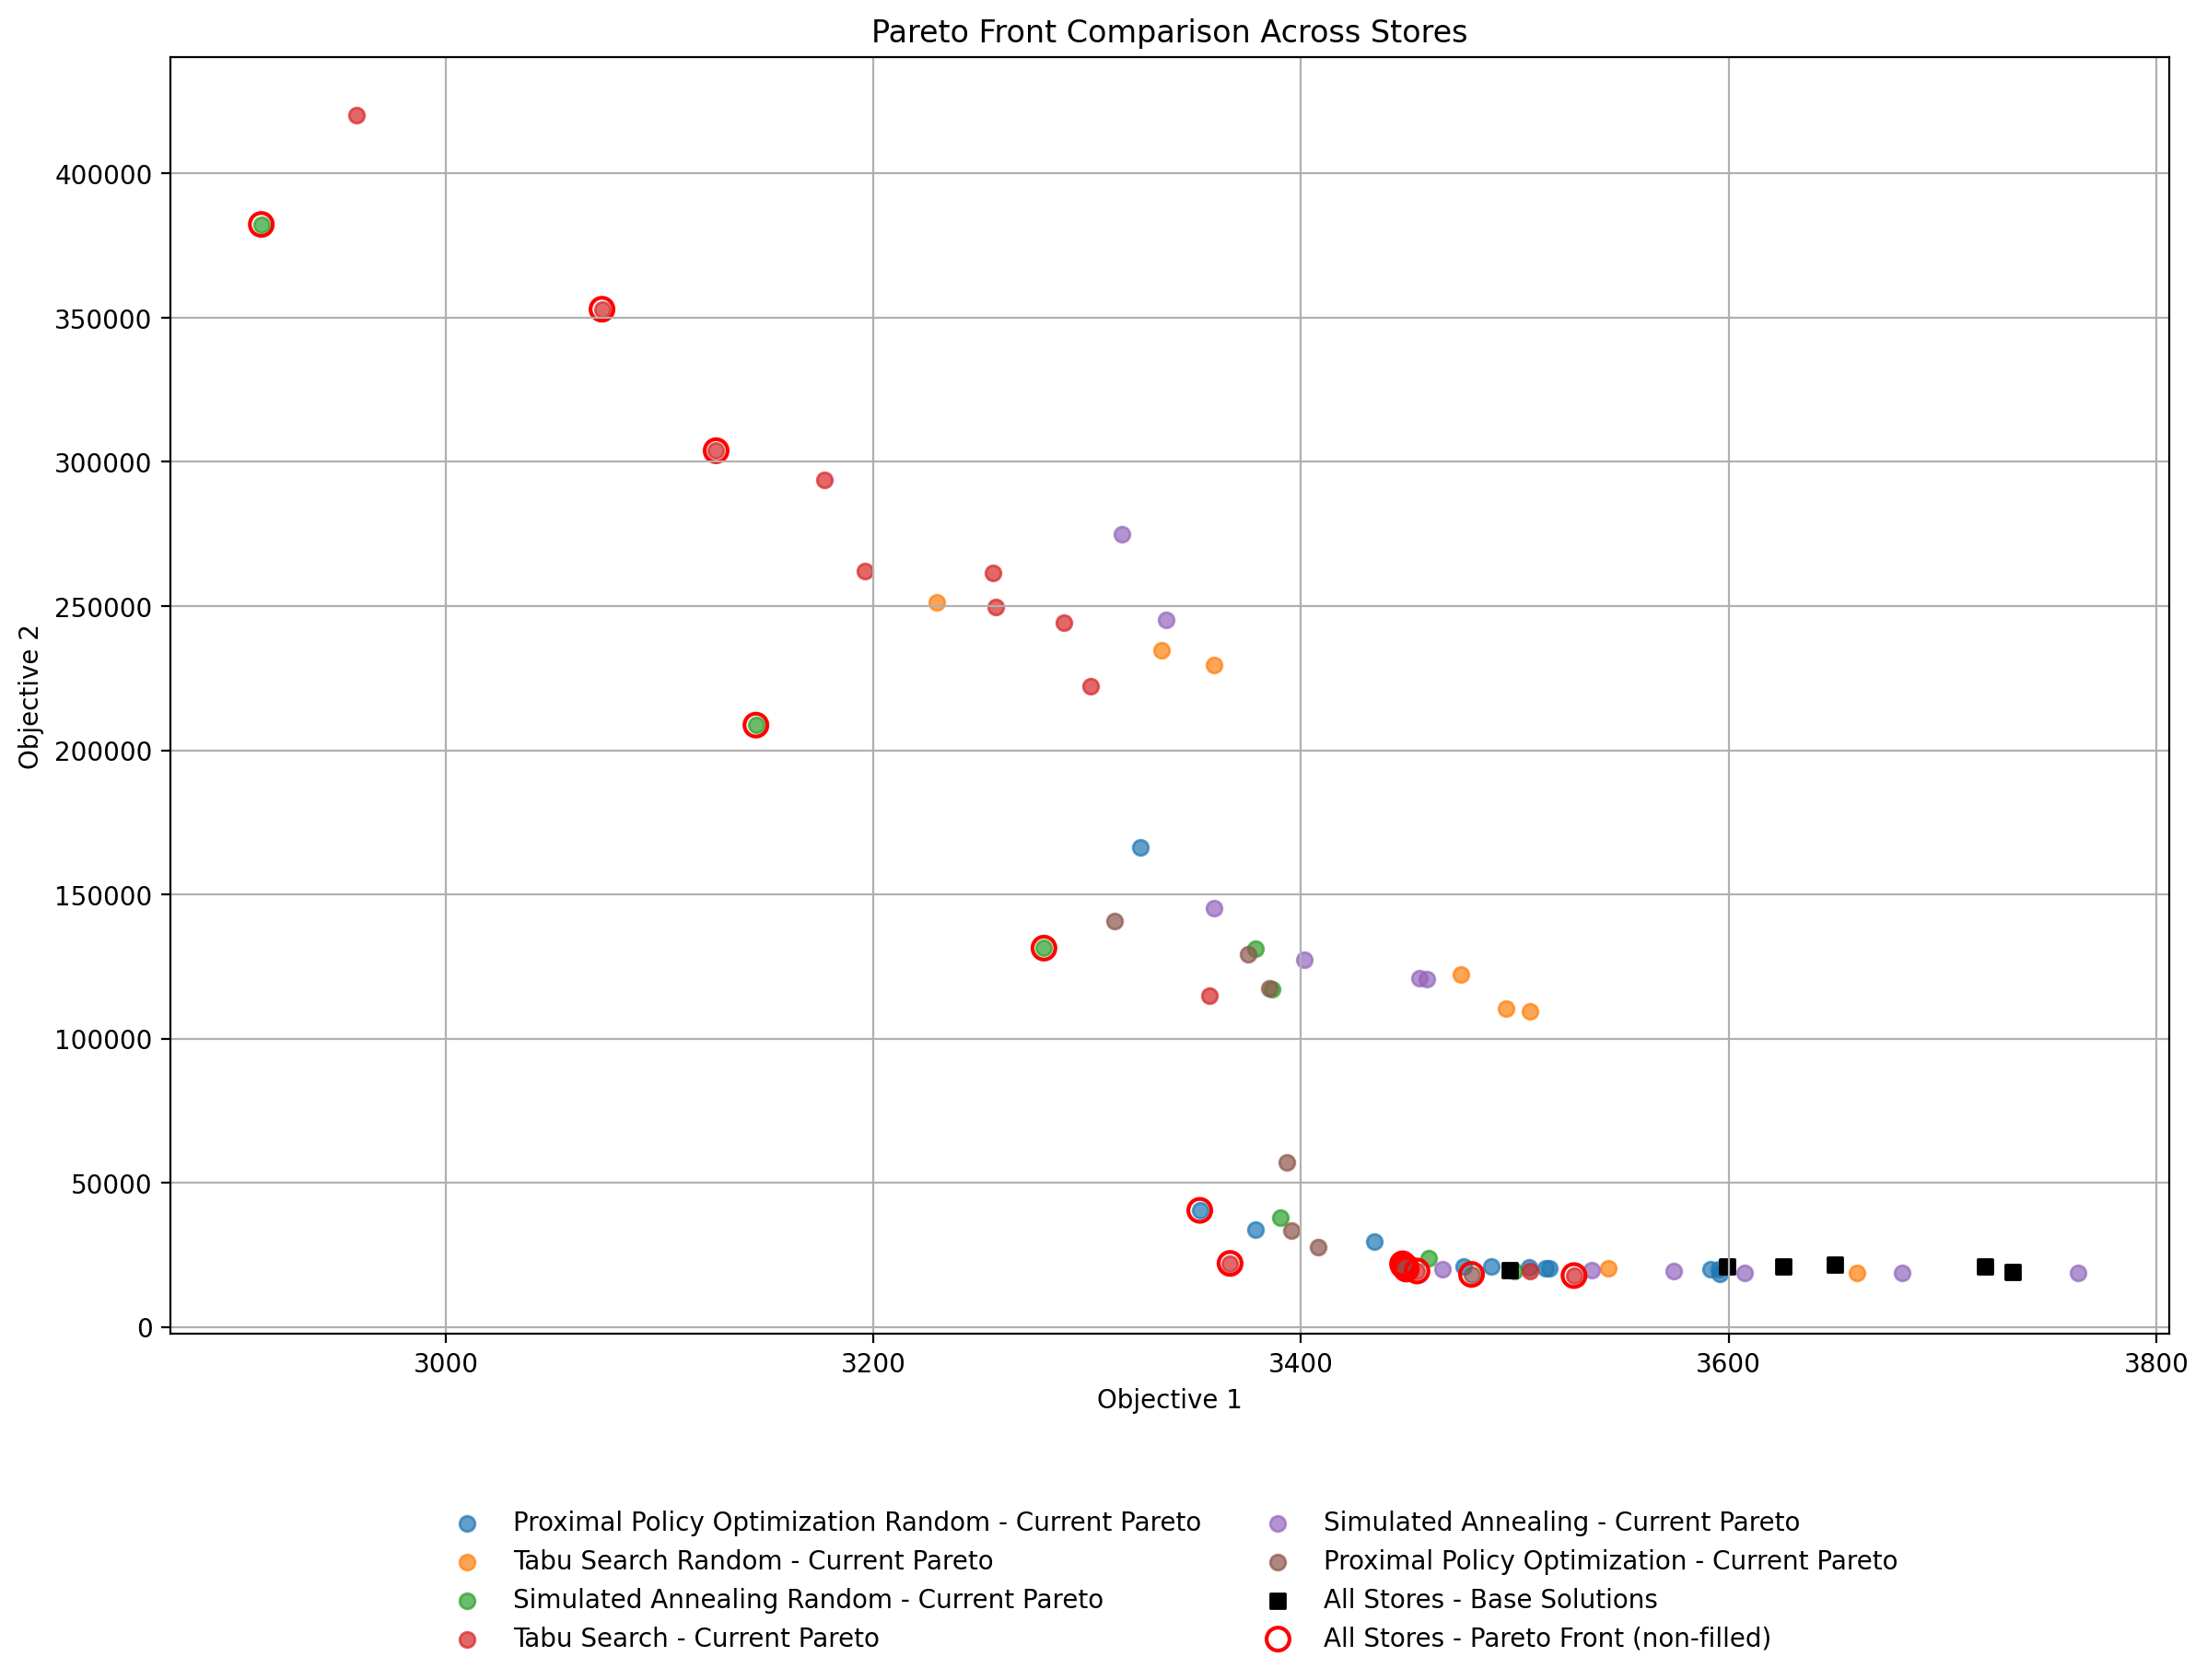

Processing ... Simulated Annealing bpi_challenge_2012_easy


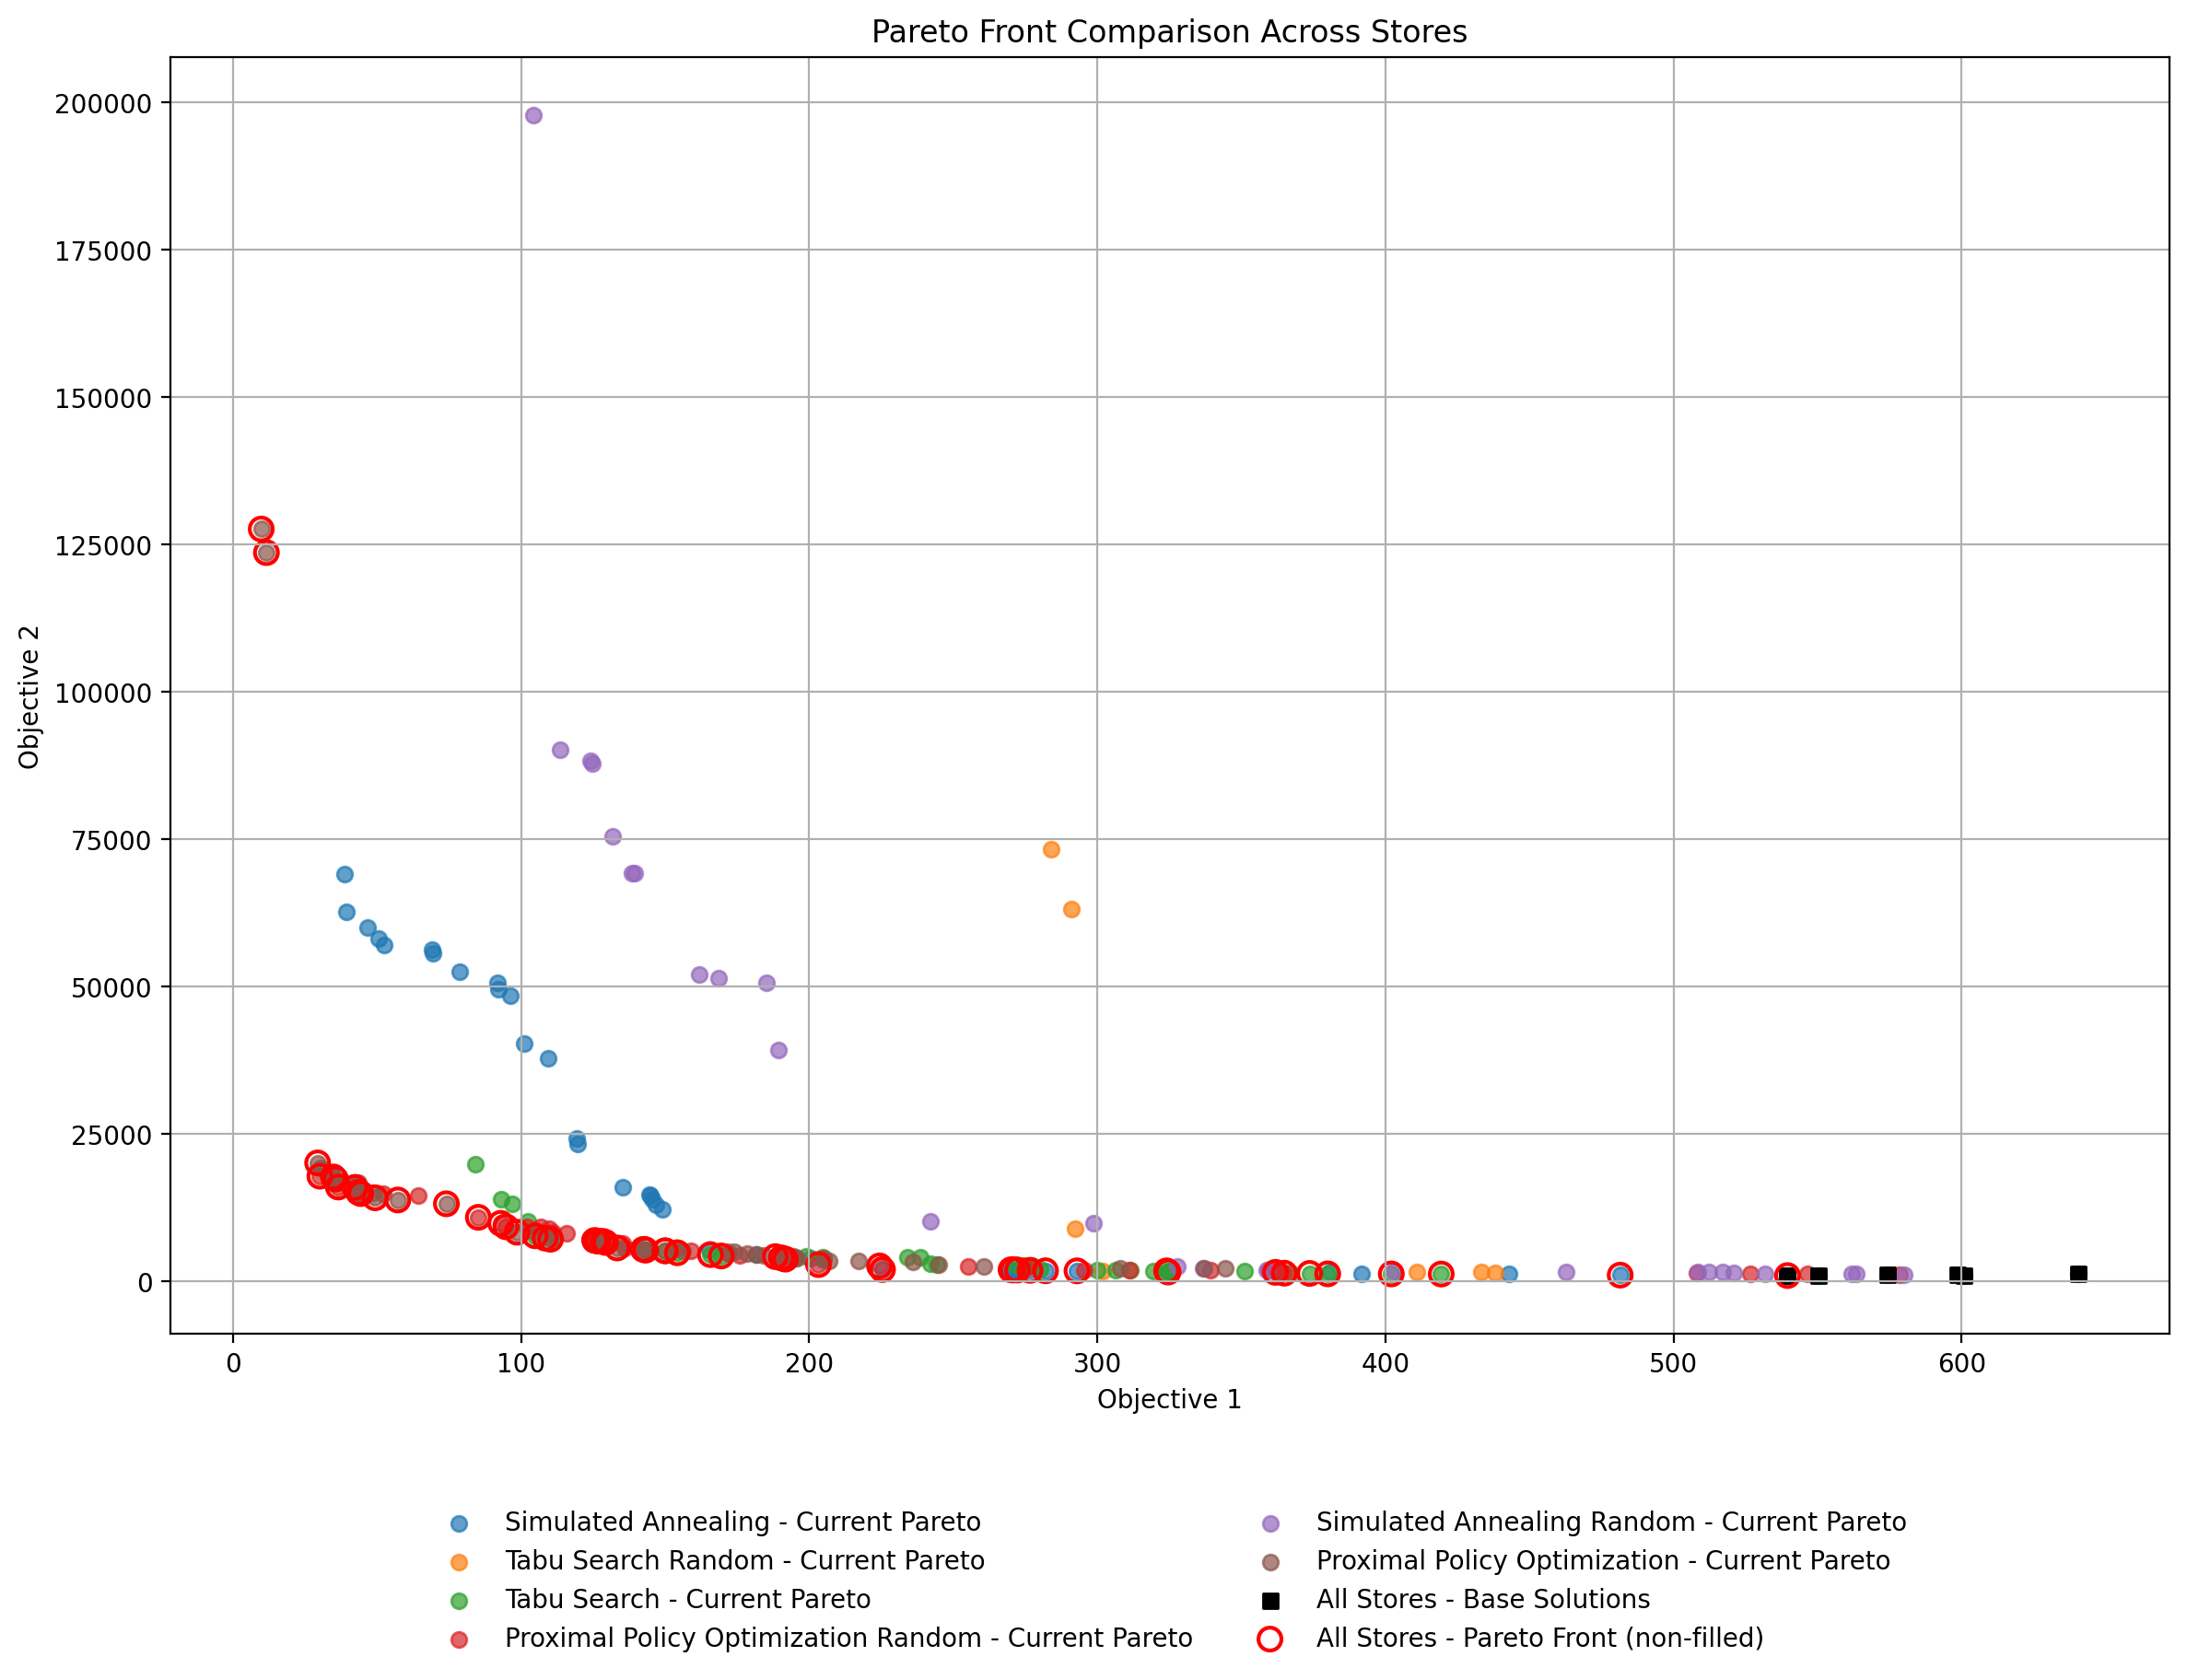

In [2]:
import os

from o2.models.settings import Settings
from o2.models.solution import Solution
from o2_evaluation.data_downloader import get_stores_and_solutions

os.chdir("/Users/jannis/Dropbox/Uni/Master/BP-Optimization/optimos_v2/")

for stores, extra_solutions in get_stores_and_solutions():
    all_solutions: set[Solution] = set()

    print(f"Processing ... {stores[0][1].name}")

    for _, store in stores:
        store_solutions = [
            *store.solution_tree.solution_lookup.values(),
            *[s for pareto in store.pareto_fronts for s in pareto.solutions],
        ]
        for solution in store_solutions:
            if solution is not None and solution.is_valid:
                # Add store name so we can load the evaluation and state later
                solution.__dict__["_store_name"] = store.name
                all_solutions.add(solution)

    all_solutions.update(
        [extra_solution for extra_solution in extra_solutions if extra_solution.is_valid]
    )

    # Find the Pareto front (non-dominated solutions)
    all_solutions_front = [
        solution
        for solution in all_solutions
        if not any(
            solution.is_dominated_by(other)
            for other in all_solutions
            if (Settings.EQUAL_DOMINATION_ALLOWED or other.point != solution.point)
        )
    ]

    # TODO: In one chart plot the current pareto front's solutions of every store ([s.point for s in store.current_pareto_front.solutions])
    # And the all_solutions_front and the base_solution of every store (store.base_solution.point)
    plot_pareto_front(stores, all_solutions_front)
